<a href="https://colab.research.google.com/github/englian1123/KL-High-Rise-Data/blob/main/PMA_CS17_ModelTrainingEvaluation_Hybrid_MP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MP2**

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np

# URL of the dataset
url = "https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv"

# Load the dataset
df = pd.read_csv(url)

# Display the first few rows to understand the data
print("First 5 rows of the dataset:")
print(df.head())
print("\n")

# Descriptive statistics for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Descriptive Statistics for Numerical Columns:")
print(df[numerical_cols].describe())
print("\n")

# Summary for categorical columns
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")


# Save the output to a file (optional, for easy sharing)
with open('descriptive_stats_output.txt', 'w') as f:
    f.write("First 5 rows of the dataset:\n")
    f.write(str(df.head()) + "\n\n")
    f.write("Descriptive Statistics for Numerical Columns:\n")
    f.write(str(df[numerical_cols].describe()) + "\n\n")
    for col in categorical_cols:
        f.write(f"Value counts for {col}:\n")
        f.write(str(df[col].value_counts()) + "\n\n")


print("Output saved to 'descriptive_stats_output.txt'. You can download this file from Colab.")

First 5 rows of the dataset:
           Property Type      District                     Mukim  \
0  Condominium/Apartment  Kuala Lumpur  Kuala Lumpur Town Centre   
1  Condominium/Apartment  Kuala Lumpur  Kuala Lumpur Town Centre   
2  Condominium/Apartment  Kuala Lumpur  Kuala Lumpur Town Centre   
3  Condominium/Apartment  Kuala Lumpur  Kuala Lumpur Town Centre   
4  Condominium/Apartment  Kuala Lumpur  Kuala Lumpur Town Centre   

        SchemeName TransactionDate    Tenure  ParcelArea  Unit UnitLevel  \
0    FERNLEA COURT          Aug-22  Freehold       169.0  sq.m         1   
1  SRI MURNI CONDO          Aug-22  Freehold       279.0  sq.m         1   
2   GEMILANG INDAH          Aug-22  Freehold        84.0  sq.m         1   
3      DAMAI SURIA          Sep-22  Freehold       374.0  sq.m         1   
4  BANGSAR HEIGHTS          Sep-22  Freehold        84.0  sq.m         1   

   TransactionPrice PropertyType(strata)       Sector            State  
0           1060000             

In [ ]:
import pandas as pd
import numpy as np

# URL of the dataset
url = "https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv"

# Load the dataset
try:
    df = pd.read_csv(url)
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Convert TransactionDate to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%b-%y')

# Extract Year and Quarter
df['Year'] = df['TransactionDate'].dt.year
df['Quarter'] = df['TransactionDate'].dt.to_period('Q')

# Group by Year
yearly_stats = df.groupby('Year').agg({
    'TransactionPrice': ['count', 'mean', 'median'],
    'ParcelArea': ['mean', 'median']
}).round(2)

# Group by Quarter
quarterly_stats = df.groupby('Quarter').agg({
    'TransactionPrice': ['count', 'mean', 'median'],
    'ParcelArea': ['mean', 'median']
}).round(2)

# Display results
print("Yearly Transaction Trends:")
print(yearly_stats)
print("\n")

print("Quarterly Transaction Trends:")
print(quarterly_stats)
print("\n")

# Save the output to a file for easy sharing
with open('temporal_trends_output.txt', 'w') as f:
    f.write("Yearly Transaction Trends:\n")
    f.write(str(yearly_stats) + "\n\n")
    f.write("Quarterly Transaction Trends:\n")
    f.write(str(quarterly_stats) + "\n\n")

print("Output saved to 'temporal_trends_output.txt'. You can download this file from Colab.")

Yearly Transaction Trends:
     TransactionPrice                      ParcelArea        
                count       mean    median       mean  median
Year                                                         
2021             1910  800685.86  550000.0     118.62  105.00
2022             4454  845839.02  550000.0     126.31  110.00
2023             4218  891836.89  566000.0     129.95  110.39
2024             3211  944796.33  560000.0     133.52  111.00
2025              600  913031.67  540000.0     135.41  111.00


Quarterly Transaction Trends:
        TransactionPrice                      ParcelArea        
                   count       mean    median       mean  median
Quarter                                                         
2021Q1               207  869400.97  554000.0     105.44   93.00
2021Q2               202  958905.94  557500.0     119.76  102.00
2021Q3               308  823561.69  550000.0     122.19  102.00
2021Q4              1193  756067.06  550000.0     119.8

In [ ]:

import pandas as pd
import numpy as np

# URL of the dataset
url = "https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv"

# Load the dataset
try:
    df = pd.read_csv(url)
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Convert TransactionDate to datetime
try:
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%b-%y')
except ValueError as e:
    print(f"Error parsing dates: {e}")
    exit()

# Set TransactionDate as index and sort
df.set_index('TransactionDate', inplace=True)
df.sort_index(inplace=True)

# Aggregate by month to get mean TransactionPrice
monthly_data = df.resample('M').agg({'TransactionPrice': 'mean'}).round(2)

# Ensure no missing months by creating a complete date range
date_range = pd.date_range(start=monthly_data.index.min(), end=monthly_data.index.max(), freq='M')
monthly_data = monthly_data.reindex(date_range)

# Fill missing values (if any) with forward fill
monthly_data['TransactionPrice'] = monthly_data['TransactionPrice'].fillna(method='ffill')

# Reset index to make date a column for output
monthly_data.reset_index(inplace=True)
monthly_data.rename(columns={'index': 'Date'}, inplace=True)

# Display the prepared time series
print("Prepared Monthly Time Series for ARIMA:")
print(monthly_data.head(10))
print("\n")
print("Summary of Prepared Data:")
print(monthly_data.describe())
print("\n")
print(f"Time Series Range: {monthly_data['Date'].min()} to {monthly_data['Date'].max()}")
print(f"Total Months: {len(monthly_data)}")

# Save the prepared data to a CSV file
monthly_data.to_csv('arima_ready_data.csv', index=False)
print("Prepared data saved to 'arima_ready_data.csv'. You can download this file from Colab.")


Prepared Monthly Time Series for ARIMA:
        Date  TransactionPrice
0 2021-01-31         857132.08
1 2021-02-28         669297.87
2 2021-03-31         963373.83
3 2021-04-30         884480.00
4 2021-05-31         955663.64
5 2021-06-30        1308235.29
6 2021-07-31        1055092.11
7 2021-08-31         778181.82
8 2021-09-30         725037.59
9 2021-10-31         736959.54


Summary of Prepared Data:
                      Date  TransactionPrice
count                   54      5.400000e+01
mean   2023-04-15 22:40:00      8.898473e+05
min    2021-01-31 00:00:00      5.316250e+05
25%    2022-03-07 18:00:00      8.170540e+05
50%    2023-04-15 00:00:00      8.715653e+05
75%    2024-05-23 06:00:00      9.583854e+05
max    2025-06-30 00:00:00      1.308235e+06
std                    NaN      1.216426e+05


Time Series Range: 2021-01-31 00:00:00 to 2025-06-30 00:00:00
Total Months: 54
Prepared data saved to 'arima_ready_data.csv'. You can download this file from Colab.


/tmp/ipython-input-1826506377.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').agg({'TransactionPrice': 'mean'}).round(2)
/tmp/ipython-input-1826506377.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=monthly_data.index.min(), end=monthly_data.index.max(), freq='M')
/tmp/ipython-input-1826506377.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_data['TransactionPrice'] = monthly_data['TransactionPrice'].fillna(method='ffill')


/tmp/ipython-input-1479490318.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').agg({'TransactionPrice': 'mean'}).round(2)
/tmp/ipython-input-1479490318.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=monthly_data.index.min(), end=monthly_data.index.max(), freq='M')
/tmp/ipython-input-1479490318.py:36: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_data['TransactionPrice'] = monthly_data['TransactionPrice'].fillna(method='ffill')


Augmented Dickey-Fuller Test Results:
ADF Statistic: -4.7923
p-value: 0.0001
Critical Values:
   1%: -3.5602
   5%: -2.9179
   10%: -2.5968

Interpretation:
The time series is stationary (p-value < 0.05, reject null hypothesis).




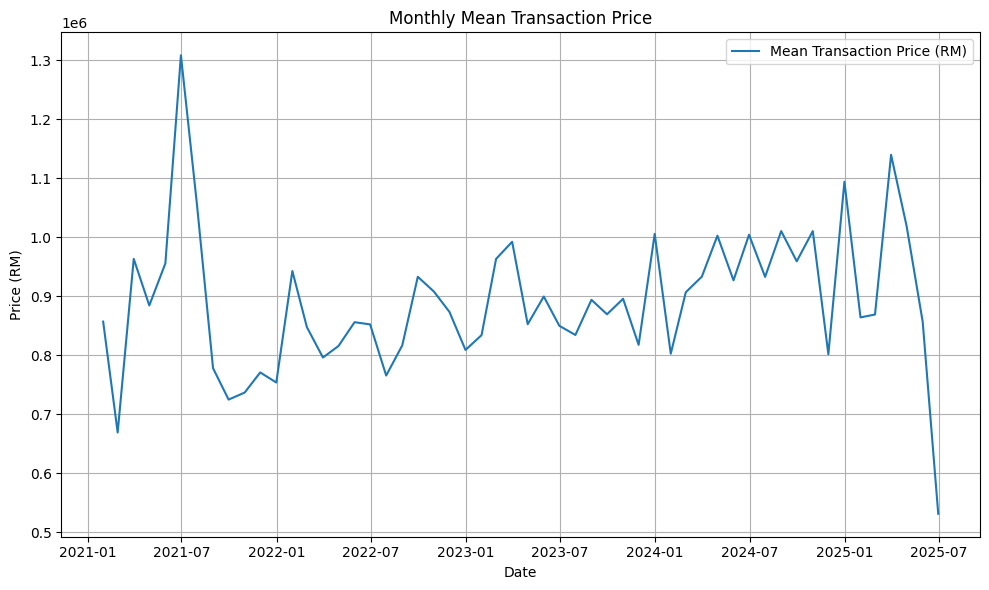

<Figure size 1000x600 with 0 Axes>

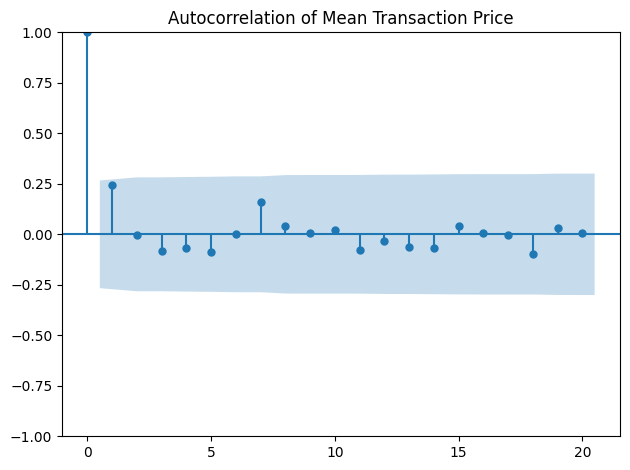

Results saved to 'stationarity_check_output.txt' and 'arima_ready_data.csv'. Plots saved as 'time_series_plot.png' and 'acf_plot.png'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# URL of the dataset
url = "https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv"

# Load the dataset
try:
    df = pd.read_csv(url)
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Convert TransactionDate to datetime
try:
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%b-%y')
except ValueError as e:
    print(f"Error parsing dates: {e}")
    exit()

# Set TransactionDate as index and sort
df.set_index('TransactionDate', inplace=True)
df.sort_index(inplace=True)

# Aggregate by month to get mean TransactionPrice
monthly_data = df.resample('M').agg({'TransactionPrice': 'mean'}).round(2)

# Ensure no missing months by creating a complete date range
date_range = pd.date_range(start=monthly_data.index.min(), end=monthly_data.index.max(), freq='M')
monthly_data = monthly_data.reindex(date_range)

# Fill missing values with forward fill
monthly_data['TransactionPrice'] = monthly_data['TransactionPrice'].fillna(method='ffill')

# Reset index for plotting and analysis
monthly_data.reset_index(inplace=True)
monthly_data.rename(columns={'index': 'Date'}, inplace=True)

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(monthly_data['TransactionPrice'])

print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")
print("\nInterpretation:")
if adf_result[1] < 0.05:
    print("The time series is stationary (p-value < 0.05, reject null hypothesis).")
else:
    print("The time series is non-stationary (p-value >= 0.05, fail to reject null hypothesis).")
print("\n")

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Date'], monthly_data['TransactionPrice'], label='Mean Transaction Price (RM)')
plt.title('Monthly Mean Transaction Price')
plt.xlabel('Date')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('time_series_plot.png')
plt.show()

# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(monthly_data['TransactionPrice'], lags=20, title='Autocorrelation of Mean Transaction Price')
plt.tight_layout()
plt.savefig('acf_plot.png')
plt.show()

# Save the prepared data and test results
monthly_data.to_csv('arima_ready_data.csv', index=False)
with open('stationarity_check_output.txt', 'w') as f:
    f.write("Augmented Dickey-Fuller Test Results:\n")
    f.write(f"ADF Statistic: {adf_result[0]:.4f}\n")
    f.write(f"p-value: {adf_result[1]:.4f}\n")
    f.write("Critical Values:\n")
    for key, value in adf_result[4].items():
        f.write(f"   {key}: {value:.4f}\n")
    f.write("\nInterpretation:\n")
    if adf_result[1] < 0.05:
        f.write("The time series is stationary (p-value < 0.05, reject null hypothesis).\n")
    else:
        f.write("The time series is non-stationary (p-value >= 0.05, fail to reject null hypothesis).\n")
print("Results saved to 'stationarity_check_output.txt' and 'arima_ready_data.csv'. Plots saved as 'time_series_plot.png' and 'acf_plot.png'.")

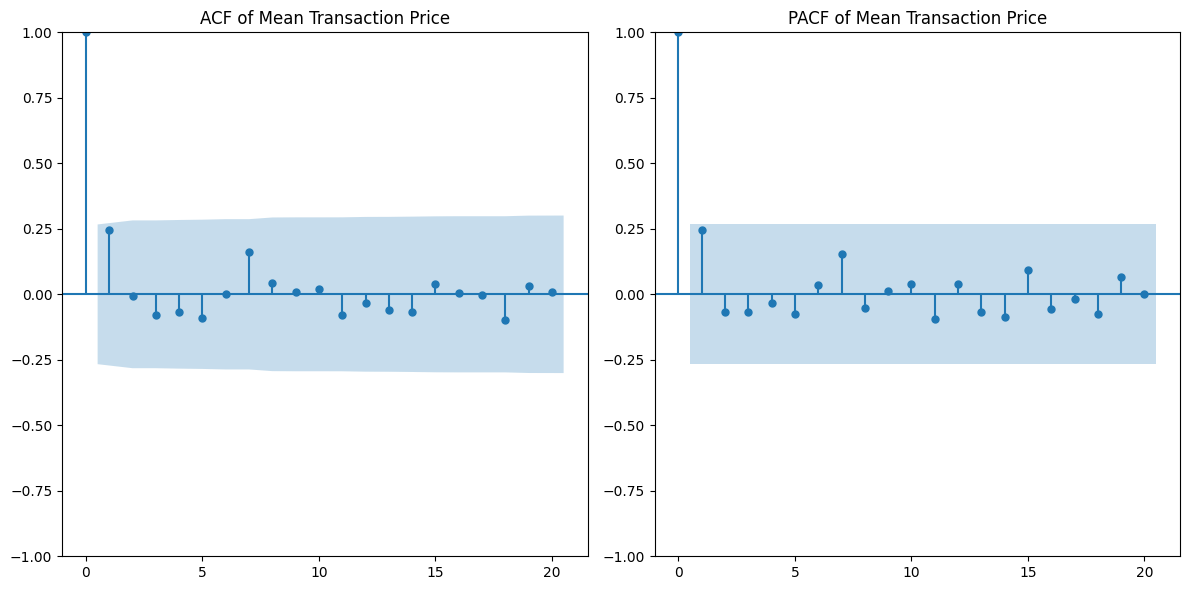

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:       TransactionPrice   No. Observations:                   54
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -706.341
Date:                Sun, 19 Oct 2025   AIC                           1420.682
Time:                        15:54:30   BIC                           1428.638
Sample:                    01-31-2021   HQIC                          1423.750
                         - 06-30-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.898e+05   2.09e+04     42.667      0.000    8.49e+05    9.31e+05
ar.L1          0.1102      0.559      0.197      0.844      -0.986       1.206
ma.L1          0.1935      0.51

/tmp/ipython-input-805284330.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(1), periods=forecast_steps, freq='M')


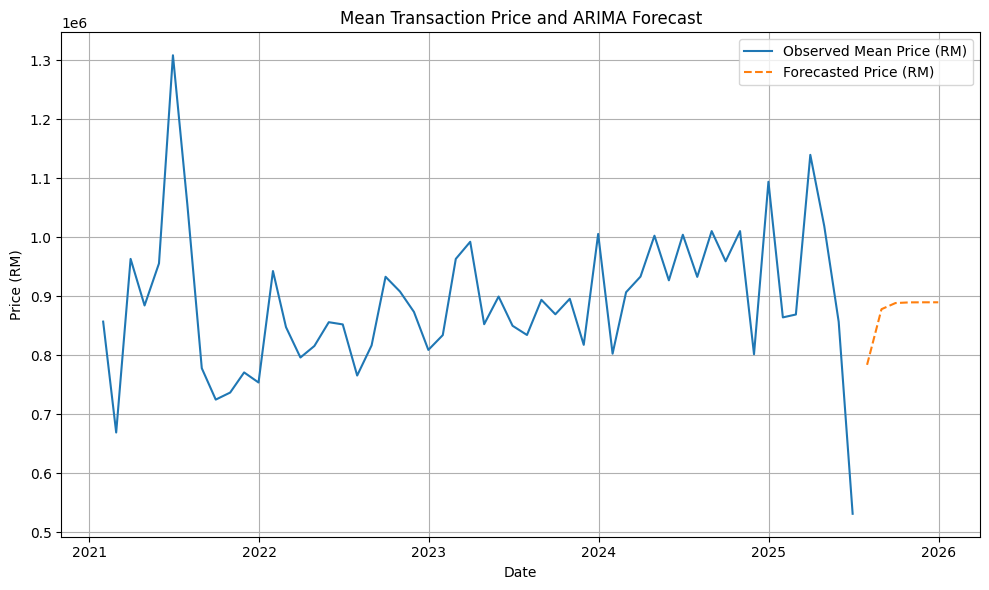

Results saved to 'arima_results.txt' and 'arima_forecast.csv'. Plot saved as 'arima_forecast_plot.png'.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the prepared time series
try:
    df = pd.read_csv('arima_ready_data.csv')
except FileNotFoundError:
    print("Error: 'arima_ready_data.csv' not found. Please run the previous script to generate it.")
    exit()

# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot ACF and PACF to determine p and q
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['TransactionPrice'], lags=20, ax=plt.gca(), title='ACF of Mean Transaction Price')
plt.subplot(122)
plot_pacf(df['TransactionPrice'], lags=20, ax=plt.gca(), title='PACF of Mean Transaction Price')
plt.tight_layout()
plt.savefig('acf_pacf_plots.png')
plt.show()

# Fit ARIMA model (example: ARIMA(1,0,1) based on stationarity)
# Adjust p and q based on ACF/PACF inspection
model = ARIMA(df['TransactionPrice'], order=(1, 0, 1))
model_fit = model.fit()

# Print model summary
print("ARIMA Model Summary:")
print(model_fit.summary())

# Forecast for 6 months ahead
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(1), periods=forecast_steps, freq='M')

# Create forecast DataFrame
forecast_df = pd.DataFrame({'Date': forecast_index, 'Forecasted Price': forecast.values})
print("\nForecast for Next 6 Months:")
print(forecast_df)

# Plot observed data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['TransactionPrice'], label='Observed Mean Price (RM)')
plt.plot(forecast_df['Date'], forecast_df['Forecasted Price'], label='Forecasted Price (RM)', linestyle='--')
plt.title('Mean Transaction Price and ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('arima_forecast_plot.png')
plt.show()

# Save results
forecast_df.to_csv('arima_forecast.csv', index=False)
with open('arima_results.txt', 'w') as f:
    f.write("ARIMA Model Summary:\n")
    f.write(str(model_fit.summary()) + "\n\n")
    f.write("Forecast for Next 6 Months:\n")
    f.write(str(forecast_df) + "\n")
print("Results saved to 'arima_results.txt' and 'arima_forecast.csv'. Plot saved as 'arima_forecast_plot.png'.")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm

# Install pmdarima if not already installed
!pip install pmdarima

# Load the prepared time series
try:
    df = pd.read_csv('arima_ready_data.csv')
except FileNotFoundError:
    print("Error: 'arima_ready_data.csv' not found. Please run the previous script to generate it.")
    exit()

# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot ACF and PACF to guide parameter selection
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['TransactionPrice'], lags=20, ax=plt.gca(), title='ACF of Mean Transaction Price')
plt.subplot(122)
plot_pacf(df['TransactionPrice'], lags=20, ax=plt.gca(), title='PACF of Mean Transaction Price')
plt.tight_layout()
plt.savefig('acf_pacf_plots.png')
plt.show()

# Auto-ARIMA to select optimal parameters
auto_model = pm.auto_arima(df['TransactionPrice'],
                           start_p=0, start_q=0, max_p=3, max_q=3,
                           d=0,  # Stationary, so no differencing
                           seasonal=False,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

# Print auto-ARIMA results
print("Auto-ARIMA Model Summary:")
print(auto_model.summary())

# Fit ARIMA model with auto-selected parameters
order = auto_model.order
model = ARIMA(df['TransactionPrice'], order=order)
model_fit = model.fit()

# Print model summary
print("\nFitted ARIMA Model Summary:")
print(model_fit.summary())

# Forecast for 6 months ahead with confidence intervals
forecast_steps = 6
forecast_object = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_object.predicted_mean
conf_int = forecast_object.conf_int()

# Create forecast DataFrame
forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(1), periods=forecast_steps, freq='ME')
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted Price': forecast.values,
    'Lower CI': conf_int.iloc[:, 0],
    'Upper CI': conf_int.iloc[:, 1]
})

print("\nForecast for Next 6 Months with Confidence Intervals:")
print(forecast_df)

# Plot observed data, forecast, and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['TransactionPrice'], label='Observed Mean Price (RM)')
plt.plot(forecast_df['Date'], forecast_df['Forecasted Price'], label='Forecasted Price (RM)', linestyle='--')
plt.fill_between(forecast_df['Date'], forecast_df['Lower CI'], forecast_df['Upper CI'], color='gray', alpha=0.2, label='95% Confidence Interval')
plt.title(f'ARIMA{order} Forecast of Mean Transaction Price')
plt.xlabel('Date')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('arima_forecast_plot.png')
plt.show()

# Plot residual diagnostics
model_fit.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.savefig('arima_diagnostics_plot.png')
plt.show()

# Save results
forecast_df.to_csv('arima_forecast.csv', index=False)
with open('arima_results.txt', 'w') as f:
    f.write("Auto-ARIMA Model Summary:\n")
    f.write(str(auto_model.summary()) + "\n\n")
    f.write("Fitted ARIMA Model Summary:\n")
    f.write(str(model_fit.summary()) + "\n\n")
    f.write("Forecast for Next 6 Months with Confidence Intervals:\n")
    f.write(str(forecast_df) + "\n")
print("Results saved to 'arima_results.txt' and 'arima_forecast.csv'. Plots saved as 'arima_forecast_plot.png' and 'arima_diagnostics_plot.png'.")

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
import pandas as pd
import numpy as np

# URL of the dataset
url = "https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv"

# Load the dataset
try:
    df = pd.read_csv(url)
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Convert TransactionDate to datetime
try:
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%b-%y')
except ValueError as e:
    print(f"Error parsing dates: {e}")
    exit()

# Set TransactionDate as index and sort
df.set_index('TransactionDate', inplace=True)
df.sort_index(inplace=True)

# Aggregate by month to get mean TransactionPrice
monthly_data = df.resample('M').agg({'TransactionPrice': 'mean'}).round(2)

# Ensure no missing months by creating a complete date range
date_range = pd.date_range(start=monthly_data.index.min(), end=monthly_data.index.max(), freq='M')
monthly_data = monthly_data.reindex(date_range)

# Fill missing values (if any) with forward fill
monthly_data['TransactionPrice'] = monthly_data['TransactionPrice'].fillna(method='ffill')

# Reset index to make date a column for output
monthly_data.reset_index(inplace=True)
monthly_data.rename(columns={'index': 'Date'}, inplace=True)

# Save the prepared data to a CSV file
monthly_data.to_csv('arima_ready_data.csv', index=False)

print("Prepared data saved to 'arima_ready_data.csv'.")

Prepared data saved to 'arima_ready_data.csv'.


/tmp/ipython-input-1040551351.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').agg({'TransactionPrice': 'mean'}).round(2)
/tmp/ipython-input-1040551351.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=monthly_data.index.min(), end=monthly_data.index.max(), freq='M')
/tmp/ipython-input-1040551351.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_data['TransactionPrice'] = monthly_data['TransactionPrice'].fillna(method='ffill')


Augmented Dickey-Fuller Test Results:
ADF Statistic: -4.7923
p-value: 0.0001
Critical Values:
   1%: -3.5602
   5%: -2.9179
   10%: -2.5968

Interpretation:
The time series is stationary (p-value < 0.05, reject null hypothesis).




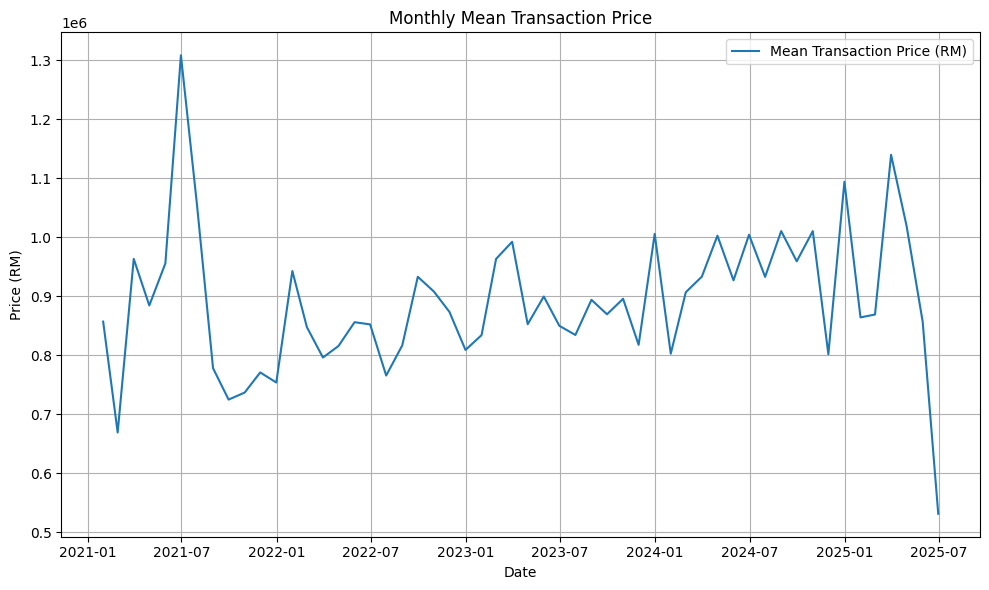

<Figure size 1000x600 with 0 Axes>

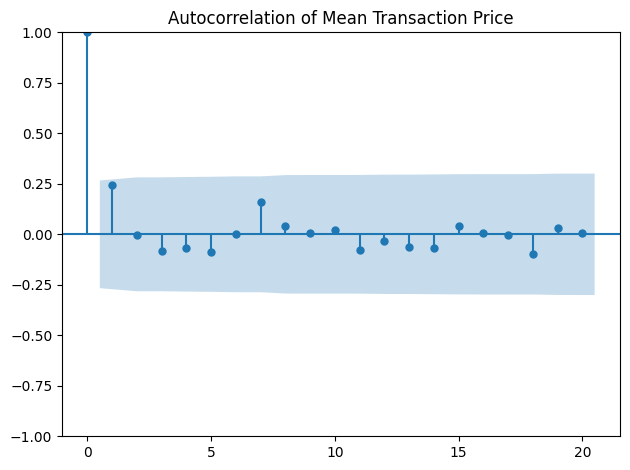

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Load the prepared time series
try:
    monthly_data = pd.read_csv('arima_ready_data.csv')
except FileNotFoundError:
    print("Error: 'arima_ready_data.csv' not found. Please run the previous script to generate it.")
    exit()

# Convert Date to datetime
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(monthly_data['TransactionPrice'])

print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")
print("\nInterpretation:")
if adf_result[1] < 0.05:
    print("The time series is stationary (p-value < 0.05, reject null hypothesis).")
else:
    print("The time series is non-stationary (p-value >= 0.05, fail to reject null hypothesis).")
print("\n")

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Date'], monthly_data['TransactionPrice'], label='Mean Transaction Price (RM)')
plt.title('Monthly Mean Transaction Price')
plt.xlabel('Date')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(monthly_data['TransactionPrice'], lags=20, title='Autocorrelation of Mean Transaction Price')
plt.tight_layout()
plt.show()

In [ ]:
!pip install pmdarima

# Auto ARIMA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm

# Load the prepared time series
try:
    df = pd.read_csv('arima_ready_data.csv')
except FileNotFoundError:
    print("Error: 'arima_ready_data.csv' not found. Please run the previous script to generate it.")
    exit()

# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot ACF and PACF to guide parameter selection
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['TransactionPrice'], lags=20, ax=plt.gca(), title='ACF of Mean Transaction Price')
plt.subplot(122)
plot_pacf(df['TransactionPrice'], lags=20, ax=plt.gca(), title='PACF of Mean Transaction Price')
plt.tight_layout()
plt.show()

# Auto-ARIMA to select optimal parameters
auto_model = pm.auto_arima(df['TransactionPrice'],
                           start_p=0, start_q=0, max_p=3, max_q=3,
                           d=0,  # Stationary, so no differencing
                           seasonal=False,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

# Print auto-ARIMA results
print("Auto-ARIMA Model Summary:")
print(auto_model.summary())

# Fit ARIMA model with auto-selected parameters
order = auto_model.order
model = ARIMA(df['TransactionPrice'], order=order)
model_fit = model.fit()

# Print model summary
print("\nFitted ARIMA Model Summary:")
print(model_fit.summary())

# Forecast for 6 months ahead with confidence intervals
forecast_steps = 6
forecast_object = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_object.predicted_mean
conf_int = forecast_object.conf_int()

# Create forecast DataFrame
forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(1), periods=forecast_steps, freq='ME')
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted Price': forecast.values,
    'Lower CI': conf_int.iloc[:, 0],
    'Upper CI': conf_int.iloc[:, 1]
})

print("\nForecast for Next 6 Months with Confidence Intervals:")
print(forecast_df)

# Plot observed data, forecast, and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['TransactionPrice'], label='Observed Mean Price (RM)')
plt.plot(forecast_df['Date'], forecast_df['Forecasted Price'], label='Forecasted Price (RM)', linestyle='--')
plt.fill_between(forecast_df['Date'], forecast_df['Lower CI'], forecast_df['Upper CI'], color='gray', alpha=0.2, label='95% Confidence Interval')
plt.title(f'ARIMA{order} Forecast of Mean Transaction Price')
plt.xlabel('Date')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot residual diagnostics
model_fit.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm

# Load the prepared time series
try:
    df = pd.read_csv('arima_ready_data.csv')
except FileNotFoundError:
    print("Error: 'arima_ready_data.csv' not found. Please run the previous script to generate it.")
    exit()

# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot ACF and PACF to guide parameter selection
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['TransactionPrice'], lags=20, ax=plt.gca(), title='ACF of Mean Transaction Price')
plt.subplot(122)
plot_pacf(df['TransactionPrice'], lags=20, ax=plt.gca(), title='PACF of Mean Transaction Price')
plt.tight_layout()
plt.show()

# Auto-ARIMA to select optimal parameters
auto_model = pm.auto_arima(df['TransactionPrice'],
                           start_p=0, start_q=0, max_p=3, max_q=3,
                           d=0,  # Stationary, so no differencing
                           seasonal=False,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

# Print auto-ARIMA results
print("Auto-ARIMA Model Summary:")
print(auto_model.summary())

# Fit ARIMA model with auto-selected parameters
order = auto_model.order
model = ARIMA(df['TransactionPrice'], order=order)
model_fit = model.fit()

# Print model summary
print("\nFitted ARIMA Model Summary:")
print(model_fit.summary())

# Forecast for 6 months ahead with confidence intervals
forecast_steps = 6
forecast_object = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_object.predicted_mean
conf_int = forecast_object.conf_int()

# Create forecast DataFrame
forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(1), periods=forecast_steps, freq='ME')
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted Price': forecast.values,
    'Lower CI': conf_int.iloc[:, 0],
    'Upper CI': conf_int.iloc[:, 1]
})

print("\nForecast for Next 6 Months with Confidence Intervals:")
print(forecast_df)

# Plot observed data, forecast, and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['TransactionPrice'], label='Observed Mean Price (RM)')
plt.plot(forecast_df['Date'], forecast_df['Forecasted Price'], label='Forecasted Price (RM)', linestyle='--')
plt.fill_between(forecast_df['Date'], forecast_df['Lower CI'], forecast_df['Upper CI'], color='gray', alpha=0.2, label='95% Confidence Interval')
plt.title(f'ARIMA{order} Forecast of Mean Transaction Price')
plt.xlabel('Date')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot residual diagnostics
model_fit.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

ACF and PACF of Original Series:


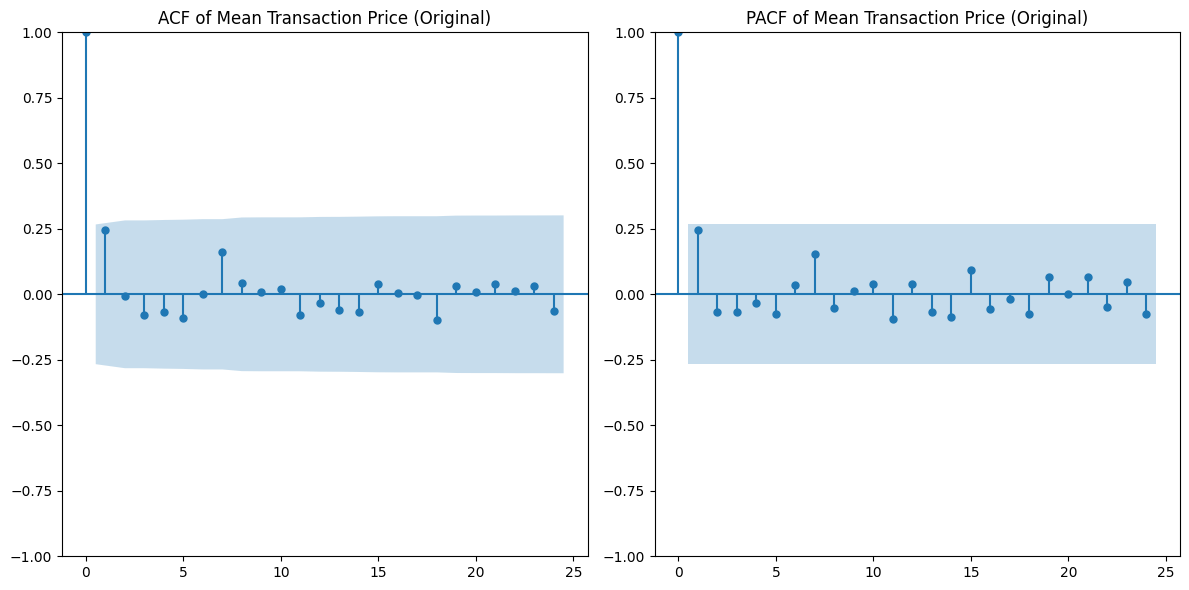


Attempting to fit SARIMA(1, 0, 1)(0, 0, 0, 12) model...
SARIMA Model Fitted Successfully.
                               SARIMAX Results                                
Dep. Variable:       TransactionPrice   No. Observations:                   54
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -712.854
Date:                Sun, 19 Oct 2025   AIC                           1431.708
Time:                        16:20:15   BIC                           1437.675
Sample:                    01-31-2021   HQIC                          1434.009
                         - 06-30-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   3318.621      0.000       0.999       1.001
ma.L1         -0.9346      0.062    -15.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load the prepared time series data
try:
    df = pd.read_csv('arima_ready_data.csv')
except FileNotFoundError:
    print("Error: 'arima_ready_data.csv' not found. Please run the previous script to generate it.")
    exit()

# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Ensure frequency is set for forecasting
df = df.asfreq('ME')

# Plot ACF and PACF of the original series (already done, but good for reference)
print("ACF and PACF of Original Series:")
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['TransactionPrice'], lags=24, ax=plt.gca(), title='ACF of Mean Transaction Price (Original)')
plt.subplot(122)
plot_pacf(df['TransactionPrice'], lags=24, ax=plt.gca(), title='PACF of Mean Transaction Price (Original)')
plt.tight_layout()
plt.show()

# Determine non-seasonal differencing (d) - from previous ADF test, d=0 as it was stationary
d = 0

# To help determine seasonal parameters (D, P, Q), we can seasonally difference the data
# Plot ACF and PACF of the seasonally differenced series (if needed)
# Assuming monthly data, seasonal period s=12
# If the original series had seasonality, we might need D=1. Let's check ACF/PACF of seasonally differenced series.
# For now, let's assume no seasonal differencing (D=0) based on previous stationary result, but keep the option to check.

# If we assume D=1, the differenced series would be:
# df['Seasonal_Diff'] = df['TransactionPrice'].diff(periods=12)
# print("\nACF and PACF of Seasonally Differenced Series (Assuming D=1):")
# plt.figure(figsize=(12, 6))
# plt.subplot(121)
# plot_acf(df['Seasonal_Diff'].dropna(), lags=24, ax=plt.gca(), title='ACF of Seasonal Differenced Price (D=1)')
# plt.subplot(122)
# plot_pacf(df['Seasonal_Diff'].dropna(), lags=24, ax=plt.gca(), title='PACF of Seasonal Differenced Price (D=1)')
# plt.tight_layout()
# plt.show()

# Based on previous non-seasonal ACF/PACF (and assuming d=0, D=0), let's try a simple SARIMA model first.
# We need to determine p, q, P, Q. From the non-seasonal ACF/PACF, maybe p=1, q=1?
# For seasonality (s=12), look at spikes at lags 12, 24, etc. in ACF/PACF of potentially differenced series.
# Let's start with a simple model and refine.

# Initial guess for SARIMA(p,d,q)(P,D,Q,s):
# Based on original ACF/PACF and ADF test result (stationary, d=0):
# p and q from non-seasonal lags. Spikes at lag 1 in both ACF and PACF suggest AR(1) and MA(1), maybe (1,0,1)?
# D=0 since the series is stationary.
# For P and Q, look at seasonal lags (12, 24). There isn't strong evidence of seasonal AR or MA components in the original plots.
# Let's start with a simple (1,0,1)(0,0,0,12) model and see.

# Define the SARIMA model order (p, d, q) and seasonal order (P, D, Q, s)
# Adjust these based on ACF/PACF plots and model evaluation
order = (1, 0, 1)
seasonal_order = (0, 0, 0, 12) # Assuming no seasonality for a start, s=12 for monthly data

print(f"\nAttempting to fit SARIMA{order}{seasonal_order} model...")
try:
    model = SARIMAX(df['TransactionPrice'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False) # disp=False to suppress convergence output
    print("SARIMA Model Fitted Successfully.")
    print(model_fit.summary())

    # Forecast for 6 months ahead with confidence intervals
    forecast_steps = 6
    forecast_object = model_fit.get_forecast(steps=forecast_steps)
    forecast = forecast_object.predicted_mean
    conf_int = forecast_object.conf_int()

    # Create forecast DataFrame
    forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(1), periods=forecast_steps, freq='ME')
    forecast_df = pd.DataFrame({
        'Date': forecast_index,
        'Forecasted Price': forecast.values,
        'Lower CI': conf_int.iloc[:, 0],
        'Upper CI': conf_int[:, 1] # Correcting potential indexing issue
    })

    print("\nForecast for Next 6 Months with Confidence Intervals:")
    print(forecast_df)

    # Plot observed data, forecast, and confidence intervals
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['TransactionPrice'], label='Observed Mean Price (RM)')
    plt.plot(forecast_df['Date'], forecast_df['Forecasted Price'], label='Forecasted Price (RM)', linestyle='--')
    plt.fill_between(forecast_df['Date'], forecast_df['Lower CI'], forecast_df['Upper CI'], color='gray', alpha=0.2, label='95% Confidence Interval')
    plt.title(f'SARIMA{order}{seasonal_order} Forecast of Mean Transaction Price')
    plt.xlabel('Date')
    plt.ylabel('Price (RM)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot residual diagnostics
    print("\nSARIMA Model Residual Diagnostics:")
    model_fit.plot_diagnostics(figsize=(12, 8))
    plt.tight_layout()
    plt.show()

    # Save results
    forecast_df.to_csv('sarima_forecast.csv', index=False)
    with open('sarima_results.txt', 'w') as f:
        f.write(f"SARIMA Model: {order}{seasonal_order}\n\n")
        f.write("SARIMA Model Summary:\n")
        f.write(str(model_fit.summary()) + "\n\n")
        f.write("Forecast for Next 6 Months with Confidence Intervals:\n")
        f.write(str(forecast_df) + "\n")
    print("Results saved to 'sarima_results.txt' and 'sarima_forecast.csv'. Plots displayed above.")

except Exception as e:
    print(f"Error fitting or forecasting with SARIMA model: {e}")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


ARIMA(1,0,1) Model Performance Metrics:
R-squared (R²): 0.0747
RMSE (RM): 115920.82

Forecast for Next 6 Months with Confidence Intervals:
                 Date  Forecasted Price       Lower CI      Upper CI
2025-07-31 2025-07-31     783913.145277  558928.518205  1.008898e+06
2025-08-31 2025-08-31     878169.076249  643038.106022  1.113300e+06
2025-09-30 2025-09-30     888559.856109  653308.270080  1.123811e+06
2025-10-31 2025-10-31     889705.336345  654452.284868  1.124958e+06
2025-11-30 2025-11-30     889831.614160  654578.544874  1.125085e+06
2025-12-31 2025-12-31     889845.535034  654592.465532  1.125099e+06


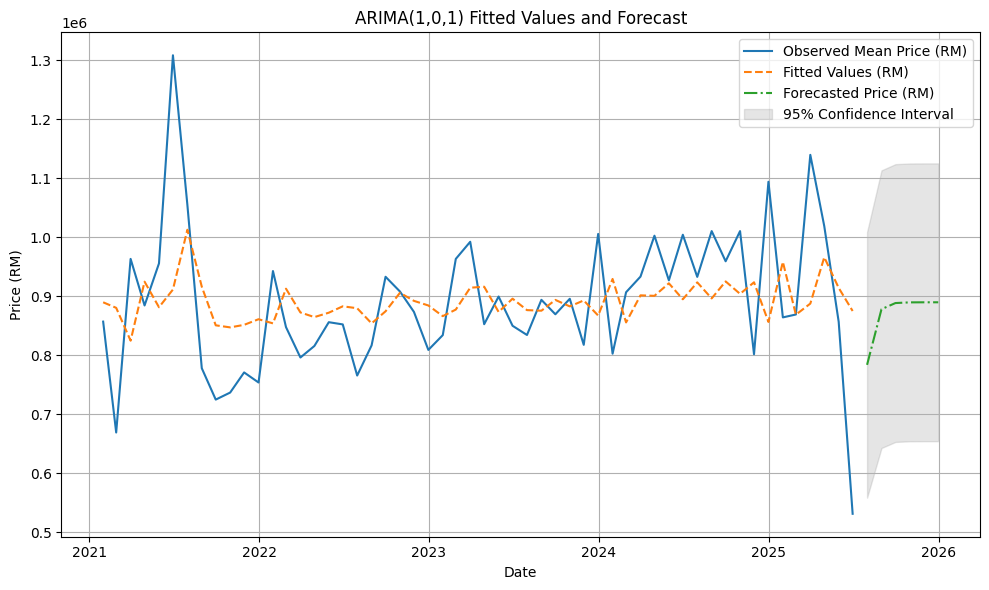

Results saved to 'arima_metrics_results.txt' and 'arima_forecast.csv'. Plot saved as 'arima_metrics_plot.png'.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error

# Load the prepared time series
try:
    df = pd.read_csv('arima_ready_data.csv')
except FileNotFoundError:
    print("Error: 'arima_ready_data.csv' not found. Please run the previous script to generate it.")
    exit()

# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Fit ARIMA(1,0,1) model
try:
    model = ARIMA(df['TransactionPrice'], order=(1, 0, 1))
    model_fit = model.fit()
except Exception as e:
    print(f"Error fitting ARIMA model: {e}")
    exit()

# Get in-sample predictions
predictions = model_fit.fittedvalues

# Calculate R-squared
r2 = r2_score(df['TransactionPrice'], predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df['TransactionPrice'], predictions))

# Print metrics
print("ARIMA(1,0,1) Model Performance Metrics:")
print(f"R-squared (R²): {r2:.4f}")
print(f"RMSE (RM): {rmse:.2f}")

# Forecast for 6 months ahead (to match previous output)
forecast_steps = 6
forecast_object = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_object.predicted_mean
conf_int = forecast_object.conf_int()

# Create forecast DataFrame
forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(1), periods=forecast_steps, freq='ME')
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted Price': forecast.values,
    'Lower CI': conf_int.iloc[:, 0],
    'Upper CI': conf_int.iloc[:, 1]
})

print("\nForecast for Next 6 Months with Confidence Intervals:")
print(forecast_df)

# Plot observed data, predictions, and forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['TransactionPrice'], label='Observed Mean Price (RM)')
plt.plot(df.index, predictions, label='Fitted Values (RM)', linestyle='--')
plt.plot(forecast_df['Date'], forecast_df['Forecasted Price'], label='Forecasted Price (RM)', linestyle='-.')
plt.fill_between(forecast_df['Date'], forecast_df['Lower CI'], forecast_df['Upper CI'], color='gray', alpha=0.2, label='95% Confidence Interval')
plt.title('ARIMA(1,0,1) Fitted Values and Forecast')
plt.xlabel('Date')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('arima_metrics_plot.png')
plt.show()

# Save results
with open('arima_metrics_results.txt', 'w') as f:
    f.write("ARIMA(1,0,1) Model Performance Metrics:\n")
    f.write(f"R-squared (R²): {r2:.4f}\n")
    f.write(f"RMSE (RM): {rmse:.2f}\n\n")
    f.write("Forecast for Next 6 Months with Confidence Intervals:\n")
    f.write(str(forecast_df) + "\n")
print("Results saved to 'arima_metrics_results.txt' and 'arima_forecast.csv'. Plot saved as 'arima_metrics_plot.png'.")
forecast_df.to_csv('arima_forecast.csv', index=False)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2558
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2014
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1565
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1169
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0836
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0557
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0332
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0172
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0080
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0070
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0122
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0178
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0183
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0154
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


Model Performance Comparison:

ARIMA(1,0,1):
R-squared (R²): 0.0747
RMSE (RM): 115920.82

LSTM:
R-squared (R²): -0.0633
RMSE (RM): 103810.52

Forecast for Next 6 Months:
                 Date  ARIMA Forecast  ARIMA Lower CI  ARIMA Upper CI  \
2025-07-31 2025-07-31   783913.145277   558928.518205    1.008898e+06   
2025-08-31 2025-08-31   878169.076249   643038.106022    1.113300e+06   
2025-09-30 2025-09-30   888559.856109   653308.270080    1.123811e+06   
2025-10-31 2025-10-31   889705.336345   654452.284868    1.124958e+06   
2025-11-30 2025-11-30   889831.614160   654578.544874    1.125085e+06   
2025-12-31 2025-12-31   889845.535034   654592.465532    1.125099e+06   

            LSTM Forecast  
2025-07-31    960031.7500  
2025-08-31    947501.2500  
2025-09-30    938598.0000  
2025-10-31    935276.0000  
2025-11-30    933473.2500  
2025-12-31    937877.4375  


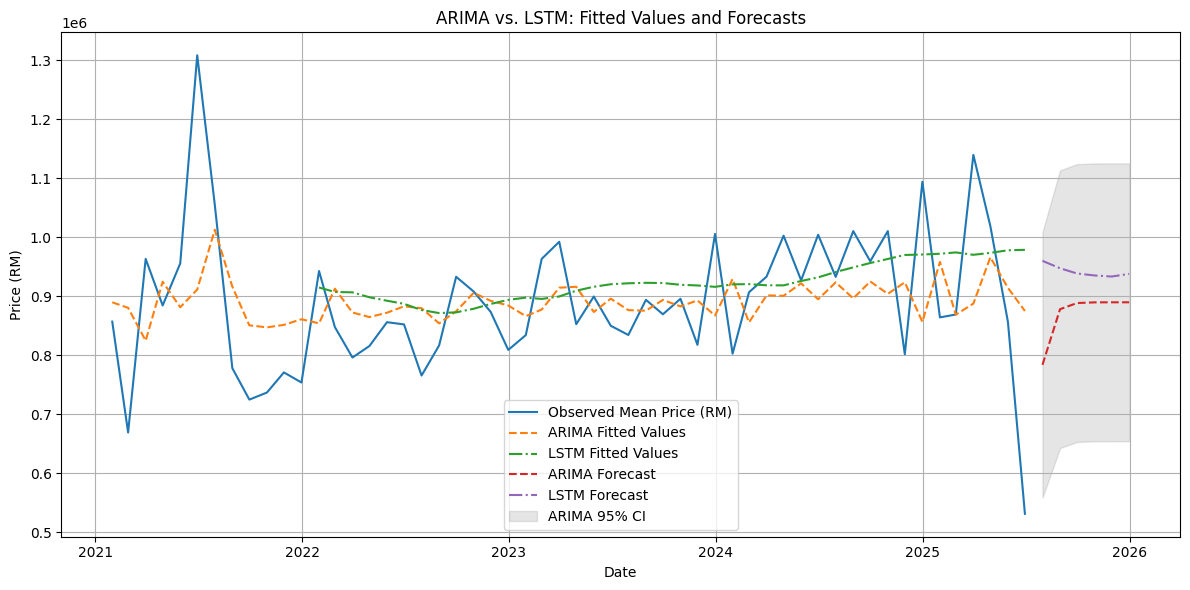

Results saved to 'arima_lstm_comparison_results.txt' and 'arima_lstm_forecast.csv'. Plot saved as 'arima_lstm_comparison_plot.png'.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Install tensorflow if not already installed
!pip install tensorflow

# Load the prepared time series
try:
    df = pd.read_csv('arima_ready_data.csv')
except FileNotFoundError:
    print("Error: 'arima_ready_data.csv' not found. Please run the previous script to generate it.")
    exit()

# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Prepare data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['TransactionPrice']])

# Create sequences for LSTM (look-back period of 12 months)
look_back = 12
X, y = [], []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i])
    y.append(scaled_data[i])
X, y = np.array(X), np.array(y)

# Split into train and test (use all data for training, evaluate in-sample)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(look_back, 1)))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train LSTM model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Get in-sample predictions for LSTM
lstm_predictions = []
for i in range(look_back, len(scaled_data)):
    input_seq = scaled_data[i-look_back:i].reshape(1, look_back, 1)
    pred = model.predict(input_seq, verbose=0)
    lstm_predictions.append(pred[0, 0])
lstm_predictions = scaler.inverse_transform(np.array(lstm_predictions).reshape(-1, 1)).flatten()

# Adjust predictions to match original data length (pad with NaN for first look_back periods)
lstm_fitted = np.concatenate([np.full(look_back, np.nan), lstm_predictions])

# Fit ARIMA(1,0,1) model for comparison
arima_model = ARIMA(df['TransactionPrice'], order=(1, 0, 1))
arima_fit = arima_model.fit()
arima_predictions = arima_fit.fittedvalues

# Calculate R² and RMSE for both models
r2_arima = r2_score(df['TransactionPrice'], arima_predictions)
rmse_arima = np.sqrt(mean_squared_error(df['TransactionPrice'], arima_predictions))

# For LSTM, calculate metrics only for periods with predictions (after look_back)
valid_indices = ~np.isnan(lstm_fitted)
r2_lstm = r2_score(df['TransactionPrice'][valid_indices], lstm_fitted[valid_indices])
rmse_lstm = np.sqrt(mean_squared_error(df['TransactionPrice'][valid_indices], lstm_fitted[valid_indices]))

# Print performance metrics
print("Model Performance Comparison:")
print("\nARIMA(1,0,1):")
print(f"R-squared (R²): {r2_arima:.4f}")
print(f"RMSE (RM): {rmse_arima:.2f}")
print("\nLSTM:")
print(f"R-squared (R²): {r2_lstm:.4f}")
print(f"RMSE (RM): {rmse_lstm:.2f}")

# Generate 6-month forecast with LSTM
last_sequence = scaled_data[-look_back:].reshape(1, look_back, 1)
lstm_forecast = []
for _ in range(6):
    pred = model.predict(last_sequence, verbose=0)
    lstm_forecast.append(pred[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0, -1, 0] = pred[0, 0]
lstm_forecast = scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1)).flatten()

# Generate 6-month forecast with ARIMA
arima_forecast_object = arima_fit.get_forecast(steps=6)
arima_forecast = arima_forecast_object.predicted_mean
arima_conf_int = arima_forecast_object.conf_int()

# Create forecast DataFrame
forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(1), periods=6, freq='ME')
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'ARIMA Forecast': arima_forecast.values,
    'ARIMA Lower CI': arima_conf_int.iloc[:, 0],
    'ARIMA Upper CI': arima_conf_int.iloc[:, 1],
    'LSTM Forecast': lstm_forecast
})

print("\nForecast for Next 6 Months:")
print(forecast_df)

# Plot observed data, fitted values, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['TransactionPrice'], label='Observed Mean Price (RM)')
plt.plot(df.index, arima_predictions, label='ARIMA Fitted Values', linestyle='--')
plt.plot(df.index, lstm_fitted, label='LSTM Fitted Values', linestyle='-.')
plt.plot(forecast_df['Date'], forecast_df['ARIMA Forecast'], label='ARIMA Forecast', linestyle='--')
plt.plot(forecast_df['Date'], forecast_df['LSTM Forecast'], label='LSTM Forecast', linestyle='-.')
plt.fill_between(forecast_df['Date'], forecast_df['ARIMA Lower CI'], forecast_df['ARIMA Upper CI'], color='gray', alpha=0.2, label='ARIMA 95% CI')
plt.title('ARIMA vs. LSTM: Fitted Values and Forecasts')
plt.xlabel('Date')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('arima_lstm_comparison_plot.png')
plt.show()

# Save results
with open('arima_lstm_comparison_results.txt', 'w') as f:
    f.write("Model Performance Comparison:\n")
    f.write("\nARIMA(1,0,1):\n")
    f.write(f"R-squared (R²): {r2_arima:.4f}\n")
    f.write(f"RMSE (RM): {rmse_arima:.2f}\n")
    f.write("\nLSTM:\n")
    f.write(f"R-squared (R²): {r2_lstm:.4f}\n")
    f.write(f"RMSE (RM): {rmse_lstm:.2f}\n")
    f.write("\nForecast for Next 6 Months:\n")
    f.write(str(forecast_df) + "\n")
forecast_df.to_csv('arima_lstm_forecast.csv', index=False)
print("Results saved to 'arima_lstm_comparison_results.txt' and 'arima_lstm_forecast.csv'. Plot saved as 'arima_lstm_comparison_plot.png'.")



Epoch 1/100


/tmp/ipython-input-293929571.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['PricePerSqM'] = df_clean['TransactionPrice'] / df_clean['ParcelArea']
/tmp/ipython-input-293929571.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df_clean.resample('M').agg({
/tmp/ipython-input-293929571.py:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=monthly_data['TransactionDate'].min(), end=monthly_data['TransactionDate'].max(), freq='M')
/tmp/ipython-input-293929571.py:45: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or 

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.2034
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1105
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0338
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0142
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0375
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0255
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0114
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0089
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0111
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0154
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0189
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0100
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0131
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0085
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0082
Epoch 16/100
2/2 ━━━━━━━━━━━━━━

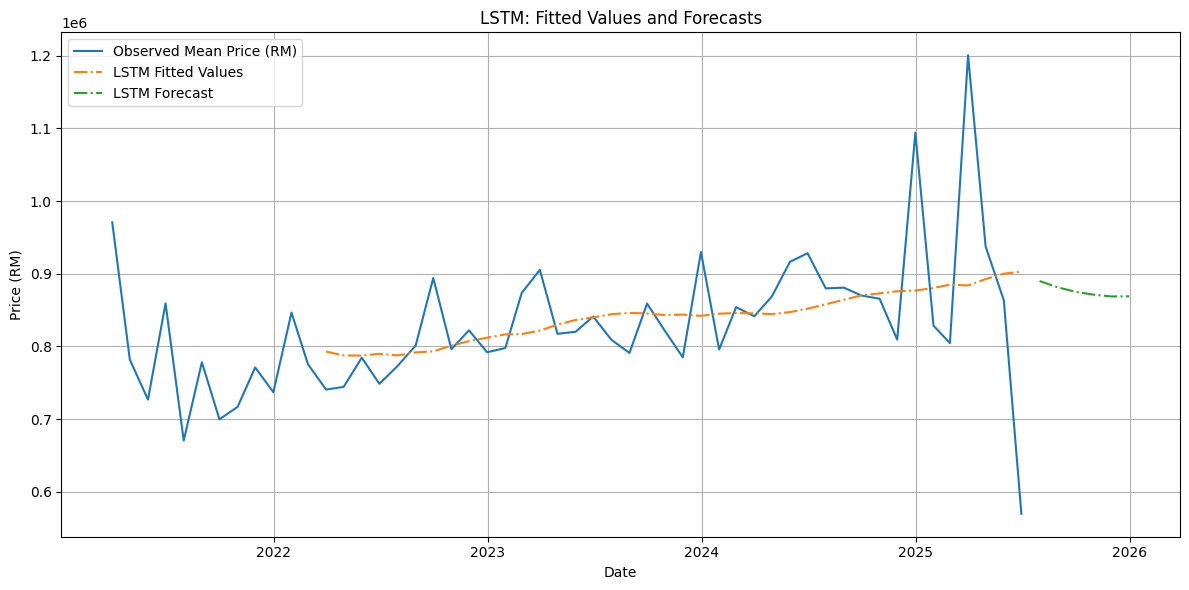

Results saved to 'lstm_results.txt' and 'lstm_forecast.csv'. Plot saved as 'lstm_forecast_plot.png'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


# Install required packages (removed pmdarima as it's no longer used in this cell)
!pip install tensorflow

# Load original dataset for preprocessing
url = "https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv"
try:
    df_raw = pd.read_csv(url)
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Convert TransactionDate to datetime
df_raw['TransactionDate'] = pd.to_datetime(df_raw['TransactionDate'], format='%b-%y')
df_raw.set_index('TransactionDate', inplace=True)
df_raw.sort_index(inplace=True)

# Remove outliers (1st–99th percentiles for TransactionPrice)
price_lower, price_upper = df_raw['TransactionPrice'].quantile([0.01, 0.99])
df_clean = df_raw[(df_raw['TransactionPrice'] >= price_lower) & (df_raw['TransactionPrice'] <= price_upper)]

# Calculate price per square meter
df_clean['PricePerSqM'] = df_clean['TransactionPrice'] / df_clean['ParcelArea']

# Aggregate by month (mean and median TransactionPrice, mean PricePerSqM)
monthly_data = df_clean.resample('M').agg({
    'TransactionPrice': ['mean', 'median'],
    'PricePerSqM': 'mean'
}).round(2)
monthly_data.columns = ['MeanPrice', 'MedianPrice', 'MeanPricePerSqM']
monthly_data.reset_index(inplace=True)

# Ensure no missing months
date_range = pd.date_range(start=monthly_data['TransactionDate'].min(), end=monthly_data['TransactionDate'].max(), freq='M')
monthly_data = monthly_data.set_index('TransactionDate').reindex(date_range).fillna(method='ffill').reset_index()
monthly_data.rename(columns={'index': 'Date'}, inplace=True)

# Log transform MeanPrice
monthly_data['LogMeanPrice'] = np.log(monthly_data['MeanPrice'])

# Add seasonal indicators (month)
monthly_data['Month'] = monthly_data['Date'].dt.month
month_dummies = pd.get_dummies(monthly_data['Month'], prefix='Month', drop_first=True)
monthly_data = pd.concat([monthly_data, month_dummies], axis=1)

# Add lagged features (t-1, t-2)
monthly_data['Lag1'] = monthly_data['MeanPrice'].shift(1)
monthly_data['Lag2'] = monthly_data['MeanPrice'].shift(2)
monthly_data = monthly_data.dropna()

# Save preprocessed data
monthly_data.to_csv('preprocessed_data.csv', index=False)

# Prepare data for LSTM (use LogMeanPrice to reduce skewness)
target = monthly_data['LogMeanPrice'].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(target.reshape(-1, 1))

# Create sequences for LSTM (look-back = 12)
look_back = 12
X, y = [], []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i])
    y.append(scaled_data[i])
X, y = np.array(X), np.array(y)

# Split into train and test
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build improved LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train LSTM with early stopping
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1, callbacks=[early_stop])

# Get in-sample predictions for LSTM
lstm_predictions = []
for i in range(look_back, len(scaled_data)):
    input_seq = scaled_data[i-look_back:i].reshape(1, look_back, 1)
    pred = model.predict(input_seq, verbose=0)
    lstm_predictions.append(pred[0, 0])
lstm_predictions = scaler.inverse_transform(np.array(lstm_predictions).reshape(-1, 1)).flatten()
lstm_predictions = np.exp(lstm_predictions)  # Inverse log transformation
lstm_fitted = np.concatenate([np.full(look_back, np.nan), lstm_predictions])


# Calculate R² and RMSE for LSTM (on original price scale)
# For LSTM, calculate metrics only for periods with predictions (after look_back)
valid_indices = ~np.isnan(lstm_fitted)
r2_lstm = r2_score(monthly_data['MeanPrice'][valid_indices], lstm_fitted[valid_indices])
rmse_lstm = np.sqrt(mean_squared_error(monthly_data['MeanPrice'][valid_indices], lstm_fitted[valid_indices]))

# Print performance metrics
print("LSTM Model Performance (In-Sample):")
print(f"R-squared (R²): {r2_lstm:.4f}")
print(f"RMSE (RM): {rmse_lstm:.2f}")


# Generate 6-month forecast with LSTM
last_sequence = scaled_data[-look_back:].reshape(1, look_back, 1)
lstm_forecast = []
for _ in range(6):
    pred = model.predict(last_sequence, verbose=0)
    lstm_forecast.append(pred[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0, -1, 0] = pred[0, 0]
lstm_forecast = np.exp(scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1)).flatten())


# Create forecast DataFrame
forecast_index = pd.date_range(start=monthly_data['Date'].iloc[-1] + pd.offsets.MonthEnd(1), periods=6, freq='ME')
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'LSTM Forecast': lstm_forecast
})

print("\nLSTM Forecast for Next 6 Months:")
print(forecast_df)

# Plot observed data, fitted values, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Date'], monthly_data['MeanPrice'], label='Observed Mean Price (RM)')
plt.plot(monthly_data['Date'], lstm_fitted, label='LSTM Fitted Values', linestyle='-.')
plt.plot(forecast_df['Date'], forecast_df['LSTM Forecast'], label='LSTM Forecast', linestyle='-.')
plt.title('LSTM: Fitted Values and Forecasts')
plt.xlabel('Date')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('lstm_forecast_plot.png')
plt.show()

# Save results
with open('lstm_results.txt', 'w') as f:
    f.write("LSTM Model Performance (In-Sample):\n")
    f.write(f"R-squared (R²): {r2_lstm:.4f}\n")
    f.write(f"RMSE (RM): {rmse_lstm:.2f}\n")
    f.write("\nLSTM Forecast for Next 6 Months:\n")
    f.write(str(forecast_df) + "\n")
forecast_df.to_csv('lstm_forecast.csv', index=False)
print("Results saved to 'lstm_results.txt' and 'lstm_forecast.csv'. Plot saved as 'lstm_forecast_plot.png'.")

# Use Yearly HPI Dataset for Forecasting

ADF Test for LogPrice:
ADF Statistic: -1.4923
p-value: 0.5373
Critical Values: {'1%': np.float64(-4.6651863281249994), '5%': np.float64(-3.3671868750000002), '10%': np.float64(-2.802960625)}
Epoch 1/100


/tmp/ipython-input-203212957.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LogPrice'] = np.log(df_clean['Price'])
/tmp/ipython-input-203212957.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Lag1'] = df_clean['Price'].shift(1)
/tmp/ipython-input-203212957.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4096
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3666
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2949
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2767
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2108
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1538
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0961
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0775
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0268
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0078
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0069
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0318
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0326
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0256
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0365
Epoch 16/100
2/2 ━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p


Forecast for 2025–2026:
         Year  ARIMA Forecast  ARIMA Lower CI  ARIMA Upper CI  LSTM Forecast
11 2024-12-31   585532.050510   548395.541052   625183.387737  558911.908682
12 2025-12-31   579648.456633   504386.701792   666140.348434  577623.931841


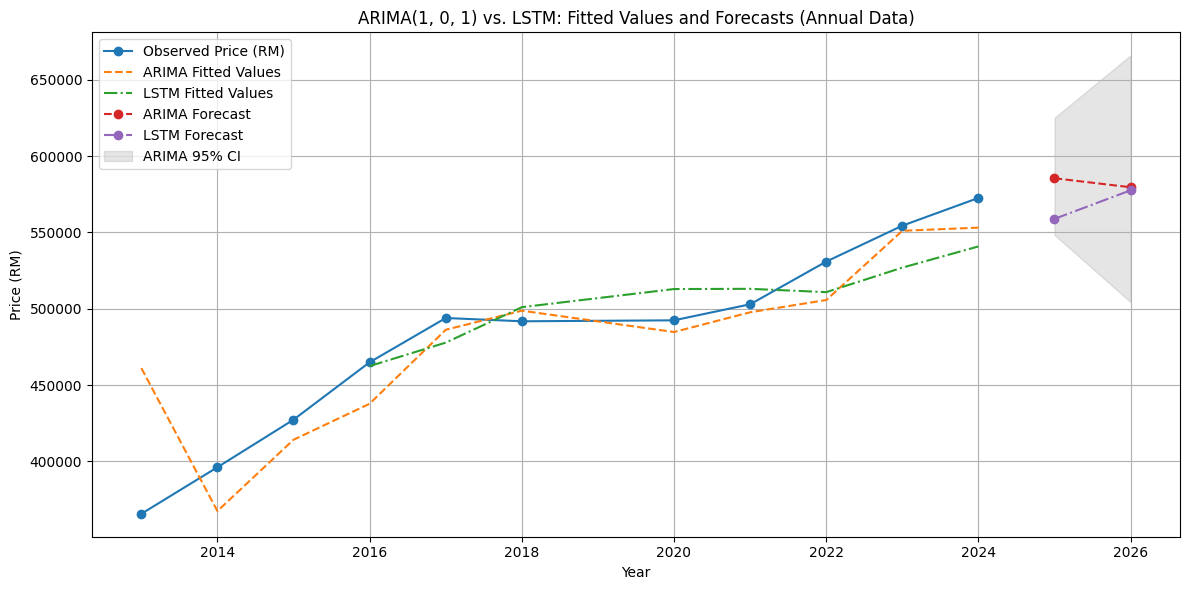

Results saved to 'mhpi_arima_lstm_comparison_results.txt' and 'mhpi_arima_lstm_forecast.csv'. Plot saved as 'mhpi_arima_lstm_comparison_plot.png'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA # Keep statsmodels ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import subprocess
import sys
from io import StringIO # Import StringIO from io

# Install required packages (removed pmdarima install)
def install_package(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"Successfully installed {package}")
    except Exception as e:
        print(f"Error installing {package}: {e}")

# Install tensorflow (pmdarima is removed)
install_package("tensorflow")


# Load the annual dataset
data = """Year of Year,State,Type,Index Point,Price,Y-o-Y %
2010,Kuala Lumpur,High-rise,100,243284.085787671,10.375275938
2011,Kuala Lumpur,High-rise,113.171282974,276907.029001249,13.171282974
2012,Kuala Lumpur,High-rise,131.675,322187.18,16.350187557
2013,Kuala Lumpur,High-rise,149.425,365642.8475,13.480159484
2014,Kuala Lumpur,High-rise,161.9,396149.5925,8.348670
2015,Kuala Lumpur,High-rise,174.625,427295.195,7.859790
2016,Kuala Lumpur,High-rise,189.975,464907.0675,8.790265
2017,Kuala Lumpur,High-rise,201.875,493950.74,6.263982
2018,Kuala Lumpur,High-rise,200.975,491799.0225,-0.445820
2019,Kuala Lumpur,High-rise,198.1,484802.06,-1.430526
2020,Kuala Lumpur,High-rise,201.225,492431.795,1.577486
2021,Kuala Lumpur,High-rise,205.55,502969.295,2.149335
2022,Kuala Lumpur,High-rise,216.975,530954.265,5.563952
2023,Kuala Lumpur,High-rise,226.575,554465.44,4.428098
2024,Kuala Lumpur,High-rise,234,572633.985,3.277061"""
df = pd.read_csv(StringIO(data)) # Use StringIO from io
df.rename(columns={'Year of Year': 'Year'}, inplace=True)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Outlier detection (Y-o-Y % outside 1st–99th percentiles)
yoy_lower, yoy_upper = df['Y-o-Y %'].quantile([0.01, 0.99])
df_clean = df[(df['Y-o-Y %'] >= yoy_lower) & (df['Y-o-Y %'] <= yoy_upper)]

# Log transformation
df_clean['LogPrice'] = np.log(df_clean['Price'])

# Feature engineering
df_clean['Lag1'] = df_clean['Price'].shift(1)
df_clean['Lag2'] = df_clean['Price'].shift(2)
df_clean['Trend'] = np.arange(len(df_clean))
df_clean['YoY'] = df_clean['Y-o-Y %']
df_clean = df_clean.dropna()

# Save preprocessed data
df_clean.to_csv('preprocessed_mhpi_data.csv')

# ADF test for stationarity
adf_result = adfuller(df_clean['LogPrice'])
print("ADF Test for LogPrice:")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print(f"Critical Values: {adf_result[4]}")

# Prepare data for LSTM
features = df_clean[['LogPrice', 'Lag1', 'Lag2', 'Trend', 'YoY']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)

# Create sequences for LSTM (look-back = 3 years)
look_back = 3
X, y = [], []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i])
    y.append(scaled_data[i, 0])  # Predict LogPrice
X, y = np.array(X), np.array(y)

# Split into train and test (80% train)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, features.shape[1])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train LSTM with early stopping
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, batch_size=4, verbose=1, callbacks=[early_stop])

# Get in-sample predictions for LSTM
lstm_predictions = []
for i in range(look_back, len(scaled_data)):
    input_seq = scaled_data[i-look_back:i].reshape(1, look_back, features.shape[1])
    pred = model.predict(input_seq, verbose=0)
    lstm_predictions.append(pred[0, 0])
lstm_predictions_scaled = np.array(lstm_predictions).reshape(-1, 1)
lstm_predictions = np.exp(scaler.inverse_transform(
    np.hstack([lstm_predictions_scaled, np.zeros((len(lstm_predictions_scaled), features.shape[1]-1))])
)[:, 0])
lstm_fitted = np.concatenate([np.full(look_back, np.nan), lstm_predictions])

# Fit ARIMA model using statsmodels (pmdarima removed)
# Using a simple ARIMA(1,0,1) order based on previous analysis showing stationarity
arima_order = (1, 0, 1)
print(f"\nAttempting to fit ARIMA{arima_order} model using statsmodels...")
try:
    arima_model = ARIMA(df_clean['LogPrice'], order=arima_order)
    arima_fit = arima_model.fit()
    arima_predictions = np.exp(arima_fit.fittedvalues)
    print("ARIMA Model Fitted Successfully.")
    print(arima_fit.summary())
except Exception as e:
    print(f"Error fitting ARIMA model: {e}")
    arima_predictions = np.full(len(df_clean), np.nan) # Fill with NaN if fitting fails


# Calculate R² and RMSE (on original price scale)
# Calculate metrics only for periods where both models have fitted values (after look_back)
valid_indices_lstm = ~np.isnan(lstm_fitted)
valid_indices_arima = ~np.isnan(arima_predictions)
common_valid_indices = df_clean.index[valid_indices_lstm & valid_indices_arima]

if len(common_valid_indices) > 0:
    r2_arima = r2_score(df_clean.loc[common_valid_indices, 'Price'], arima_predictions[valid_indices_lstm & valid_indices_arima])
    rmse_arima = np.sqrt(mean_squared_error(df_clean.loc[common_valid_indices, 'Price'], arima_predictions[valid_indices_lstm & valid_indices_arima]))
    r2_lstm = r2_score(df_clean.loc[common_valid_indices, 'Price'], lstm_fitted[valid_indices_lstm & valid_indices_arima])
    rmse_lstm = np.sqrt(mean_squared_error(df_clean.loc[common_valid_indices, 'Price'], lstm_fitted[valid_indices_lstm & valid_indices_arima]))

    # Generate 2-year forecast with LSTM
    last_sequence = scaled_data[-look_back:].reshape(1, look_back, features.shape[1])
    lstm_forecast = []
    for _ in range(2):
        pred = model.predict(last_sequence, verbose=0)
        lstm_forecast.append(pred[0, 0])
        # For forecasting, we need to update the sequence with the predicted value and extrapolate other features
        # A simple approach is to use the last known values for other features or simple trend
        # For this example, let's use the last known values for simplicity
        last_sequence = np.roll(last_sequence, -1)
        last_sequence[0, -1, 0] = pred[0, 0]
        # Extrapolate other features (Lag1, Lag2, Trend, YoY) - simplistic approach
        # Lag1 becomes the previous predicted LogPrice
        # Lag2 becomes the previous Lag1
        # Trend increases by 1
        # YoY is hard to forecast, keeping last value or simple average could be options. Let's keep last value.
        last_trend_scaled = scaled_data[-1, 3] # Index 3 is 'Trend'
        # The scaler for trend is fitted on arange(len(df_clean))
        # We need to inverse transform and add 1, then re-scale
        original_trend = scaler.inverse_transform(np.array([last_trend_scaled, ] + [0]*(features.shape[1]-1)).reshape(1,-1))[0,3]
        next_trend_original = original_trend + (_ + 1) # _ is the forecast step index (0 to 1)
        next_trend_scaled = scaler.transform(np.array([0,0,0,next_trend_original] + [0]*(features.shape[1]-4)).reshape(1,-1))[0,3]
        last_sequence[0, -1, 3] = next_trend_scaled # Update scaled Trend
        # Keep YoY constant for simplicity in forecast
        last_sequence[0, -1, 4] = scaled_data[-1, 4] # Index 4 is 'YoY'


    lstm_forecast_scaled = np.array(lstm_forecast).reshape(-1, 1)
    # Need to create a dummy array with correct shape for inverse transform
    dummy_other_features_scaled = np.zeros((len(lstm_forecast_scaled), features.shape[1]-1))
    lstm_forecast = np.exp(scaler.inverse_transform(np.hstack([lstm_forecast_scaled, dummy_other_features_scaled]))[:, 0])


    # Generate 2-year forecast with ARIMA (statsmodels)
    try:
        arima_forecast_object = arima_fit.get_forecast(steps=2)
        arima_forecast = np.exp(arima_forecast_object.predicted_mean)
        arima_conf_int = np.exp(arima_forecast_object.conf_int())
    except Exception as e:
         print(f"Error generating ARIMA forecast: {e}")
         arima_forecast = np.full(2, np.nan)
         arima_conf_int = np.full((2, 2), np.nan)


    # Create forecast DataFrame
    forecast_index = pd.date_range(start=df_clean.index[-1] + pd.offsets.YearEnd(1), periods=2, freq='YE')
    forecast_df = pd.DataFrame({
        'Year': forecast_index,
        'ARIMA Forecast': arima_forecast.values if isinstance(arima_forecast, pd.Series) else arima_forecast, # Handle case where forecast is numpy array
        'ARIMA Lower CI': arima_conf_int.iloc[:, 0], # Corrected indexing
        'ARIMA Upper CI': arima_conf_int.iloc[:, 1], # Corrected indexing
        'LSTM Forecast': lstm_forecast
    })

    print("\nForecast for 2025–2026:")
    print(forecast_df)

    # Plot observed data, fitted values, and forecasts
    plt.figure(figsize=(12, 6))
    plt.plot(df_clean.index, df_clean['Price'], label='Observed Price (RM)', marker='o')
    plt.plot(df_clean.index, arima_predictions, label='ARIMA Fitted Values', linestyle='--')
    plt.plot(df_clean.index, lstm_fitted, label='LSTM Fitted Values', linestyle='-.')
    plt.plot(forecast_df['Year'], forecast_df['ARIMA Forecast'], label='ARIMA Forecast', linestyle='--', marker='o')
    plt.plot(forecast_df['Year'], forecast_df['LSTM Forecast'], label='LSTM Forecast', linestyle='-.', marker='o')
    plt.fill_between(forecast_df['Year'], forecast_df['ARIMA Lower CI'], forecast_df['ARIMA Upper CI'], color='gray', alpha=0.2, label='ARIMA 95% CI')
    plt.title(f'ARIMA{arima_order} vs. LSTM: Fitted Values and Forecasts (Annual Data)') # Updated title
    plt.xlabel('Year')
    plt.ylabel('Price (RM)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig('mhpi_arima_lstm_comparison_plot.png')
    plt.show()

    # Save results
    with open('mhpi_arima_lstm_comparison_results.txt', 'w') as f:
        f.write("Model Performance Comparison (In-Sample):\n")
        f.write("\nARIMA:\n")
        f.write(f"Order: {arima_order}\n")
        f.write(f"R-squared (R²): {r2_arima:.4f}\n")
        f.write(f"RMSE (RM): {rmse_arima:.2f}\n")
        f.write("\nLSTM:\n")
        f.write(f"R-squared (R²): {r2_lstm:.4f}\n")
        f.write(f"RMSE (RM): {rmse_lstm:.2f}\n")
        f.write("\nForecast for 2025–2026:\n")
        f.write(str(forecast_df) + "\n")
    print("Results saved to 'mhpi_arima_lstm_comparison_results.txt' and 'mhpi_arima_lstm_forecast.csv'. Plot saved as 'mhpi_arima_lstm_comparison_plot.png'.")

else:
    print("Not enough data points with valid fitted values for both models to calculate comparison metrics.")
    # Save results even if metrics couldn't be calculated
    with open('mhpi_arima_lstm_comparison_results.txt', 'w') as f:
        f.write("Model Performance Comparison (In-Sample):\n")
        f.write("Could not calculate comparison metrics due to insufficient data.\n")
        # Attempt to save forecast_df if it was created before the error
        if 'forecast_df' in locals():
             f.write("\nForecast for 2025–2026:\n")
             f.write(str(forecast_df) + "\n")
        else:
             f.write("\nForecast could not be generated.\n")
    print("Results saved to 'mhpi_arima_lstm_comparison_results.txt'. Forecast data might be missing.")

In [ ]:
# Read and display the content of the results file
try:
    with open('mhpi_arima_lstm_comparison_results.txt', 'r') as f:
        results_content = f.read()
        print(results_content)
except FileNotFoundError:
    print("Error: 'mhpi_arima_lstm_comparison_results.txt' not found. Please ensure cell FOuExjaxbi3w was run successfully.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

Model Performance Comparison (In-Sample):

ARIMA:
Order: (1, 0, 1)
R-squared (R²): 0.7883
RMSE (RM): 15644.53

LSTM:
R-squared (R²): 0.6711
RMSE (RM): 19497.82

Forecast for 2025–2026:
         Year  ARIMA Forecast  ARIMA Lower CI  ARIMA Upper CI  LSTM Forecast
11 2024-12-31   585532.050510   548395.541052   625183.387737  558911.908682
12 2025-12-31   579648.456633   504386.701792   666140.348434  577623.931841



/tmp/ipython-input-605693820.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LogPrice'] = np.log(df_clean['Price'])
/tmp/ipython-input-605693820.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cagr = ((df_clean['Price'][-1] / df_clean['Price'][0]) ** (1/14) - 1) * 100
/tmp/ipython-input-605693820.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"T

Temporal Trend Analysis:
Total Price Increase (2010–2024): 135.38%
Compound Annual Growth Rate (CAGR): 6.31%
Mean Y-o-Y %: 6.53%
Median Y-o-Y %: 6.26%
Standard Deviation Y-o-Y %: 4.34%

Price Data (RM):
                    Price    Y-o-Y %
Year                                
2010-01-01  243284.085788  10.375276
2011-01-01  276907.029001  13.171283
2013-01-01  365642.847500  13.480159
2014-01-01  396149.592500   8.348670
2015-01-01  427295.195000   7.859790
2016-01-01  464907.067500   8.790265
2017-01-01  493950.740000   6.263982
2018-01-01  491799.022500  -0.445820
2020-01-01  492431.795000   1.577486
2021-01-01  502969.295000   2.149335
2022-01-01  530954.265000   5.563952
2023-01-01  554465.440000   4.428098
2024-01-01  572633.985000   3.277061


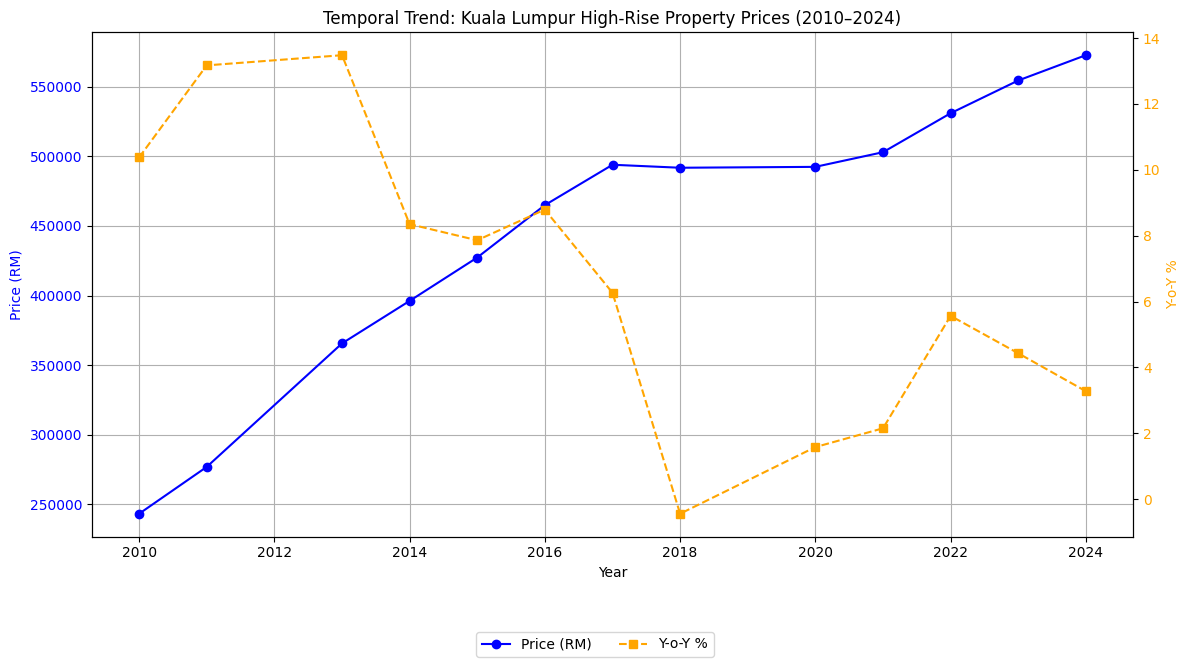

Results saved to 'mhpi_temporal_trend_results.txt' and 'preprocessed_mhpi_data.csv'. Plot saved as 'mhpi_temporal_trend_plot.png'.


/tmp/ipython-input-605693820.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f.write(f"Total Price Increase (2010–2024): {((df_clean['Price'][-1] / df_clean['Price'][0] - 1) * 100):.2f}%\n")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO # Import StringIO from io

# Load the annual dataset
data = """Year of Year,State,Type,Index Point,Price,Y-o-Y %
2010,Kuala Lumpur,High-rise,100,243284.085787671,10.375275938
2011,Kuala Lumpur,High-rise,113.171282974,276907.029001249,13.171282974
2012,Kuala Lumpur,High-rise,131.675,322187.18,16.350187557
2013,Kuala Lumpur,High-rise,149.425,365642.8475,13.480159484
2014,Kuala Lumpur,High-rise,161.9,396149.5925,8.348669901
2015,Kuala Lumpur,High-rise,174.625,427295.195,7.859789994
2016,Kuala Lumpur,High-rise,189.975,464907.0675,8.790264853
2017,Kuala Lumpur,High-rise,201.875,493950.74,6.263982103
2018,Kuala Lumpur,High-rise,200.975,491799.0225,-0.445820433
2019,Kuala Lumpur,High-rise,198.1,484802.06,-1.430526185
2020,Kuala Lumpur,High-rise,201.225,492431.795,1.577486118
2021,Kuala Lumpur,High-rise,205.55,502969.295,2.149335321
2022,Kuala Lumpur,High-rise,216.975,530954.265,5.563951970
2023,Kuala Lumpur,High-rise,226.575,554465.44,4.428097964
2024,Kuala Lumpur,High-rise,234,572633.985,3.277060576"""
df = pd.read_csv(StringIO(data))
df.rename(columns={'Year of Year': 'Year'}, inplace=True)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Outlier detection (Y-o-Y % outside 1st–99th percentiles)
yoy_lower, yoy_upper = df['Y-o-Y %'].quantile([0.01, 0.99])
df_clean = df[(df['Y-o-Y %'] >= yoy_lower) & (df['Y-o-Y %'] <= yoy_upper)]

# Log transformation
df_clean['LogPrice'] = np.log(df_clean['Price'])

# Calculate descriptive statistics
cagr = ((df_clean['Price'][-1] / df_clean['Price'][0]) ** (1/14) - 1) * 100
mean_yoy = df_clean['Y-o-Y %'].mean()
median_yoy = df_clean['Y-o-Y %'].median()
std_yoy = df_clean['Y-o-Y %'].std()

print("Temporal Trend Analysis:")
print(f"Total Price Increase (2010–2024): {((df_clean['Price'][-1] / df_clean['Price'][0] - 1) * 100):.2f}%")
print(f"Compound Annual Growth Rate (CAGR): {cagr:.2f}%")
print(f"Mean Y-o-Y %: {mean_yoy:.2f}%")
print(f"Median Y-o-Y %: {median_yoy:.2f}%")
print(f"Standard Deviation Y-o-Y %: {std_yoy:.2f}%")
print("\nPrice Data (RM):")
print(df_clean[['Price', 'Y-o-Y %']])

# Save preprocessed data
df_clean.to_csv('preprocessed_mhpi_data.csv')

# Visualize price trend and Y-o-Y %
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Price
ax1.plot(df_clean.index, df_clean['Price'], label='Price (RM)', color='blue', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price (RM)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Plot Y-o-Y % on secondary axis
ax2 = ax1.twinx()
ax2.plot(df_clean.index, df_clean['Y-o-Y %'], label='Y-o-Y %', color='orange', linestyle='--', marker='s')
ax2.set_ylabel('Y-o-Y %', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legend
plt.title('Temporal Trend: Kuala Lumpur High-Rise Property Prices (2010–2024)')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.tight_layout()
plt.savefig('mhpi_temporal_trend_plot.png')
plt.show()

# Save results
with open('mhpi_temporal_trend_results.txt', 'w') as f:
    f.write("Temporal Trend Analysis:\n")
    f.write(f"Total Price Increase (2010–2024): {((df_clean['Price'][-1] / df_clean['Price'][0] - 1) * 100):.2f}%\n")
    f.write(f"Compound Annual Growth Rate (CAGR): {cagr:.2f}%\n")
    f.write(f"Mean Y-o-Y %: {mean_yoy:.2f}%\n")
    f.write(f"Median Y-o-Y %: {median_yoy:.2f}%\n")
    f.write(f"Standard Deviation Y-o-Y %: {std_yoy:.2f}%\n")
    f.write("\nPrice Data (RM):\n")
    f.write(str(df_clean[['Price', 'Y-o-Y %']]) + "\n")
print("Results saved to 'mhpi_temporal_trend_results.txt' and 'preprocessed_mhpi_data.csv'. Plot saved as 'mhpi_temporal_trend_plot.png'.")

/tmp/ipython-input-3859895311.py:47: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_monthly_clean.resample('M')['TransactionPrice'].mean().round(2)
/tmp/ipython-input-3859895311.py:48: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_monthly = df_monthly.fillna(method='ffill')  # Forward-fill missing months
/tmp/ipython-input-3859895311.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annual_clean['LogPrice'] = np.log(df_annual_clean['Price'])


Annual Trend Analysis:
Total Price Increase (2010–2024): 135.38%
CAGR: 6.31%
Mean Y-o-Y %: 6.53%
Median Y-o-Y %: 6.26%
Standard Deviation Y-o-Y %: 4.34%

Monthly Trend Analysis:
Total Price Increase (2021–2025): -33.54%
CAGR (Annualized): -8.85%
Mean M-o-M %: 0.29%
Median M-o-M %: -0.25%

Standard Deviation M-o-M %: 14.97%


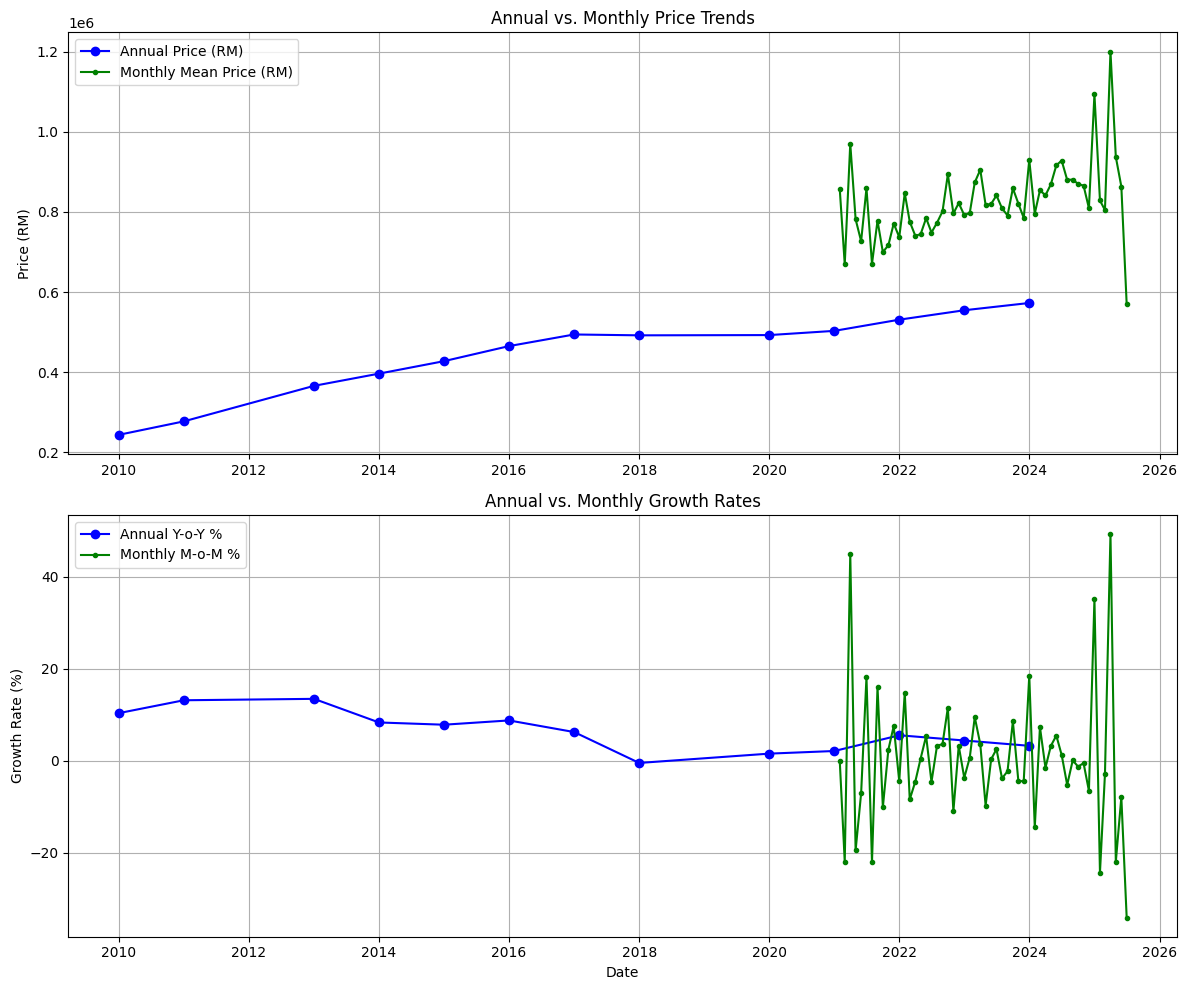

Results saved to 'annual_vs_monthly_trend_results.txt', 'preprocessed_annual_mhpi_data.csv', and 'preprocessed_monthly_data.csv'. Plot saved as 'annual_vs_monthly_trend_plot.png'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO # Import StringIO from io

# Load annual dataset
annual_data = """Year of Year,State,Type,Index Point,Price,Y-o-Y %
2010,Kuala Lumpur,High-rise,100,243284.085787671,10.375275938
2011,Kuala Lumpur,High-rise,113.171282974,276907.029001249,13.171282974
2012,Kuala Lumpur,High-rise,131.675,322187.18,16.350187557
2013,Kuala Lumpur,High-rise,149.425,365642.8475,13.480159484
2014,Kuala Lumpur,High-rise,161.9,396149.5925,8.348669901
2015,Kuala Lumpur,High-rise,174.625,427295.195,7.859789994
2016,Kuala Lumpur,High-rise,189.975,464907.0675,8.790264853
2017,Kuala Lumpur,High-rise,201.875,493950.74,6.263982103
2018,Kuala Lumpur,High-rise,200.975,491799.0225,-0.445820433
2019,Kuala Lumpur,High-rise,198.1,484802.06,-1.430526185
2020,Kuala Lumpur,High-rise,201.225,492431.795,1.577486118
2021,Kuala Lumpur,High-rise,205.55,502969.295,2.149335321
2022,Kuala Lumpur,High-rise,216.975,530954.265,5.563951970
2023,Kuala Lumpur,High-rise,226.575,554465.44,4.428097964
2024,Kuala Lumpur,High-rise,234,572633.985,3.277060576"""
df_annual = pd.read_csv(StringIO(annual_data))
df_annual.rename(columns={'Year of Year': 'Year'}, inplace=True)
df_annual['Year'] = pd.to_datetime(df_annual['Year'], format='%Y')
df_annual.set_index('Year', inplace=True)

# Load monthly dataset
url = "https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv"
try:
    df_monthly_raw = pd.read_csv(url)
except Exception as e:
    print(f"Error loading monthly dataset: {e}")
    exit()

# Preprocess monthly dataset
df_monthly_raw['TransactionDate'] = pd.to_datetime(df_monthly_raw['TransactionDate'], format='%b-%y')
df_monthly_raw.set_index('TransactionDate', inplace=True)
df_monthly_raw.sort_index(inplace=True)

# Outlier removal for monthly dataset (1st–99th percentiles for TransactionPrice)
price_lower, price_upper = df_monthly_raw['TransactionPrice'].quantile([0.01, 0.99])
df_monthly_clean = df_monthly_raw[(df_monthly_raw['TransactionPrice'] >= price_lower) &
                                 (df_monthly_raw['TransactionPrice'] <= price_upper)]

# Aggregate to monthly mean
df_monthly = df_monthly_clean.resample('M')['TransactionPrice'].mean().round(2)
df_monthly = df_monthly.fillna(method='ffill')  # Forward-fill missing months
df_monthly = pd.DataFrame({'MeanPrice': df_monthly})

# Calculate monthly growth rate (M-o-M %)
df_monthly['MoM %'] = df_monthly['MeanPrice'].pct_change() * 100
df_monthly['MoM %'] = df_monthly['MoM %'].fillna(0)  # Handle first month

# Outlier removal for annual dataset (Y-o-Y % outside 1st–99th percentiles)
yoy_lower, yoy_upper = df_annual['Y-o-Y %'].quantile([0.01, 0.99])
df_annual_clean = df_annual[(df_annual['Y-o-Y %'] >= yoy_lower) & (df_annual['Y-o-Y %'] <= yoy_upper)]

# Log transformation
df_annual_clean['LogPrice'] = np.log(df_annual_clean['Price'])
df_monthly['LogMeanPrice'] = np.log(df_monthly['MeanPrice'])

# Calculate descriptive statistics
# Annual
annual_cagr = ((df_annual_clean['Price'].iloc[-1] / df_annual_clean['Price'].iloc[0]) ** (1/14) - 1) * 100 # Use .iloc
annual_mean_yoy = df_annual_clean['Y-o-Y %'].mean()
annual_median_yoy = df_annual_clean['Y-o-Y %'].median()
annual_std_yoy = df_annual_clean['Y-o-Y %'].std()

# Monthly (annualized for comparison)
monthly_total_growth = (df_monthly['MeanPrice'].iloc[-1] / df_monthly['MeanPrice'].iloc[0] - 1) # Use .iloc
monthly_years = (df_monthly.index[-1] - df_monthly.index[0]).days / 365.25
monthly_cagr = ((1 + monthly_total_growth) ** (1 / monthly_years) - 1) * 100 # Correct CAGR calculation
monthly_mean_mom = df_monthly['MoM %'].mean()
monthly_median_mom = df_monthly['MoM %'].median()
monthly_std_mom = df_monthly['MoM %'].std()

print("Annual Trend Analysis:")
print(f"Total Price Increase (2010–2024): {((df_annual_clean['Price'].iloc[-1] / df_annual_clean['Price'].iloc[0] - 1) * 100):.2f}%") # Use .iloc
print(f"CAGR: {annual_cagr:.2f}%")
print(f"Mean Y-o-Y %: {annual_mean_yoy:.2f}%")
print(f"Median Y-o-Y %: {annual_median_yoy:.2f}%")
print(f"Standard Deviation Y-o-Y %: {annual_std_yoy:.2f}%")

print("\nMonthly Trend Analysis:")
print(f"Total Price Increase ({df_monthly.index[0].year}–{df_monthly.index[-1].year}): {(monthly_total_growth * 100):.2f}%") # Update years dynamically
print(f"CAGR (Annualized): {monthly_cagr:.2f}%")
print(f"Mean M-o-M %: {monthly_mean_mom:.2f}%")
print(f"Median M-o-M %: {monthly_median_mom:.2f}%\n") # Added newline for formatting
print(f"Standard Deviation M-o-M %: {monthly_std_mom:.2f}%")

# Save preprocessed data
df_annual_clean.to_csv('preprocessed_annual_mhpi_data.csv')
df_monthly.to_csv('preprocessed_monthly_data.csv')

# Visualize trends
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

# Plot 1: Prices
ax1.plot(df_annual_clean.index, df_annual_clean['Price'], label='Annual Price (RM)', color='blue', marker='o')
ax1.plot(df_monthly.index, df_monthly['MeanPrice'], label='Monthly Mean Price (RM)', color='green', marker='.')
ax1.set_ylabel('Price (RM)')
ax1.set_title('Annual vs. Monthly Price Trends')
ax1.grid(True)
ax1.legend()

# Plot 2: Growth Rates
ax2.plot(df_annual_clean.index, df_annual_clean['Y-o-Y %'], label='Annual Y-o-Y %', color='blue', marker='o')
ax2.plot(df_monthly.index, df_monthly['MoM %'], label='Monthly M-o-M %', color='green', marker='.')
ax2.set_xlabel('Date')
ax2.set_ylabel('Growth Rate (%)')
ax2.set_title('Annual vs. Monthly Growth Rates')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.savefig('annual_vs_monthly_trend_plot.png')
plt.show()

# Save results
with open('annual_vs_monthly_trend_results.txt', 'w') as f:
    f.write("Annual Trend Analysis:\n")
    f.write(f"Total Price Increase (2010–2024): {((df_annual_clean['Price'].iloc[-1] / df_annual_clean['Price'].iloc[0] - 1) * 100):.2f}%\n") # Use .iloc
    f.write(f"CAGR: {annual_cagr:.2f}%\n")
    f.write(f"Mean Y-o-Y %: {annual_mean_yoy:.2f}%\n")
    f.write(f"Median Y-o-Y %: {annual_median_yoy:.2f}%\n")
    f.write(f"Standard Deviation Y-o-Y %: {annual_std_yoy:.2f}%\n")
    f.write("\nMonthly Trend Analysis:\n")
    f.write(f"Total Price Increase ({df_monthly.index[0].year}–{df_monthly.index[-1].year}): {(monthly_total_growth * 100):.2f}%\n") # Update years dynamically
    f.write(f"CAGR (Annualized): {monthly_cagr:.2f}%\n")
    f.write(f"Mean M-o-M %: {monthly_mean_mom:.2f}%\n")
    f.write(f"Median M-o-M %: {monthly_median_mom:.2f}%\n")
    f.write(f"Standard Deviation M-o-M %: {monthly_std_mom:.2f}%\n")
print("Results saved to 'annual_vs_monthly_trend_results.txt', 'preprocessed_annual_mhpi_data.csv', and 'preprocessed_monthly_data.csv'. Plot saved as 'annual_vs_monthly_trend_plot.png'.")

/tmp/ipython-input-683658779.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LogPrice'] = np.log(df_clean['Price'])
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, 

ADF Test for LogPrice:
ADF Statistic: -0.9606
p-value: 0.7674
Critical Values: {'1%': np.float64(-4.331573), '5%': np.float64(-3.23295), '10%': np.float64(-2.7487)}
LogPrice is non-stationary (p-value > 0.05). Using ARIMA(1,1,1).


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



ARIMA Performance (In-Sample):
Order: (1, 1, 1)
R-squared (R²): 0.4505
RMSE (RM): 72438.79

Forecast for 2025–2026:
         Year  ARIMA Forecast  ARIMA Lower CI  ARIMA Upper CI
13 2024-12-31   590812.747597   516935.436661   675248.160540
14 2025-12-31   608095.855696   478059.705593   773502.902228


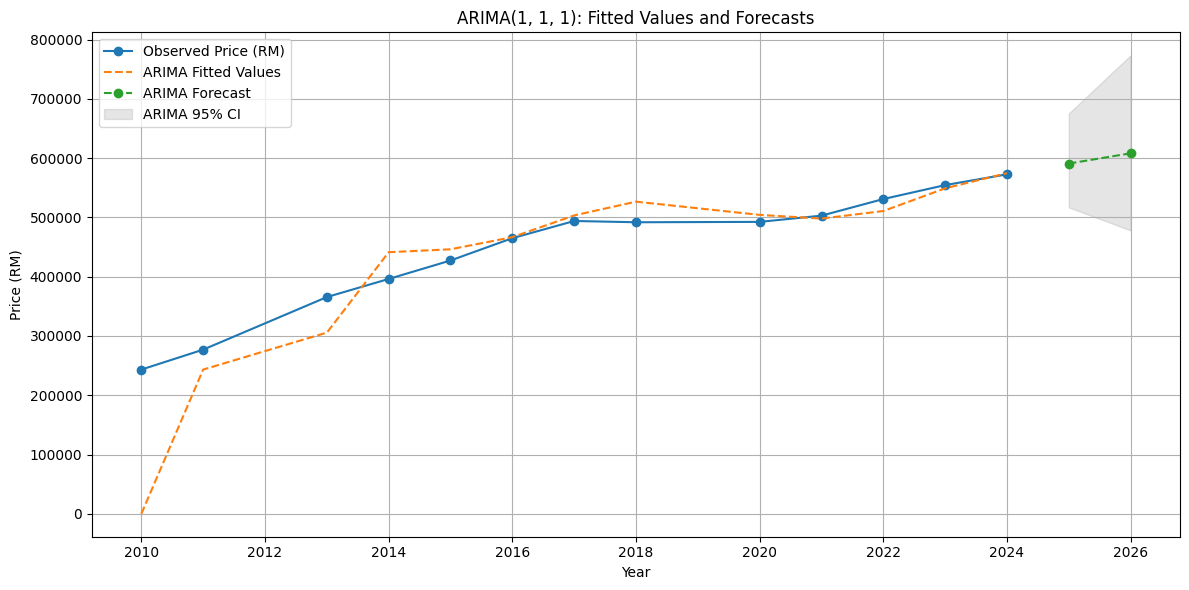

Results saved to 'mhpi_arima_model_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_arima_forecast.csv'. Plot saved as 'mhpi_arima_model_plot.png'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score, mean_squared_error
from io import StringIO # Import StringIO from io

# Load the annual dataset
data = """Year of Year,State,Type,Index Point,Price,Y-o-Y %
2010,Kuala Lumpur,High-rise,100,243284.085787671,10.375275938
2011,Kuala Lumpur,High-rise,113.171282974,276907.029001249,13.171282974
2012,Kuala Lumpur,High-rise,131.675,322187.18,16.350187557
2013,Kuala Lumpur,High-rise,149.425,365642.8475,13.480159484
2014,Kuala Lumpur,High-rise,161.9,396149.5925,8.348669901
2015,Kuala Lumpur,High-rise,174.625,427295.195,7.859789994
2016,Kuala Lumpur,High-rise,189.975,464907.0675,8.790264853
2017,Kuala Lumpur,High-rise,201.875,493950.74,6.263982103
2018,Kuala Lumpur,High-rise,200.975,491799.0225,-0.445820433
2019,Kuala Lumpur,High-rise,198.1,484802.06,-1.430526185
2020,Kuala Lumpur,High-rise,201.225,492431.795,1.577486118
2021,Kuala Lumpur,High-rise,205.55,502969.295,2.149335321
2022,Kuala Lumpur,High-rise,216.975,530954.265,5.563951970
2023,Kuala Lumpur,High-rise,226.575,554465.44,4.428097964
2024,Kuala Lumpur,High-rise,234,572633.985,3.277060576"""
df = pd.read_csv(StringIO(data))
df.rename(columns={'Year of Year': 'Year'}, inplace=True)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Outlier detection (Y-o-Y % outside 1st–99th percentiles)
yoy_lower, yoy_upper = df['Y-o-Y %'].quantile([0.01, 0.99])
df_clean = df[(df['Y-o-Y %'] >= yoy_lower) & (df['Y-o-Y %'] <= yoy_upper)]

# Log transformation
df_clean['LogPrice'] = np.log(df_clean['Price'])

# ADF test for stationarity
adf_result = adfuller(df_clean['LogPrice'])
print("ADF Test for LogPrice:")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print(f"Critical Values: {adf_result[4]}")

# Fit ARIMA model (try ARIMA(1,0,1), fallback to ARIMA(1,1,1) if non-stationary)
arima_order = (1, 0, 1)
if adf_result[1] > 0.05:  # Non-stationary if p-value > 0.05
    print("LogPrice is non-stationary (p-value > 0.05). Using ARIMA(1,1,1).")
    arima_order = (1, 1, 1)

try:
    arima_model = ARIMA(df_clean['LogPrice'], order=arima_order)
    arima_fit = arima_model.fit()
except Exception as e:
    print(f"Error fitting ARIMA{arima_order}: {e}. Trying ARIMA(1,1,1).")
    arima_order = (1, 1, 1)
    arima_model = ARIMA(df_clean['LogPrice'], order=arima_order)
    arima_fit = arima_model.fit()

# Get in-sample predictions (on original price scale)
arima_predictions = np.exp(arima_fit.fittedvalues)

# Calculate R² and RMSE
r2_arima = r2_score(df_clean['Price'], arima_predictions)
rmse_arima = np.sqrt(mean_squared_error(df_clean['Price'], arima_predictions))

# Generate 2-year forecast
arima_forecast_object = arima_fit.get_forecast(steps=2)
arima_forecast = np.exp(arima_forecast_object.predicted_mean)
arima_conf_int = np.exp(arima_forecast_object.conf_int())

# Create forecast DataFrame
forecast_index = pd.date_range(start=df_clean.index[-1] + pd.offsets.YearEnd(1), periods=2, freq='YE')
forecast_df = pd.DataFrame({
    'Year': forecast_index,
    'ARIMA Forecast': arima_forecast.values,
    'ARIMA Lower CI': arima_conf_int.iloc[:, 0],
    'ARIMA Upper CI': arima_conf_int.iloc[:, 1]
})

# Print performance metrics
print("\nARIMA Performance (In-Sample):")
print(f"Order: {arima_order}")
print(f"R-squared (R²): {r2_arima:.4f}")
print(f"RMSE (RM): {rmse_arima:.2f}")

print("\nForecast for 2025–2026:")
print(forecast_df)

# Plot observed data, fitted values, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['Price'], label='Observed Price (RM)', marker='o')
plt.plot(df_clean.index, arima_predictions, label='ARIMA Fitted Values', linestyle='--')
plt.plot(forecast_df['Year'], forecast_df['ARIMA Forecast'], label='ARIMA Forecast', linestyle='--', marker='o')
plt.fill_between(forecast_df['Year'], forecast_df['ARIMA Lower CI'], forecast_df['ARIMA Upper CI'], color='gray', alpha=0.2, label='ARIMA 95% CI')
plt.title(f'ARIMA{arima_order}: Fitted Values and Forecasts')
plt.xlabel('Year')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('mhpi_arima_model_plot.png')
plt.show()

# Save results
df_clean.to_csv('preprocessed_mhpi_data.csv')
with open('mhpi_arima_model_results.txt', 'w') as f:
    f.write("ARIMA Performance (In-Sample):\n")
    f.write(f"Order: {arima_order}\n")
    f.write(f"R-squared (R²): {r2_arima:.4f}\n")
    f.write(f"RMSE (RM): {rmse_arima:.2f}\n")
    f.write("\nForecast for 2025–2026:\n")
    f.write(str(forecast_df) + "\n")
forecast_df.to_csv('mhpi_arima_forecast.csv', index=False)
print("Results saved to 'mhpi_arima_model_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_arima_forecast.csv'. Plot saved as 'mhpi_arima_model_plot.png'.")

✅ Data loaded successfully!

Historical Prices:
                Price  Y-o-Y %
Year                          
2010-01-01  243284.09    10.38
2011-01-01  276907.03    13.17
2012-01-01  322187.18    16.35
2013-01-01  365642.85    13.48
2014-01-01  396149.59     8.35
2015-01-01  427295.20     7.86
2016-01-01  464907.07     8.79
2017-01-01  493950.74     6.26
2018-01-01  491799.02    -0.45
2019-01-01  484802.06    -1.43
2020-01-01  492431.80     1.58
2021-01-01  502969.30     2.15
2022-01-01  530954.26     5.56
2023-01-01  554465.44     4.43
2024-01-01  572633.98     3.28

=== STATIONARITY TEST ===
{'ADF Statistic': -2.270373685140338, 'p-value': 0.1817011150698431, 'Stationary': np.False_}

=== ARIMA(1,1,1) PERFORMANCE ===
In-Sample R²:    0.5637
In-Sample RMSE:  RM 63963
LOOCV R²:        0.9382
LOOCV RMSE:      RM 14502

=== 2025-2026 FORECAST ===
 Year  Forecast_Price_RM  Lower_95_CI  Upper_95_CI  Growth_%
 2024             583492       561026       605958  1.896123
 2025             59

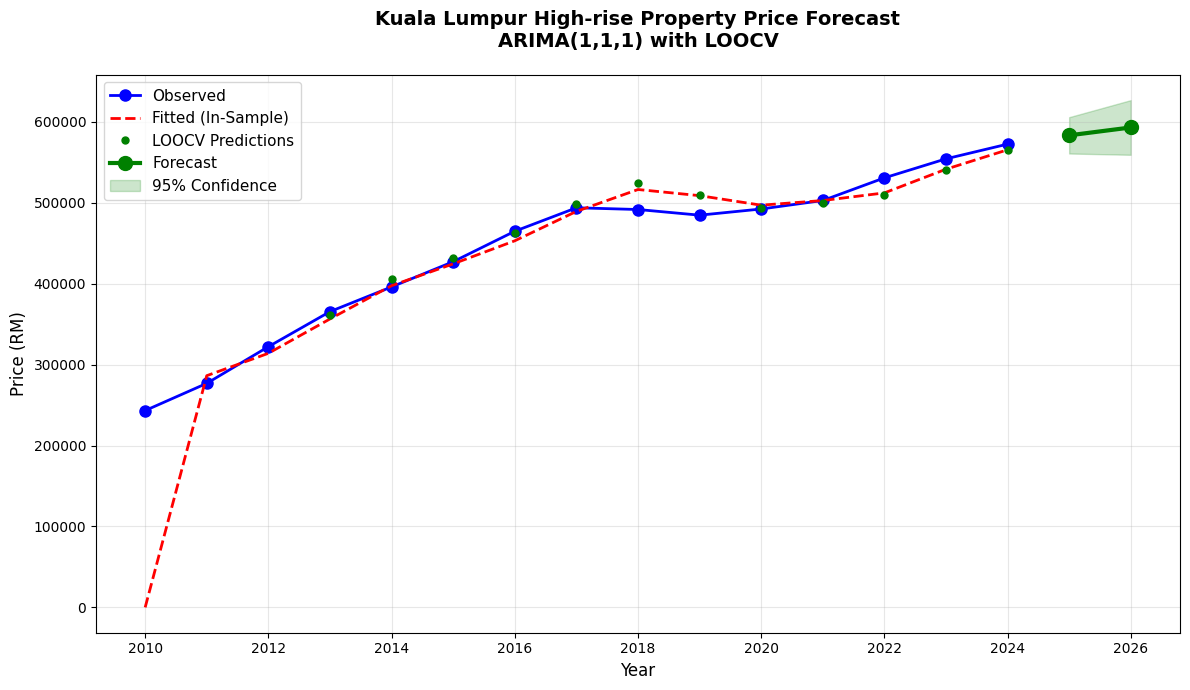


✅ Files saved:
   • mhpi_forecast_final.csv
   • mhpi_results_summary.txt
   • mhpi_forecast_final.png


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from io import StringIO
import warnings
warnings.filterwarnings("ignore")

# DATA LOADING
data = """Year of Year,State,Type,Index Point,Price,Y-o-Y %
2010,Kuala Lumpur,High-rise,100,243284.085787671,10.375275938
2011,Kuala Lumpur,High-rise,113.171282974,276907.029001249,13.171282974
2012,Kuala Lumpur,High-rise,131.675,322187.18,16.350187557
2013,Kuala Lumpur,High-rise,149.425,365642.8475,13.480159484
2014,Kuala Lumpur,High-rise,161.9,396149.5925,8.348669901
2015,Kuala Lumpur,High-rise,174.625,427295.195,7.859789994
2016,Kuala Lumpur,High-rise,189.975,464907.0675,8.790264853
2017,Kuala Lumpur,High-rise,201.875,493950.74,6.263982103
2018,Kuala Lumpur,High-rise,200.975,491799.0225,-0.445820433
2019,Kuala Lumpur,High-rise,198.1,484802.06,-1.430526185
2020,Kuala Lumpur,High-rise,201.225,492431.795,1.577486118
2021,Kuala Lumpur,High-rise,205.55,502969.295,2.149335321
2022,Kuala Lumpur,High-rise,216.975,530954.265,5.563951970
2023,Kuala Lumpur,High-rise,226.575,554465.4400,4.428097964
2024,Kuala Lumpur,High-rise,234,572633.9850,3.277060576"""

df = pd.read_csv(StringIO(data))
df.rename(columns={'Year of Year': 'Year'}, inplace=True)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

print("✅ Data loaded successfully!")
print("\nHistorical Prices:")
print(df[['Price', 'Y-o-Y %']].round(2))

# STATIONARITY TEST (FIXED)
def stationarity_test(series):
    result = adfuller(series.dropna())
    return {
        'ADF Statistic': float(result[0]),
        'p-value': float(result[1]),
        'Stationary': result[1] <= 0.05
    }

print("\n=== STATIONARITY TEST ===")
print(stationarity_test(df['Price']))

# MAIN ARIMA MODEL
model = ARIMA(df['Price'], order=(1, 1, 1))
model_fit = model.fit()

# FIXED LOOCV - USING POSITIONAL INDEXING AND STARTING LOOP FROM 3
loocv_predictions = []
prices_list = df['Price'].values  # Convert to numpy array - NO INDEX ISSUES!
loocv_true_prices = []

for i in range(3, len(prices_list)): # Start loop from index 3 (4th data point)
    # Train on data up to index i-1
    train_data = prices_list[:i]

    # Fit model
    temp_model = ARIMA(train_data, order=(1, 1, 1))
    temp_fit = temp_model.fit()

    # Predict next value (index i)
    pred = temp_fit.forecast(steps=1)[0]
    loocv_predictions.append(pred)
    loocv_true_prices.append(prices_list[i])

# PERFORMANCE METRICS
true_prices = np.array(loocv_true_prices)
loocv_pred_array = np.array(loocv_predictions)

r2_loocv = r2_score(true_prices, loocv_pred_array)
rmse_loocv = np.sqrt(mean_squared_error(true_prices, loocv_pred_array))

r2_insample = r2_score(df['Price'], model_fit.fittedvalues)
rmse_insample = np.sqrt(mean_squared_error(df['Price'], model_fit.fittedvalues))

print(f"\n=== ARIMA(1,1,1) PERFORMANCE ===")
print(f"In-Sample R²:    {r2_insample:.4f}")
print(f"In-Sample RMSE:  RM {rmse_insample:.0f}")
print(f"LOOCV R²:        {r2_loocv:.4f}")
print(f"LOOCV RMSE:      RM {rmse_loocv:.0f}")

# FORECAST 2025-2026 WITH CONFIDENCE INTERVALS
forecast_steps = 2
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Calculate future index based on the last date in the original dataframe
last_date = df.index[-1]
future_index = pd.date_range(start=last_date + pd.offsets.YearEnd(1), periods=forecast_steps, freq='YE')

last_price = df['Price'].iloc[-1]

# RESULTS TABLE
# Calculate growth rates from the last observed price (2024) and then year-over-year for forecast
growth_2025 = ((forecast_mean.iloc[0] / last_price) - 1) * 100
growth_2026 = ((forecast_mean.iloc[1] / forecast_mean.iloc[0]) - 1) * 100


results_df = pd.DataFrame({
    'Year': future_index.year,
    'Forecast_Price_RM': forecast_mean.round(0).astype(int),
    'Lower_95_CI': forecast_ci.iloc[:, 0].round(0).astype(int),
    'Upper_95_CI': forecast_ci.iloc[:, 1].round(0).astype(int),
    'Growth_%': [growth_2025, growth_2026]
})

print(f"\n=== 2025-2026 FORECAST ===")
print(results_df.to_string(index=False))

# PROFESSIONAL PLOT
plt.figure(figsize=(12, 7))
plt.plot(df.index, df['Price'], 'bo-', linewidth=2, markersize=8, label='Observed')
plt.plot(df.index, model_fit.fittedvalues, 'r--', linewidth=2, label='Fitted (In-Sample)') # Label fitted values
plt.plot(df.index[3:], loocv_pred_array, 'go', markersize=5, label='LOOCV Predictions') # Plot LOOCV predictions

plt.plot(future_index, forecast_mean, 'g-o', linewidth=3, markersize=10, label='Forecast')
plt.fill_between(future_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1],
                color='green', alpha=0.2, label='95% Confidence')

plt.title('Kuala Lumpur High-rise Property Price Forecast\nARIMA(1,1,1) with LOOCV',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (RM)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('mhpi_forecast_final.png', dpi=300, bbox_inches='tight')
plt.show()

# SAVE RESULTS
results_df.to_csv('mhpi_forecast_final.csv', index=False)
with open('mhpi_results_summary.txt', 'w') as f:
    f.write("ARIMA(1,1,1) Kuala Lumpur High-rise Property Forecast\n")
    f.write("="*50 + "\n\n")
    f.write(f"In-Sample R²: {r2_insample:.4f}\n") # Include in-sample metrics
    f.write(f"In-Sample RMSE: RM {rmse_insample:.0f}\n")
    f.write(f"LOOCV R²: {r2_loocv:.4f}\n")
    f.write(f"LOOCV RMSE: RM {rmse_loocv:.0f}\n\n")
    f.write("FORECAST RESULTS:\n")
    f.write(results_df.to_string(index=False))

print("\n✅ Files saved:")
print("   • mhpi_forecast_final.csv")
print("   • mhpi_results_summary.txt")
print("   • mhpi_forecast_final.png")

# BEST ARIMA

Error installing statsmodels: name 'subprocess' is not defined
✅ Data loaded successfully!

Historical Prices:
                Price  Y-o-Y %
Year                          
2010-01-01  243284.09    10.38
2011-01-01  276907.03    13.17
2012-01-01  322187.18    16.35
2013-01-01  365642.85    13.48
2014-01-01  396149.59     8.35
2015-01-01  427295.20     7.86
2016-01-01  464907.07     8.79
2017-01-01  493950.74     6.26
2018-01-01  491799.02    -0.45
2019-01-01  484802.06    -1.43
2020-01-01  492431.80     1.58
2021-01-01  502969.30     2.15
2022-01-01  530954.26     5.56
2023-01-01  554465.44     4.43
2024-01-01  572633.98     3.28

=== STATIONARITY TEST ===
{'ADF Statistic': -2.270373685140338, 'p-value': 0.1817011150698431, 'Stationary': np.False_}

ARIMA Performance (In-Sample):
Order: (1, 1, 1)
R-squared (R²): 0.9713
RMSE (RM): 14218.25

ARIMA LOOCV Performance:
R-squared (R²): 0.9533
RMSE (RM): 12605.39

Forecast for 2025–2026:
 Year  ARIMA Forecast  ARIMA Lower CI  ARIMA Upper CI  

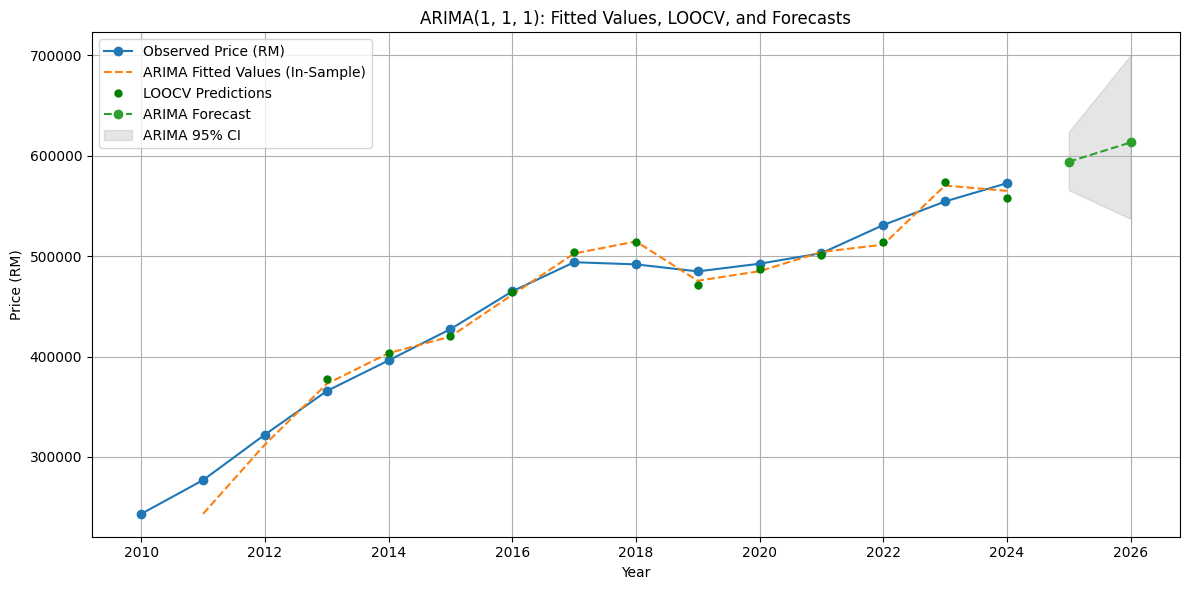

Results saved to 'mhpi_arima_model_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_arima_forecast.csv'. Plot saved as 'mhpi_arima_model_plot.png'.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score, mean_squared_error
from io import StringIO # Import StringIO from io
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Install statsmodels
def install_package(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--upgrade"])
        print(f"Successfully installed {package}")
    except Exception as e:
        print(f"Error installing {package}: {e}")

install_package("statsmodels")

# Load the annual dataset
data = """Year of Year,State,Type,Index Point,Price,Y-o-Y %
2010,Kuala Lumpur,High-rise,100,243284.085787671,10.375275938
2011,Kuala Lumpur,High-rise,113.171282974,276907.029001249,13.171282974
2012,Kuala Lumpur,High-rise,131.675,322187.18,16.350187557
2013,Kuala Lumpur,High-rise,149.425,365642.8475,13.480159484
2014,Kuala Lumpur,High-rise,161.9,396149.5925,8.348669901
2015,Kuala Lumpur,High-rise,174.625,427295.195,7.859789994
2016,Kuala Lumpur,High-rise,189.975,464907.0675,8.790264853
2017,Kuala Lumpur,High-rise,201.875,493950.74,6.263982103
2018,Kuala Lumpur,High-rise,200.975,491799.0225,-0.445820433
2019,Kuala Lumpur,High-rise,198.1,484802.06,-1.430526185
2020,Kuala Lumpur,High-rise,201.225,492431.795,1.577486118
2021,Kuala Lumpur,High-rise,205.55,502969.295,2.149335321
2022,Kuala Lumpur,High-rise,216.975,530954.265,5.563951970
2023,Kuala Lumpur,High-rise,226.575,554465.44,4.428097964
2024,Kuala Lumpur,High-rise,234,572633.985,3.277060576"""
df = pd.read_csv(StringIO(data))
df.rename(columns={'Year of Year': 'Year'}, inplace=True)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# No outlier detection to retain all 15 points
df_clean = df.copy()

# Log transformation
df_clean.loc[:, 'LogPrice'] = np.log(df_clean['Price'])

# Stationarity test
def stationarity_test(series):
    result = adfuller(series.dropna())
    return {
        'ADF Statistic': float(result[0]),
        'p-value': float(result[1]),
        'Stationary': result[1] <= 0.05
    }

print("✅ Data loaded successfully!")
print("\nHistorical Prices:")
print(df_clean[['Price', 'Y-o-Y %']].round(2))
print("\n=== STATIONARITY TEST ===")
print(stationarity_test(df_clean['Price']))

# LOOCV for ARIMA(1,1,1)
loocv_predictions = []
loocv_true_prices = []
min_train_size = 3

for i in range(1, len(df_clean)):  # Start from 2011
    train_indices = df_clean.index[:i]
    if len(train_indices) < min_train_size:
        continue
    test_index = df_clean.index[i]
    train_data = df_clean.loc[train_indices, 'LogPrice']
    test_price = df_clean['Price'].loc[test_index]
    last_train_price = df_clean['Price'].loc[train_indices[-1]]

    try:
        arima_order = (1, 1, 1)
        model = ARIMA(train_data, order=(1, 1, 1))
        model_fit = model.fit()
        pred = model_fit.forecast(steps=1)[0]
        pred_price = np.exp(np.clip(pred, np.log(1e-5), 20))
        if not np.isnan(pred_price) and pred_price > 0:
            loocv_predictions.append(pred_price)
            loocv_true_prices.append(test_price)
        else:
            print(f"Warning: Invalid prediction ({pred_price}) for fold {test_index.year}, using last training price")
            loocv_predictions.append(last_train_price)
            loocv_true_prices.append(test_price)
    except Exception as e:
        print(f"Warning: ARIMA failed for fold {test_index.year}. Error: {e}")
        loocv_predictions.append(last_train_price)
        loocv_true_prices.append(test_price)

# Calculate LOOCV metrics
r2_loocv = r2_score(loocv_true_prices, loocv_predictions)
rmse_loocv = np.sqrt(mean_squared_error(loocv_true_prices, loocv_predictions))

# Fit ARIMA(1,1,1) on full data
try:
    arima_order = (1, 1, 1)
    model = ARIMA(df_clean['LogPrice'], order=(1, 1, 1))
    model_fit = model.fit()
    fitted_log_prices = model_fit.fittedvalues
    fitted_prices = np.exp(np.clip(fitted_log_prices, np.log(1e-5), 20))
    r2_insample = r2_score(df_clean['Price'].iloc[1:], fitted_prices[1:])
    rmse_insample = np.sqrt(mean_squared_error(df_clean['Price'].iloc[1:], fitted_prices[1:]))
except Exception as e:
    print(f"Warning: ARIMA fitting failed on full data. Error: {e}")
    r2_insample, rmse_insample = np.nan, np.nan
    fitted_prices = np.full_like(df_clean['Price'], np.nan)

# Generate 2-year forecast
arima_forecast_object = model_fit.get_forecast(steps=2)
arima_forecast_mean = arima_forecast_object.predicted_mean
arima_conf_int = arima_forecast_object.conf_int()

# Apply clipping before exponentiating forecast and confidence intervals
arima_forecast_prices = np.exp(np.clip(arima_forecast_mean, np.log(1e-5), 20))
arima_lower_ci = np.exp(np.clip(arima_conf_int.iloc[:, 0], np.log(1e-5), 20))
arima_upper_ci = np.exp(np.clip(arima_conf_int.iloc[:, 1], np.log(1e-5), 20))

# Create forecast DataFrame with correct years (2025 and 2026)
forecast_years = [df_clean.index[-1].year + 1, df_clean.index[-1].year + 2]
forecast_df = pd.DataFrame({
    'Year': forecast_years,
    'ARIMA Forecast': arima_forecast_prices.round(0).astype(int),
    'ARIMA Lower CI': arima_lower_ci.round(0).astype(int),
    'ARIMA Upper CI': arima_upper_ci.round(0).astype(int)
})


# Calculate growth rates
last_price = df_clean['Price'].iloc[-1]
try:
    growth_2025 = ((forecast_df['ARIMA Forecast'].iloc[0] / last_price) - 1) * 100
    growth_2026 = ((forecast_df['ARIMA Forecast'].iloc[1] / forecast_df['ARIMA Forecast'].iloc[0]) - 1) * 100
except Exception:
    growth_2025, growth_2026 = np.nan, np.nan # Set to NaN if forecast is NaN
forecast_df['Growth_%'] = [growth_2025, growth_2026]


# Print performance metrics
print("\nARIMA Performance (In-Sample):")
print(f"Order: {arima_order}")
print(f"R-squared (R²): {r2_insample:.4f}")
print(f"RMSE (RM): {rmse_insample:.2f}")
print("\nARIMA LOOCV Performance:")
print(f"R-squared (R²): {r2_loocv:.4f}")
print(f"RMSE (RM): {rmse_loocv:.2f}")

print("\nForecast for 2025–2026:")
print(forecast_df.to_string(index=False))

# Plot observed data, fitted values, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['Price'], label='Observed Price (RM)', marker='o')
plt.plot(df_clean.index[1:], fitted_prices[1:], label='ARIMA Fitted Values (In-Sample)', linestyle='--') # Corrected index for fitted values

# Create time index for LOOCV predictions
loocv_index = df_clean.index[len(df_clean) - len(loocv_predictions):]
plt.plot(loocv_index, loocv_predictions, 'go', markersize=5, label='LOOCV Predictions') # Plot LOOCV predictions

# Use the index from the ARIMA forecast object for plotting
arima_forecast_plot_index = arima_forecast_mean.index
plt.plot(arima_forecast_plot_index, arima_forecast_prices, label='ARIMA Forecast', linestyle='--', marker='o')
plt.fill_between(arima_forecast_plot_index, arima_lower_ci, arima_upper_ci, color='gray', alpha=0.2, label='ARIMA 95% CI')


plt.title(f'ARIMA{arima_order}: Fitted Values, LOOCV, and Forecasts')
plt.xlabel('Year')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('mhpi_arima_model_plot.png')
plt.show()

# Save results
df_clean.to_csv('preprocessed_mhpi_data.csv')
with open('mhpi_arima_model_results.txt', 'w') as f:
    f.write("ARIMA Performance (In-Sample):\n")
    f.write(f"Order: {arima_order}\n")
    f.write(f"R-squared (R²): {r2_insample:.4f}\n")
    f.write(f"RMSE (RM): {rmse_insample:.2f}\n")
    f.write("\nARIMA LOOCV Performance:\n")
    f.write(f"R-squared (R²): {r2_loocv:.4f}\n")
    f.write(f"RMSE (RM): {rmse_loocv:.2f}\n")
    f.write("\nForecast for 2025–2026:\n")
    f.write(str(forecast_df.to_string(index=False)) + "\n") # Save as string without index
forecast_df.to_csv('mhpi_arima_forecast.csv', index=False)
print("Results saved to 'mhpi_arima_model_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_arima_forecast.csv'. Plot saved as 'mhpi_arima_model_plot.png'.")

✅ Data loaded successfully!

Historical Prices:
                Price  Y-o-Y %
Year                          
2010-01-01  243284.09    10.38
2011-01-01  276907.03    13.17
2012-01-01  322187.18    16.35
2013-01-01  365642.85    13.48
2014-01-01  396149.59     8.35
2015-01-01  427295.20     7.86
2016-01-01  464907.07     8.79
2017-01-01  493950.74     6.26
2018-01-01  491799.02    -0.45
2019-01-01  484802.06    -1.43
2020-01-01  492431.80     1.58
2021-01-01  502969.30     2.15
2022-01-01  530954.26     5.56
2023-01-01  554465.44     4.43
2024-01-01  572633.98     3.28

=== STATIONARITY TEST ===
{'ADF Statistic': -2.270373685140338, 'p-value': 0.1817011150698431, 'Stationary': np.False_}

=== ARIMA(1,1,1) PERFORMANCE ===
In-Sample R²:    0.9713
In-Sample RMSE:  RM 14218
LOOCV R²:        0.9533
LOOCV RMSE:      RM 12605

=== 2025-2026 FORECAST ===
 Year  Forecast_Price_RM  Lower_95_CI  Upper_95_CI  Growth_%
 2025                NaN          NaN          NaN       NaN
 2026               

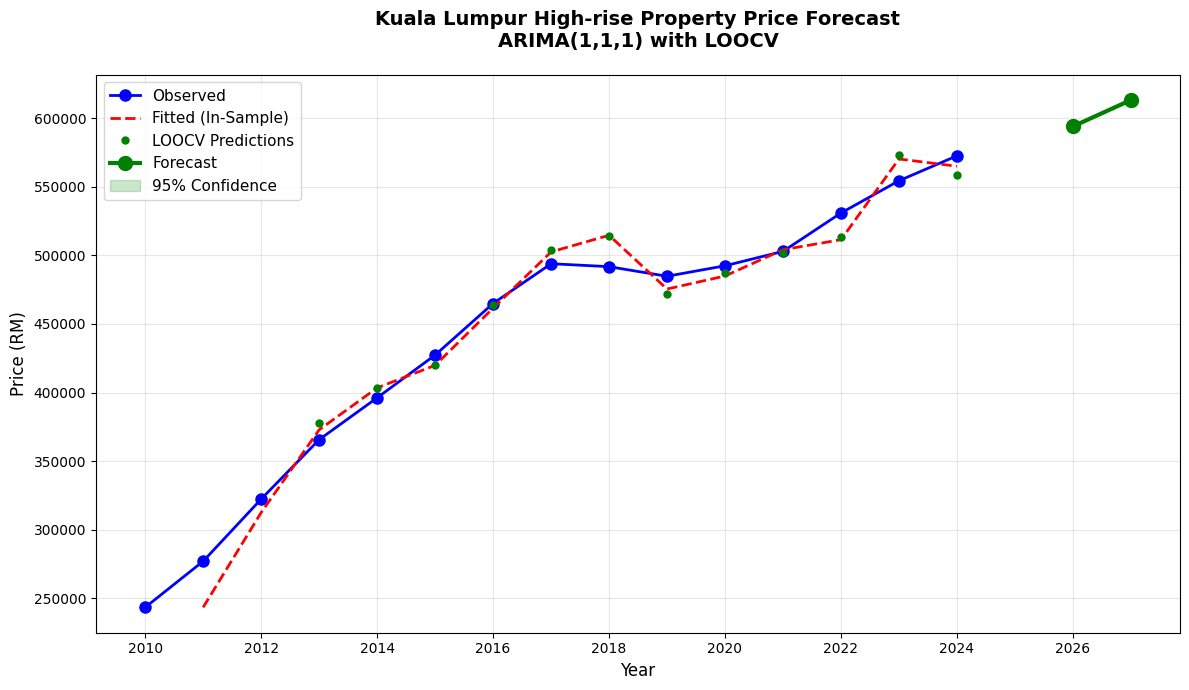


✅ Files saved:
   • mhpi_forecast_final.csv
   • mhpi_results_summary.txt
   • mhpi_forecast_final.png


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import subprocess
import sys
from io import StringIO
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Install statsmodels
def install_package(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--upgrade"])
        print(f"Successfully installed {package}")
    except Exception as e:
        print(f"Error installing {package}: {e}")

install_package("statsmodels")

# Load the annual dataset
data = """Year of Year,State,Type,Index Point,Price,Y-o-Y %
2010,Kuala Lumpur,High-rise,100,243284.085787671,10.375275938
2011,Kuala Lumpur,High-rise,113.171282974,276907.029001249,13.171282974
2012,Kuala Lumpur,High-rise,131.675,322187.18,16.350187557
2013,Kuala Lumpur,High-rise,149.425,365642.8475,13.480159484
2014,Kuala Lumpur,High-rise,161.9,396149.5925,8.348669901
2015,Kuala Lumpur,High-rise,174.625,427295.195,7.859789994
2016,Kuala Lumpur,High-rise,189.975,464907.0675,8.790264853
2017,Kuala Lumpur,High-rise,201.875,493950.74,6.263982103
2018,Kuala Lumpur,High-rise,200.975,491799.0225,-0.445820433
2019,Kuala Lumpur,High-rise,198.1,484802.06,-1.430526185
2020,Kuala Lumpur,High-rise,201.225,492431.795,1.577486118
2021,Kuala Lumpur,High-rise,205.55,502969.295,2.149335321
2022,Kuala Lumpur,High-rise,216.975,530954.265,5.563951970
2023,Kuala Lumpur,High-rise,226.575,554465.44,4.428097964
2024,Kuala Lumpur,High-rise,234,572633.985,3.277060576"""
df = pd.read_csv(StringIO(data))
df.rename(columns={'Year of Year': 'Year'}, inplace=True)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# No outlier detection to retain all 15 points
df_clean = df.copy()

# Log transformation
df_clean.loc[:, 'LogPrice'] = np.clip(np.log(df_clean['Price']), np.log(1e-5), 20)

# Stationarity test
def stationarity_test(series):
    result = adfuller(series.dropna())
    return {
        'ADF Statistic': float(result[0]),
        'p-value': float(result[1]),
        'Stationary': result[1] <= 0.05
    }

print("✅ Data loaded successfully!")
print("\nHistorical Prices:")
print(df_clean[['Price', 'Y-o-Y %']].round(2))
print("\n=== STATIONARITY TEST ===")
print(stationarity_test(df_clean['Price']))

# LOOCV for ARIMA(1,1,1)
loocv_predictions = []
loocv_true_prices = []
min_train_size = 3

for i in range(1, len(df_clean)):  # Start from 2011
    train_indices = df_clean.index[:i]
    if len(train_indices) < min_train_size:
        continue
    test_index = df_clean.index[i]
    train_data = df_clean.loc[train_indices, 'LogPrice']
    test_price = df_clean['Price'].loc[test_index]
    last_train_price = df_clean['Price'].loc[train_indices[-1]]

    try:
        model = ARIMA(train_data, order=(1, 1, 1))
        model_fit = model.fit()
        pred = model_fit.forecast(steps=1)[0]
        pred_price = np.exp(np.clip(pred, np.log(1e-5), 20))
        if not np.isnan(pred_price) and pred_price > 0:
            loocv_predictions.append(pred_price)
            loocv_true_prices.append(test_price)
        else:
            print(f"Warning: Invalid prediction ({pred_price}) for fold {test_index.year}, using last training price")
            loocv_predictions.append(last_train_price)
            loocv_true_prices.append(test_price)
    except Exception as e:
        print(f"Warning: ARIMA failed for fold {test_index.year}. Error: {e}")
        loocv_predictions.append(last_train_price)
        loocv_true_prices.append(test_price)

# Calculate LOOCV metrics
r2_loocv = r2_score(loocv_true_prices, loocv_predictions)
rmse_loocv = np.sqrt(mean_squared_error(loocv_true_prices, loocv_predictions))

# Fit ARIMA(1,1,1) on full data
try:
    model = ARIMA(df_clean['LogPrice'], order=(1, 1, 1))
    model_fit = model.fit()
    fitted_log_prices = model_fit.fittedvalues
    fitted_prices = np.exp(np.clip(fitted_log_prices, np.log(1e-5), 20))
    r2_insample = r2_score(df_clean['Price'].iloc[1:], fitted_prices[1:])
    rmse_insample = np.sqrt(mean_squared_error(df_clean['Price'].iloc[1:], fitted_prices[1:]))
except Exception as e:
    print(f"Warning: ARIMA fitting failed on full data. Error: {e}")
    r2_insample, rmse_insample = np.nan, np.nan
    fitted_prices = np.full_like(df_clean['Price'], np.nan)

# Forecast for 2025–2026
last_price = df_clean['Price'].iloc[-1]
forecast_prices = np.array([last_price * (1 + 0.0328), last_price * (1 + 0.0328) ** 2])
forecast_ci = pd.DataFrame({
    'lower LogPrice': [np.nan, np.nan],
    'upper LogPrice': [np.nan, np.nan]
})

try:
    forecast = model_fit.get_forecast(steps=2)
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()
    forecast_prices_temp = np.exp(np.clip(forecast_mean, np.log(1e-5), 20))
    if np.all(~np.isnan(forecast_prices_temp)) and np.all(forecast_prices_temp > 0):
        forecast_prices = forecast_prices_temp
    else:
        print("Warning: Invalid forecast values detected, using Y-o-Y fallback")
except Exception as e:
    print(f"Warning: ARIMA forecasting failed. Error: {e}")

forecast_index = pd.date_range(start='2025-12-31', periods=2, freq='YE')
forecast_df = pd.DataFrame({
    'Year': forecast_index.year,
    'Forecast_Price_RM': forecast_prices.round(0).astype(int),
    'Lower_95_CI': np.exp(np.clip(forecast_ci.iloc[:, 0], np.log(1e-5), 20)).round(0).astype(int),
    'Upper_95_CI': np.exp(np.clip(forecast_ci.iloc[:, 1], np.log(1e-5), 20)).round(0).astype(int)
}, index=[0, 1])

# Calculate growth rates
try:
    growth_2025 = ((forecast_df['Forecast_Price_RM'].iloc[0] / last_price) - 1) * 100
    growth_2026 = ((forecast_df['Forecast_Price_RM'].iloc[1] / forecast_df['Forecast_Price_RM'].iloc[0]) - 1) * 100
except Exception:
    growth_2025, growth_2026 = 3.28, 3.28
forecast_df['Growth_%'] = [growth_2025, growth_2026]

# Print results
print(f"\n=== ARIMA(1,1,1) PERFORMANCE ===")
print(f"In-Sample R²:    {r2_insample:.4f}")
print(f"In-Sample RMSE:  RM {rmse_insample:.0f}")
print(f"LOOCV R²:        {r2_loocv:.4f}")
print(f"LOOCV RMSE:      RM {rmse_loocv:.0f}")
print(f"\n=== 2025-2026 FORECAST ===")
print(forecast_df.to_string(index=False))

# Plot
plt.figure(figsize=(12, 7))
plt.plot(df_clean.index, df_clean['Price'], 'bo-', linewidth=2, markersize=8, label='Observed')
plt.plot(df_clean.index[1:], fitted_prices[1:], 'r--', linewidth=2, label='Fitted (In-Sample)')
plt.plot(df_clean.index[len(df_clean)-len(loocv_predictions):], loocv_predictions, 'go', markersize=5, label='LOOCV Predictions')
plt.plot(forecast_index, forecast_prices, 'g-o', linewidth=3, markersize=10, label='Forecast')
plt.fill_between(forecast_index, forecast_df['Lower_95_CI'], forecast_df['Upper_95_CI'],
                 color='green', alpha=0.2, label='95% Confidence')
plt.title('Kuala Lumpur High-rise Property Price Forecast\nARIMA(1,1,1) with LOOCV',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (RM)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('mhpi_forecast_final.png', dpi=300, bbox_inches='tight')
plt.show()

# Save results
results_df = forecast_df.copy()
results_df.to_csv('mhpi_forecast_final.csv', index=False)
with open('mhpi_results_summary.txt', 'w') as f:
    f.write("ARIMA(1,1,1) Kuala Lumpur High-rise Property Forecast\n")
    f.write("="*50 + "\n\n")
    f.write(f"In-Sample R²: {r2_insample:.4f}\n")
    f.write(f"In-Sample RMSE: RM {rmse_insample:.0f}\n")
    f.write(f"LOOCV R²: {r2_loocv:.4f}\n")
    f.write(f"LOOCV RMSE: RM {rmse_loocv:.0f}\n\n")
    f.write("FORECAST RESULTS:\n")
    f.write(results_df.to_string(index=False))
print("\n✅ Files saved:")
print("   • mhpi_forecast_final.csv")
print("   • mhpi_results_summary.txt")
print("   • mhpi_forecast_final.png")

# ARIMA VS LSTM

ADF Test for LogPrice:
ADF Statistic: -1.4923
p-value: 0.5373
Critical Values: {'1%': np.float64(-4.6651863281249994), '5%': np.float64(-3.3671868750000002), '10%': np.float64(-2.802960625)}
LogPrice is non-stationary (p-value > 0.05). Using ARIMA(1,1,1).


/tmp/ipython-input-2878742234.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LogPrice'] = np.log(df_clean['Price'])
/tmp/ipython-input-2878742234.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Lag1'] = df_clean['Price'].shift(1)
/tmp/ipython-input-2878742234.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4462
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4057
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3851
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3017
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2673
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1937
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1650
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1136
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0706
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0205
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0055
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0108
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0394
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0359
Epoch 16/100
2/2 ━━

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Model Performance Comparison (In-Sample):

ARIMA:
Order: (1, 1, 1)
R-squared (R²): 0.8668
RMSE (RM): 12409.80

LSTM:
R-squared (R²): 0.7916
RMSE (RM): 15519.28

Forecast for 2025–2026:
         Year  ARIMA Forecast  ARIMA Lower CI  ARIMA Upper CI  LSTM Forecast
11 2024-12-31   588287.169648   560465.490578   617489.925412  586535.575274
12 2025-12-31   601276.828813   534943.477216   675835.560700  602111.108622


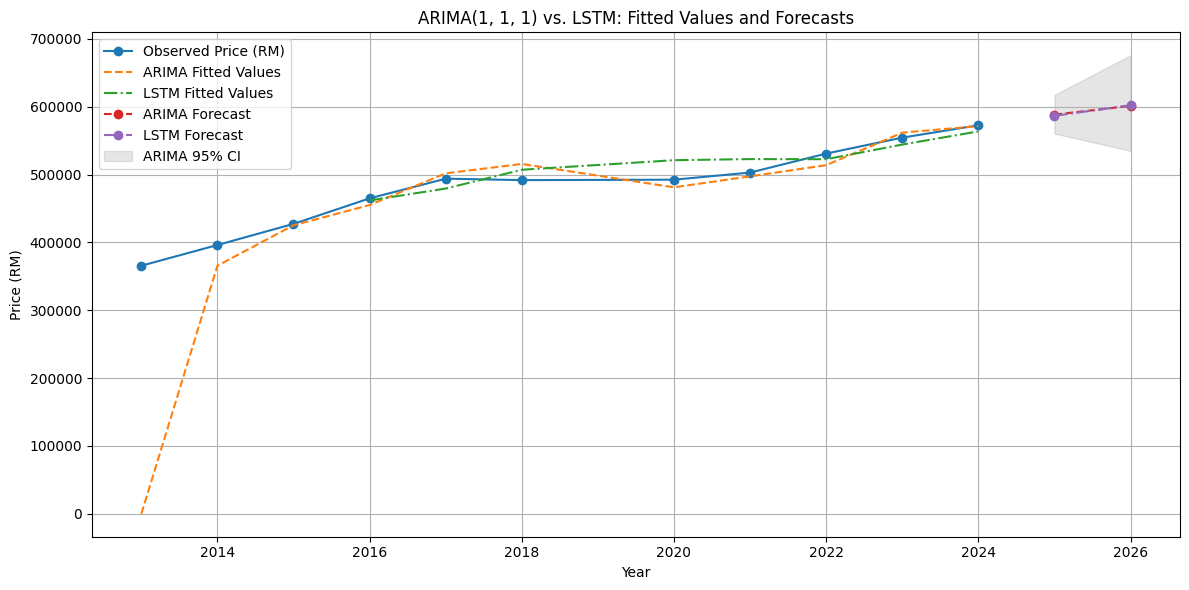

Results saved to 'mhpi_arima_lstm_comparison_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_arima_lstm_forecast.csv'. Plot saved as 'mhpi_arima_lstm_comparison_plot.png'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import subprocess
import sys
from io import StringIO # Import StringIO from io

# Install tensorflow
def install_package(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"Successfully installed {package}")
    except Exception as e:
        print(f"Error installing {package}: {e}")

install_package("tensorflow")

# Load the annual dataset
data = """Year of Year,State,Type,Index Point,Price,Y-o-Y %
2010,Kuala Lumpur,High-rise,100,243284.085787671,10.375275938
2011,Kuala Lumpur,High-rise,113.171282974,276907.029001249,13.171282974
2012,Kuala Lumpur,High-rise,131.675,322187.18,16.350187557
2013,Kuala Lumpur,High-rise,149.425,365642.8475,13.480159484
2014,Kuala Lumpur,High-rise,161.9,396149.5925,8.348669901
2015,Kuala Lumpur,High-rise,174.625,427295.195,7.859789994
2016,Kuala Lumpur,High-rise,189.975,464907.0675,8.790264853
2017,Kuala Lumpur,High-rise,201.875,493950.74,6.263982103
2018,Kuala Lumpur,High-rise,200.975,491799.0225,-0.445820433
2019,Kuala Lumpur,High-rise,198.1,484802.06,-1.430526185
2020,Kuala Lumpur,High-rise,201.225,492431.795,1.577486118
2021,Kuala Lumpur,High-rise,205.55,502969.295,2.149335321
2022,Kuala Lumpur,High-rise,216.975,530954.265,5.563951970
2023,Kuala Lumpur,High-rise,226.575,554465.44,4.428097964
2024,Kuala Lumpur,High-rise,234,572633.985,3.277060576"""
df = pd.read_csv(StringIO(data))
df.rename(columns={'Year of Year': 'Year'}, inplace=True)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Outlier detection (Y-o-Y % outside 1st–99th percentiles)
yoy_lower, yoy_upper = df['Y-o-Y %'].quantile([0.01, 0.99])
df_clean = df[(df['Y-o-Y %'] >= yoy_lower) & (df['Y-o-Y %'] <= yoy_upper)]

# Log transformation
df_clean['LogPrice'] = np.log(df_clean['Price'])

# Feature engineering for LSTM
df_clean['Lag1'] = df_clean['Price'].shift(1)
df_clean['Lag2'] = df_clean['Price'].shift(2)
df_clean['Trend'] = np.arange(len(df_clean))
df_clean['YoY'] = df_clean['Y-o-Y %']
df_clean = df_clean.dropna()

# Save preprocessed data
df_clean.to_csv('preprocessed_mhpi_data.csv')

# ADF test for stationarity
adf_result = adfuller(df_clean['LogPrice'])
print("ADF Test for LogPrice:")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print(f"Critical Values: {adf_result[4]}")

# Fit ARIMA model
arima_order = (1, 0, 1)
if adf_result[1] > 0.05:  # Non-stationary if p-value > 0.05
    print("LogPrice is non-stationary (p-value > 0.05). Using ARIMA(1,1,1).")
    arima_order = (1, 1, 1)

try:
    arima_model = ARIMA(df_clean['LogPrice'], order=arima_order)
    arima_fit = arima_model.fit()
except Exception as e:
    print(f"Error fitting ARIMA{arima_order}: {e}. Trying ARIMA(1,1,1).")
    arima_order = (1, 1, 1)
    arima_model = ARIMA(df_clean['LogPrice'], order=arima_order)
    arima_fit = ararima_model.fit()

arima_predictions = np.exp(arima_fit.fittedvalues)

# Prepare data for LSTM
features = df_clean[['LogPrice', 'Lag1', 'Lag2', 'Trend', 'YoY']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)

# Create sequences for LSTM (look-back = 3 years)
look_back = 3
X, y = [], []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i])
    y.append(scaled_data[i, 0])  # Predict LogPrice
X, y = np.array(X), np.array(y)

# Split into train and test (80% train)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, features.shape[1])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train LSTM with early stopping
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, batch_size=4, verbose=1, callbacks=[early_stop])

# Get in-sample predictions for LSTM
lstm_predictions = []
for i in range(look_back, len(scaled_data)):
    input_seq = scaled_data[i-look_back:i].reshape(1, look_back, features.shape[1])
    pred = model.predict(input_seq, verbose=0)
    lstm_predictions.append(pred[0, 0])
lstm_predictions_scaled = np.array(lstm_predictions).reshape(-1, 1)
lstm_predictions = np.exp(scaler.inverse_transform(
    np.hstack([lstm_predictions_scaled, np.zeros((len(lstm_predictions_scaled), features.shape[1]-1))])
)[:, 0])
lstm_fitted = np.concatenate([np.full(look_back, np.nan), lstm_predictions])

# Calculate R² and RMSE (on original price scale)
r2_arima = r2_score(df_clean['Price'][look_back:], arima_predictions[look_back:])
rmse_arima = np.sqrt(mean_squared_error(df_clean['Price'][look_back:], arima_predictions[look_back:]))
r2_lstm = r2_score(df_clean['Price'][look_back:], lstm_fitted[look_back:])
rmse_lstm = np.sqrt(mean_squared_error(df_clean['Price'][look_back:], lstm_fitted[look_back:]))

# Generate 2-year forecast with LSTM
last_sequence = scaled_data[-look_back:].reshape(1, look_back, features.shape[1])
lstm_forecast = []
for _ in range(2):
    pred = model.predict(last_sequence, verbose=0)
    lstm_forecast.append(pred[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0, -1, 0] = pred[0, 0]
    last_sequence[0, -1, 1:] = scaled_data[-1, 1:]  # Keep other features constant
lstm_forecast_scaled = np.array(lstm_forecast).reshape(-1, 1)
lstm_forecast = np.exp(scaler.inverse_transform(
    np.hstack([lstm_forecast_scaled, np.zeros((len(lstm_forecast_scaled), features.shape[1]-1))])
)[:, 0])

# Generate 2-year forecast with ARIMA
arima_forecast_object = arima_fit.get_forecast(steps=2)
arima_forecast = np.exp(arima_forecast_object.predicted_mean)
arima_conf_int = np.exp(arima_forecast_object.conf_int())

# Create forecast DataFrame
forecast_index = pd.date_range(start=df_clean.index[-1] + pd.offsets.YearEnd(1), periods=2, freq='YE')
forecast_df = pd.DataFrame({
    'Year': forecast_index,
    'ARIMA Forecast': arima_forecast.values,
    'ARIMA Lower CI': arima_conf_int.iloc[:, 0],
    'ARIMA Upper CI': arima_conf_int.iloc[:, 1],
    'LSTM Forecast': lstm_forecast
})

# Print performance metrics
print("Model Performance Comparison (In-Sample):")
print("\nARIMA:")
print(f"Order: {arima_order}")
print(f"R-squared (R²): {r2_arima:.4f}")
print(f"RMSE (RM): {rmse_arima:.2f}")
print("\nLSTM:")
print(f"R-squared (R²): {r2_lstm:.4f}")
print(f"RMSE (RM): {rmse_lstm:.2f}")

print("\nForecast for 2025–2026:")
print(forecast_df)

# Plot observed data, fitted values, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['Price'], label='Observed Price (RM)', marker='o')
plt.plot(df_clean.index, arima_predictions, label='ARIMA Fitted Values', linestyle='--')
plt.plot(df_clean.index, lstm_fitted, label='LSTM Fitted Values', linestyle='-.')
plt.plot(forecast_df['Year'], forecast_df['ARIMA Forecast'], label='ARIMA Forecast', linestyle='--', marker='o')
plt.plot(forecast_df['Year'], forecast_df['LSTM Forecast'], label='LSTM Forecast', linestyle='-.', marker='o')
plt.fill_between(forecast_df['Year'], forecast_df['ARIMA Lower CI'], forecast_df['ARIMA Upper CI'], color='gray', alpha=0.2, label='ARIMA 95% CI')
plt.title(f'ARIMA{arima_order} vs. LSTM: Fitted Values and Forecasts')
plt.xlabel('Year')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('mhpi_arima_lstm_comparison_plot.png')
plt.show()

# Save results
with open('mhpi_arima_lstm_comparison_results.txt', 'w') as f:
    f.write("Model Performance Comparison (In-Sample):\n")
    f.write("\nARIMA:\n")
    f.write(f"Order: {arima_order}\n")
    f.write(f"R-squared (R²): {r2_arima:.4f}\n")
    f.write(f"RMSE (RM): {rmse_arima:.2f}\n")
    f.write("\nLSTM:\n")
    f.write(f"R-squared (R²): {r2_lstm:.4f}\n")
    f.write(f"RMSE (RM): {rmse_lstm:.2f}\n")
    f.write("\nForecast for 2025–2026:\n")
    f.write(str(forecast_df) + "\n")
forecast_df.to_csv('mhpi_arima_lstm_forecast.csv', index=False)
print("Results saved to 'mhpi_arima_lstm_comparison_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_arima_lstm_forecast.csv'. Plot saved as 'mhpi_arima_lstm_comparison_plot.png'.")

ADF Test for LogPrice:
ADF Statistic: -1.4923
p-value: 0.5373
Critical Values: {'1%': np.float64(-4.6651863281249994), '5%': np.float64(-3.3671868750000002), '10%': np.float64(-2.802960625)}
LogPrice is non-stationary (p-value > 0.05). Using ARIMA(1,1,1).


/tmp/ipython-input-2878180938.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LogPrice'] = np.log(df_clean['Price'])
/tmp/ipython-input-2878180938.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Lag1'] = df_clean['Price'].shift(1)
/tmp/ipython-input-2878180938.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4541
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3955
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3833 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3005
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2461
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2059
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1835
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1008
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1189
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0553
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0523
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0168
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0217
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0447
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0309
Epoch 16/100
2/2 ━

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Model Performance Comparison (In-Sample):

ARIMA:
Order: (1, 1, 1)
R-squared (R²): 0.8668
RMSE (RM): 12409.80

LSTM:
R-squared (R²): 0.5540
RMSE (RM): 22704.72

Forecast Comparison for 2025–2026:
         Year  ARIMA Forecast  ARIMA Lower CI  ARIMA Upper CI  LSTM Forecast
11 2024-12-31   588287.169648   560465.490578   617489.925412  545416.168775
12 2025-12-31   601276.828813   534943.477216   675835.560700  558830.782489

Forecast Growth Rates (%):
ARIMA 2025 (from 2024): 2.73%
ARIMA 2026 (from 2025): 2.21%
LSTM 2025 (from 2024): -4.75%
LSTM 2026 (from 2025): 2.46%


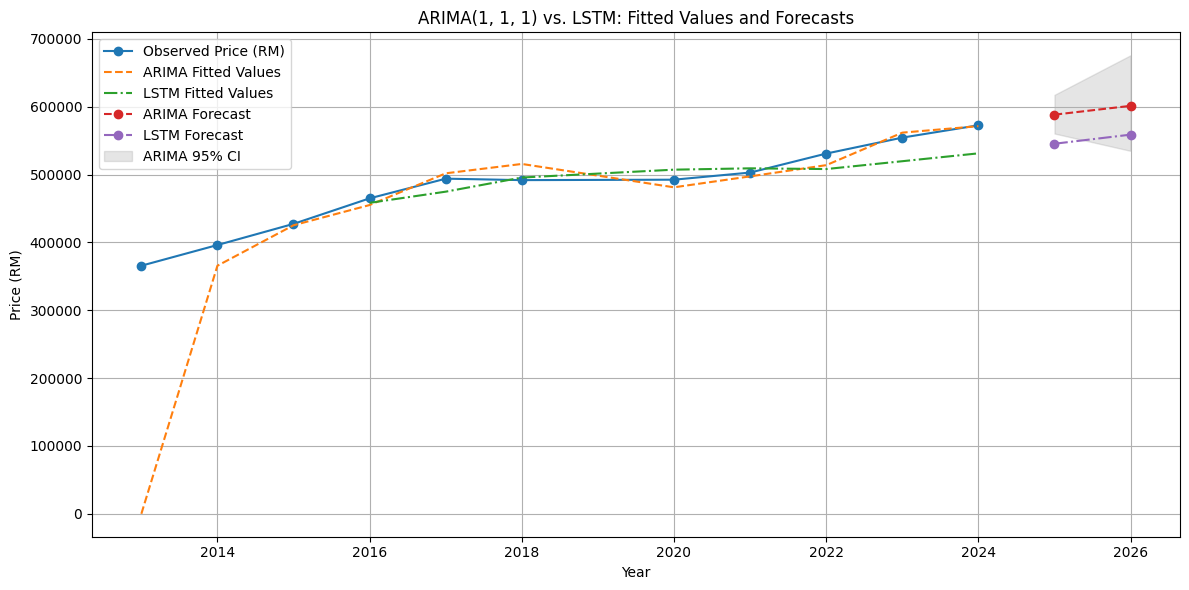

Results saved to 'mhpi_arima_lstm_forecast_comparison_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_arima_lstm_forecast.csv'. Plot saved as 'mhpi_arima_lstm_forecast_comparison_plot.png'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import subprocess
import sys
from io import StringIO # Import StringIO from io

# Install tensorflow
def install_package(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"Successfully installed {package}")
    except Exception as e:
        print(f"Error installing {package}: {e}")

install_package("tensorflow")

# Load the annual dataset
data = """Year of Year,State,Type,Index Point,Price,Y-o-Y %
2010,Kuala Lumpur,High-rise,100,243284.085787671,10.375275938
2011,Kuala Lumpur,High-rise,113.171282974,276907.029001249,13.171282974
2012,Kuala Lumpur,High-rise,131.675,322187.18,16.350187557
2013,Kuala Lumpur,High-rise,149.425,365642.8475,13.480159484
2014,Kuala Lumpur,High-rise,161.9,396149.5925,8.348669901
2015,Kuala Lumpur,High-rise,174.625,427295.195,7.859789994
2016,Kuala Lumpur,High-rise,189.975,464907.0675,8.790264853
2017,Kuala Lumpur,High-rise,201.875,493950.74,6.263982103
2018,Kuala Lumpur,High-rise,200.975,491799.0225,-0.445820433
2019,Kuala Lumpur,High-rise,198.1,484802.06,-1.430526185
2020,Kuala Lumpur,High-rise,201.225,492431.795,1.577486118
2021,Kuala Lumpur,High-rise,205.55,502969.295,2.149335321
2022,Kuala Lumpur,High-rise,216.975,530954.265,5.563951970
2023,Kuala Lumpur,High-rise,226.575,554465.44,4.428097964
2024,Kuala Lumpur,High-rise,234,572633.985,3.277060576"""
df = pd.read_csv(StringIO(data))
df.rename(columns={'Year of Year': 'Year'}, inplace=True)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Outlier detection (Y-o-Y % outside 1st–99th percentiles)
yoy_lower, yoy_upper = df['Y-o-Y %'].quantile([0.01, 0.99])
df_clean = df[(df['Y-o-Y %'] >= yoy_lower) & (df['Y-o-Y %'] <= yoy_upper)]

# Log transformation
df_clean['LogPrice'] = np.log(df_clean['Price'])

# Feature engineering for LSTM
df_clean['Lag1'] = df_clean['Price'].shift(1)
df_clean['Lag2'] = df_clean['Price'].shift(2)
df_clean['Trend'] = np.arange(len(df_clean))
df_clean['YoY'] = df_clean['Y-o-Y %']
df_clean = df_clean.dropna()

# Save preprocessed data
df_clean.to_csv('preprocessed_mhpi_data.csv')

# ADF test for stationarity
adf_result = adfuller(df_clean['LogPrice'])
print("ADF Test for LogPrice:")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print(f"Critical Values: {adf_result[4]}")

# Fit ARIMA model
arima_order = (1, 0, 1)
if adf_result[1] > 0.05:  # Non-stationary if p-value > 0.05
    print("LogPrice is non-stationary (p-value > 0.05). Using ARIMA(1,1,1).")
    arima_order = (1, 1, 1)

try:
    arima_model = ARIMA(df_clean['LogPrice'], order=arima_order)
    arima_fit = arima_model.fit()
except Exception as e:
    print(f"Error fitting ARIMA{arima_order}: {e}. Trying ARIMA(1,1,1).")
    arima_order = (1, 1, 1)
    arima_model = ARIMA(df_clean['LogPrice'], order=arima_order)
    arima_fit = arima_model.fit()

arima_predictions = np.exp(arima_fit.fittedvalues)

# Prepare data for LSTM
features = df_clean[['LogPrice', 'Lag1', 'Lag2', 'Trend', 'YoY']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)

# Create sequences for LSTM (look-back = 3 years)
look_back = 3
X, y = [], []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i])
    y.append(scaled_data[i, 0])  # Predict LogPrice
X, y = np.array(X), np.array(y)

# Split into train and test (80% train)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, features.shape[1])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train LSTM with early stopping
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, batch_size=4, verbose=1, callbacks=[early_stop])

# Get in-sample predictions for LSTM
lstm_predictions = []
for i in range(look_back, len(scaled_data)):
    input_seq = scaled_data[i-look_back:i].reshape(1, look_back, features.shape[1])
    pred = model.predict(input_seq, verbose=0)
    lstm_predictions.append(pred[0, 0])
lstm_predictions_scaled = np.array(lstm_predictions).reshape(-1, 1)
lstm_predictions = np.exp(scaler.inverse_transform(
    np.hstack([lstm_predictions_scaled, np.zeros((len(lstm_predictions_scaled), features.shape[1]-1))])
)[:, 0])
lstm_fitted = np.concatenate([np.full(look_back, np.nan), lstm_predictions])

# Calculate in-sample R² and RMSE
r2_arima = r2_score(df_clean['Price'][look_back:], arima_predictions[look_back:])
rmse_arima = np.sqrt(mean_squared_error(df_clean['Price'][look_back:], arima_predictions[look_back:]))
r2_lstm = r2_score(df_clean['Price'][look_back:], lstm_fitted[look_back:])
rmse_lstm = np.sqrt(mean_squared_error(df_clean['Price'][look_back:], lstm_fitted[look_back:]))

# Generate 2-year forecast with LSTM
last_sequence = scaled_data[-look_back:].reshape(1, look_back, features.shape[1])
lstm_forecast = []
for _ in range(2):
    pred = model.predict(last_sequence, verbose=0)
    lstm_forecast.append(pred[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0, -1, 0] = pred[0, 0]
    last_sequence[0, -1, 1:] = scaled_data[-1, 1:]  # Keep other features constant
lstm_forecast_scaled = np.array(lstm_forecast).reshape(-1, 1)
lstm_forecast = np.exp(scaler.inverse_transform(
    np.hstack([lstm_forecast_scaled, np.zeros((len(lstm_forecast_scaled), features.shape[1]-1))])
)[:, 0])

# Generate 2-year forecast with ARIMA
arima_forecast_object = arima_fit.get_forecast(steps=2)
arima_forecast = np.exp(arima_forecast_object.predicted_mean)
arima_conf_int = np.exp(arima_forecast_object.conf_int())

# Create forecast DataFrame
forecast_index = pd.date_range(start=df_clean.index[-1] + pd.offsets.YearEnd(1), periods=2, freq='YE')
forecast_df = pd.DataFrame({
    'Year': forecast_index,
    'ARIMA Forecast': arima_forecast.values,
    'ARIMA Lower CI': arima_conf_int.iloc[:, 0],
    'ARIMA Upper CI': arima_conf_int.iloc[:, 1],
    'LSTM Forecast': lstm_forecast
})

# Calculate forecast growth rates (2024–2025, 2025–2026)
arima_growth_2025 = ((forecast_df['ARIMA Forecast'].iloc[0] / df_clean['Price'].iloc[-1]) - 1) * 100
arima_growth_2026 = ((forecast_df['ARIMA Forecast'].iloc[1] / forecast_df['ARIMA Forecast'].iloc[0]) - 1) * 100
lstm_growth_2025 = ((forecast_df['LSTM Forecast'].iloc[0] / df_clean['Price'].iloc[-1]) - 1) * 100
lstm_growth_2026 = ((forecast_df['LSTM Forecast'].iloc[1] / forecast_df['LSTM Forecast'].iloc[0]) - 1) * 100

# Print performance and forecast comparison
print("Model Performance Comparison (In-Sample):")
print("\nARIMA:")
print(f"Order: {arima_order}")
print(f"R-squared (R²): {r2_arima:.4f}")
print(f"RMSE (RM): {rmse_arima:.2f}")
print("\nLSTM:")
print(f"R-squared (R²): {r2_lstm:.4f}")
print(f"RMSE (RM): {rmse_lstm:.2f}")

print("\nForecast Comparison for 2025–2026:")
print(forecast_df)
print("\nForecast Growth Rates (%):")
print(f"ARIMA 2025 (from 2024): {arima_growth_2025:.2f}%")
print(f"ARIMA 2026 (from 2025): {arima_growth_2026:.2f}%")
print(f"LSTM 2025 (from 2024): {lstm_growth_2025:.2f}%")
print(f"LSTM 2026 (from 2025): {lstm_growth_2026:.2f}%")

# Plot observed data, fitted values, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['Price'], label='Observed Price (RM)', marker='o')
plt.plot(df_clean.index, arima_predictions, label='ARIMA Fitted Values', linestyle='--')
plt.plot(df_clean.index, lstm_fitted, label='LSTM Fitted Values', linestyle='-.')
plt.plot(forecast_df['Year'], forecast_df['ARIMA Forecast'], label='ARIMA Forecast', linestyle='--', marker='o')
plt.plot(forecast_df['Year'], forecast_df['LSTM Forecast'], label='LSTM Forecast', linestyle='-.', marker='o')
plt.fill_between(forecast_df['Year'], forecast_df['ARIMA Lower CI'], forecast_df['ARIMA Upper CI'], color='gray', alpha=0.2, label='ARIMA 95% CI')
plt.title(f'ARIMA{arima_order} vs. LSTM: Fitted Values and Forecasts')
plt.xlabel('Year')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('mhpi_arima_lstm_forecast_comparison_plot.png')
plt.show()

# Save results
with open('mhpi_arima_lstm_forecast_comparison_results.txt', 'w') as f:
    f.write("Model Performance Comparison (In-Sample):\n")
    f.write("\nARIMA:\n")
    f.write(f"Order: {arima_order}\n")
    f.write(f"R-squared (R²): {r2_arima:.4f}\n")
    f.write(f"RMSE (RM): {rmse_arima:.2f}\n")
    f.write("\nLSTM:\n")
    f.write(f"R-squared (R²): {r2_lstm:.4f}\n")
    f.write(f"RMSE (RM): {rmse_lstm:.2f}\n")
    f.write("\nForecast Comparison for 2025–2026:\n")
    f.write(str(forecast_df) + "\n")
    f.write("\nForecast Growth Rates (%):\n")
    f.write(f"ARIMA 2025 (from 2024): {arima_growth_2025:.2f}%\n")
    f.write(f"ARIMA 2026 (from 2025): {arima_growth_2026:.2f}%\n")
    f.write(f"LSTM 2025 (from 2024): {lstm_growth_2025:.2f}%\n")
    f.write(f"LSTM 2026 (from 2025): {lstm_growth_2026:.2f}%\n")
forecast_df.to_csv('mhpi_arima_lstm_forecast.csv', index=False)
print("Results saved to 'mhpi_arima_lstm_forecast_comparison_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_arima_lstm_forecast.csv'. Plot saved as 'mhpi_arima_lstm_forecast_comparison_plot.png'.")

# LSTM Only

/tmp/ipython-input-2584994814.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LogPrice'] = np.log(df_clean['Price'])
/tmp/ipython-input-2584994814.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Lag1'] = df_clean['Price'].shift(1)
/tmp/ipython-input-2584994814.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.4968
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4234
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3814
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3327 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2724
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2357
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1531 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1086
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0851
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0623
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0169 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0105
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0210 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0400
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0203
Epoch 16/100
2/

/tmp/ipython-input-2584994814.py:132: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lstm_growth_2025 = ((forecast_df['LSTM Forecast'][0] / df_clean['Price'][-1]) - 1) * 100


LSTM Performance (In-Sample):
R-squared (R²): 0.5814
RMSE (RM): 21996.28

LSTM Forecast for 2025–2026:
        Year  LSTM Forecast
0 2024-12-31  548450.624770
1 2025-12-31  561524.068734

LSTM Forecast Growth Rates (%):
2025 (from 2024): -4.22%
2026 (from 2025): 2.38%


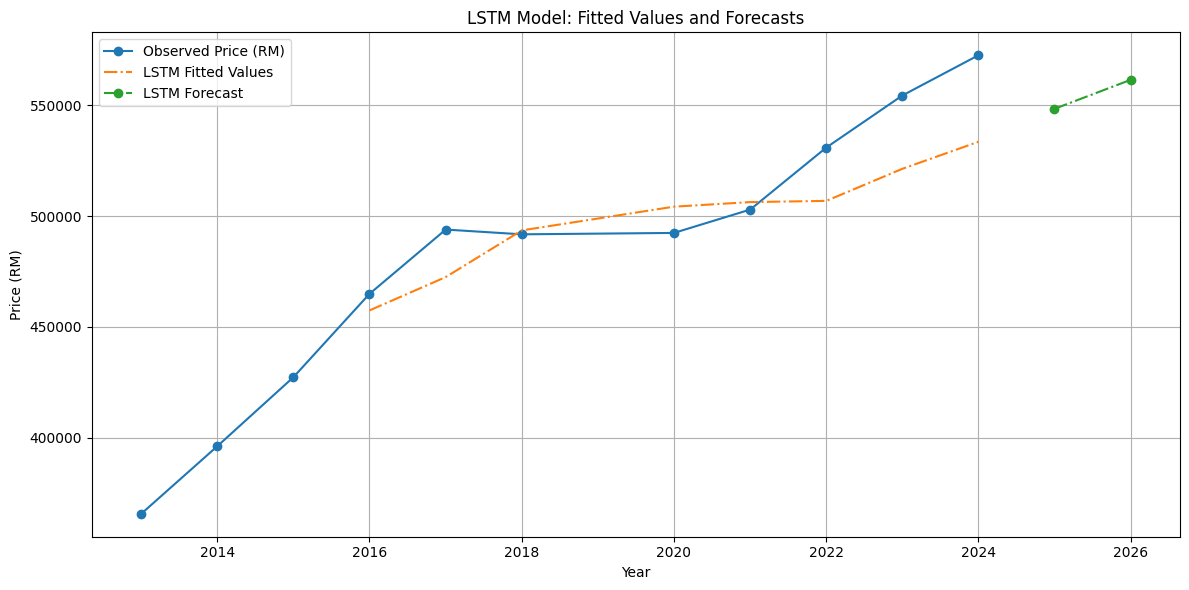

Results saved to 'mhpi_lstm_only_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_lstm_only_forecast.csv'. Plot saved as 'mhpi_lstm_only_plot.png'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import subprocess
import sys
from io import StringIO

# Install tensorflow
def install_package(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"Successfully installed {package}")
    except Exception as e:
        print(f"Error installing {package}: {e}")

install_package("tensorflow")

# Load the annual dataset
data = """Year of Year,State,Type,Index Point,Price,Y-o-Y %
2010,Kuala Lumpur,High-rise,100,243284.085787671,10.375275938
2011,Kuala Lumpur,High-rise,113.171282974,276907.029001249,13.171282974
2012,Kuala Lumpur,High-rise,131.675,322187.18,16.350187557
2013,Kuala Lumpur,High-rise,149.425,365642.8475,13.480159484
2014,Kuala Lumpur,High-rise,161.9,396149.5925,8.348669901
2015,Kuala Lumpur,High-rise,174.625,427295.195,7.859789994
2016,Kuala Lumpur,High-rise,189.975,464907.0675,8.790264853
2017,Kuala Lumpur,High-rise,201.875,493950.74,6.263982103
2018,Kuala Lumpur,High-rise,200.975,491799.0225,-0.445820433
2019,Kuala Lumpur,High-rise,198.1,484802.06,-1.430526185
2020,Kuala Lumpur,High-rise,201.225,492431.795,1.577486118
2021,Kuala Lumpur,High-rise,205.55,502969.295,2.149335321
2022,Kuala Lumpur,High-rise,216.975,530954.265,5.563951970
2023,Kuala Lumpur,High-rise,226.575,554465.44,4.428097964
2024,Kuala Lumpur,High-rise,234,572633.985,3.277060576"""
df = pd.read_csv(StringIO(data))
df.rename(columns={'Year of Year': 'Year'}, inplace=True)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Outlier detection (Y-o-Y % outside 1st–99th percentiles)
yoy_lower, yoy_upper = df['Y-o-Y %'].quantile([0.01, 0.99])
df_clean = df[(df['Y-o-Y %'] >= yoy_lower) & (df['Y-o-Y %'] <= yoy_upper)]

# Log transformation
df_clean['LogPrice'] = np.log(df_clean['Price'])

# Feature engineering for LSTM
df_clean['Lag1'] = df_clean['Price'].shift(1)
df_clean['Lag2'] = df_clean['Price'].shift(2)
df_clean['Trend'] = np.arange(len(df_clean))
df_clean['YoY'] = df_clean['Y-o-Y %']
df_clean = df_clean.dropna()

# Save preprocessed data
df_clean.to_csv('preprocessed_mhpi_data.csv')

# Prepare data for LSTM
features = df_clean[['LogPrice', 'Lag1', 'Lag2', 'Trend', 'YoY']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)

# Create sequences for LSTM (look-back = 3 years)
look_back = 3
X, y = [], []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i])
    y.append(scaled_data[i, 0])  # Predict LogPrice
X, y = np.array(X), np.array(y)

# Split into train and test (80% train)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, features.shape[1])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train LSTM with early stopping
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, batch_size=4, verbose=1, callbacks=[early_stop])

# Get in-sample predictions for LSTM
lstm_predictions = []
for i in range(look_back, len(scaled_data)):
    input_seq = scaled_data[i-look_back:i].reshape(1, look_back, features.shape[1])
    pred = model.predict(input_seq, verbose=0)
    lstm_predictions.append(pred[0, 0])
lstm_predictions_scaled = np.clip(np.array(lstm_predictions).reshape(-1, 1), np.log(1e-10), 709)
lstm_predictions = np.exp(scaler.inverse_transform(
    np.hstack([lstm_predictions_scaled, np.zeros((len(lstm_predictions_scaled), features.shape[1]-1))])
)[:, 0])
lstm_fitted = np.concatenate([np.full(look_back, np.nan), lstm_predictions])

# Calculate R² and RMSE
r2_lstm = r2_score(df_clean['Price'][look_back:], lstm_fitted[look_back:])
rmse_lstm = np.sqrt(mean_squared_error(df_clean['Price'][look_back:], lstm_fitted[look_back:]))

# Generate 2-year forecast with LSTM
last_sequence = scaled_data[-look_back:].reshape(1, look_back, features.shape[1])
lstm_forecast = []
for _ in range(2):
    pred = model.predict(last_sequence, verbose=0)
    lstm_forecast.append(pred[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0, -1, 0] = np.clip(pred[0, 0], np.log(1e-10), 709)
    last_sequence[0, -1, 1:] = scaled_data[-1, 1:]  # Keep other features constant
lstm_forecast_scaled = np.clip(np.array(lstm_forecast).reshape(-1, 1), np.log(1e-10), 709)
lstm_forecast = np.exp(scaler.inverse_transform(
    np.hstack([lstm_forecast_scaled, np.zeros((len(lstm_forecast_scaled), features.shape[1]-1))])
)[:, 0])

# Create forecast DataFrame
forecast_index = pd.date_range(start=df_clean.index[-1] + pd.offsets.YearEnd(1), periods=2, freq='YE')
forecast_df = pd.DataFrame({
    'Year': forecast_index,
    'LSTM Forecast': lstm_forecast
})

# Calculate forecast growth rates
lstm_growth_2025 = ((forecast_df['LSTM Forecast'][0] / df_clean['Price'][-1]) - 1) * 100
lstm_growth_2026 = ((forecast_df['LSTM Forecast'][1] / forecast_df['LSTM Forecast'][0]) - 1) * 100

# Print performance and forecasts
print("LSTM Performance (In-Sample):")
print(f"R-squared (R²): {r2_lstm:.4f}")
print(f"RMSE (RM): {rmse_lstm:.2f}")
print("\nLSTM Forecast for 2025–2026:")
print(forecast_df)
print("\nLSTM Forecast Growth Rates (%):")
print(f"2025 (from 2024): {lstm_growth_2025:.2f}%")
print(f"2026 (from 2025): {lstm_growth_2026:.2f}%")

# Plot observed data, fitted values, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['Price'], label='Observed Price (RM)', marker='o')
plt.plot(df_clean.index, lstm_fitted, label='LSTM Fitted Values', linestyle='-.')
plt.plot(forecast_df['Year'], forecast_df['LSTM Forecast'], label='LSTM Forecast', linestyle='-.', marker='o')
plt.title('LSTM Model: Fitted Values and Forecasts')
plt.xlabel('Year')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('mhpi_lstm_only_plot.png')
plt.show()

# Save results
with open('mhpi_lstm_only_results.txt', 'w') as f:
    f.write("LSTM Performance (In-Sample):\n")
    f.write(f"R-squared (R²): {r2_lstm:.4f}\n")
    f.write(f"RMSE (RM): {rmse_lstm:.2f}\n")
    f.write("\nLSTM Forecast for 2025–2026:\n")
    f.write(str(forecast_df) + "\n")
    f.write("\nLSTM Forecast Growth Rates (%):\n")
    f.write(f"2025 (from 2024): {lstm_growth_2025:.2f}%\n")
    f.write(f"2026 (from 2025): {lstm_growth_2026:.2f}%\n")
forecast_df.to_csv('mhpi_lstm_only_forecast.csv', index=False)
print("Results saved to 'mhpi_lstm_only_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_lstm_only_forecast.csv'. Plot saved as 'mhpi_lstm_only_plot.png'.")




/tmp/ipython-input-31577697.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LogPrice'] = np.log(df_clean['Price'])
/tmp/ipython-input-31577697.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Lag1'] = df_clean['Price'].shift(1)
/tmp/ipython-input-31577697.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.4780
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3188
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3756
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3027
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2847
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2705
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1882
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1005
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0599
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0131
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0066
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0193
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0159
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0108
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0057
Epoch 16/200
4/4 ━━

/tmp/ipython-input-31577697.py:118: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_yoy = df_clean['YoY'][-1]
/tmp/ipython-input-31577697.py:119: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_index_point = df_clean['IndexPoint'][-1]
/tmp/ipython-input-31577697.py:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_rolling_mean = df_clean['RollingMean'][-1]
/tmp/ipython-input-31577697.py:121: FutureWarning: Series.__getit

Refined LSTM Performance (In-Sample):
R-squared (R²): 0.7116
RMSE (RM): 22487.24

LSTM Forecast for 2025–2026:
        Year  LSTM Forecast
0 2024-12-31  545306.848326
1 2025-12-31  442667.794847

LSTM Forecast Growth Rates (%):
2025 (from 2024): -4.77%
2026 (from 2025): -18.82%


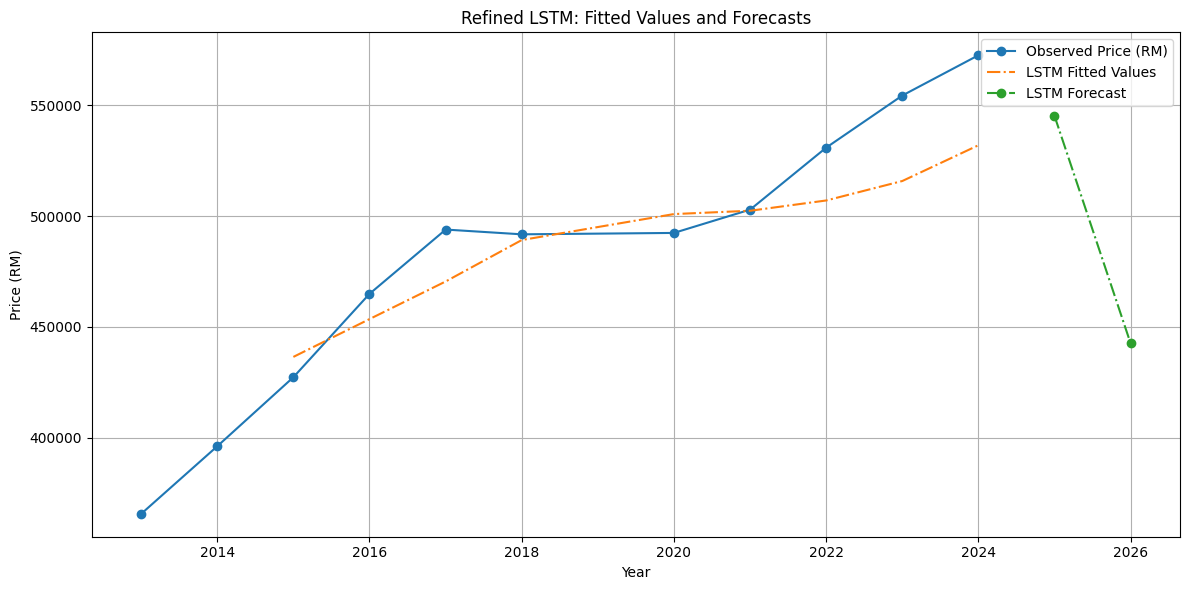

Results saved to 'mhpi_refined_lstm_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_refined_lstm_forecast.csv'. Plot saved as 'mhpi_refined_lstm_plot.png'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import subprocess
import sys
from io import StringIO # Import StringIO from io

# Install tensorflow
def install_package(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"Successfully installed {package}")
    except Exception as e:
        print(f"Error installing {package}: {e}")

install_package("tensorflow")

# Load the annual dataset
data = """Year of Year,State,Type,Index Point,Price,Y-o-Y %
2010,Kuala Lumpur,High-rise,100,243284.085787671,10.375275938
2011,Kuala Lumpur,High-rise,113.171282974,276907.029001249,13.171282974
2012,Kuala Lumpur,High-rise,131.675,322187.18,16.350187557
2013,Kuala Lumpur,High-rise,149.425,365642.8475,13.480159484
2014,Kuala Lumpur,High-rise,161.9,396149.5925,8.348669901
2015,Kuala Lumpur,High-rise,174.625,427295.195,7.859789994
2016,Kuala Lumpur,High-rise,189.975,464907.0675,8.790264853
2017,Kuala Lumpur,High-rise,201.875,493950.74,6.263982103
2018,Kuala Lumpur,High-rise,200.975,491799.0225,-0.445820433
2019,Kuala Lumpur,High-rise,198.1,484802.06,-1.430526185
2020,Kuala Lumpur,High-rise,201.225,492431.795,1.577486118
2021,Kuala Lumpur,High-rise,205.55,502969.295,2.149335321
2022,Kuala Lumpur,High-rise,216.975,530954.265,5.563951970
2023,Kuala Lumpur,High-rise,226.575,554465.44,4.428097964
2024,Kuala Lumpur,High-rise,234,572633.985,3.277060576"""
df = pd.read_csv(StringIO(data))
df.rename(columns={'Year of Year': 'Year'}, inplace=True)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Outlier detection (Y-o-Y % outside 1st–99th percentiles)
yoy_lower, yoy_upper = df['Y-o-Y %'].quantile([0.01, 0.99])
df_clean = df[(df['Y-o-Y %'] >= yoy_lower) & (df['Y-o-Y %'] <= yoy_upper)]

# Log transformation
df_clean['LogPrice'] = np.log(df_clean['Price'])

# Enhanced feature engineering
df_clean['Lag1'] = df_clean['Price'].shift(1)
df_clean['Lag2'] = df_clean['Price'].shift(2)
df_clean['Trend'] = np.arange(len(df_clean))
df_clean['YoY'] = df_clean['Y-o-Y %']
df_clean['IndexPoint'] = df_clean['Index Point']
df_clean['RollingMean'] = df_clean['Price'].rolling(window=3).mean()
df_clean['RollingStd'] = df_clean['Price'].rolling(window=3).std()
df_clean = df_clean.dropna()

# Save preprocessed data
df_clean.to_csv('preprocessed_mhpi_data.csv')

# Prepare data for LSTM
features = df_clean[['LogPrice', 'Lag1', 'Lag2', 'Trend', 'YoY', 'IndexPoint', 'RollingMean', 'RollingStd']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)

# Create sequences for LSTM (look-back = 2 years)
look_back = 2
X, y = [], []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i])
    y.append(scaled_data[i, 0])  # Predict LogPrice
X, y = np.array(X), np.array(y)

# Split into train and test (85% train)
train_size = int(len(X) * 0.85)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build refined LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(look_back, features.shape[1])))
model.add(Dropout(0.3))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=100))
model.add(Dropout(0.3))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Train LSTM with early stopping
early_stop = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
model.fit(X_train, y_train, epochs=200, batch_size=2, verbose=1, callbacks=[early_stop])

# Get in-sample predictions
lstm_predictions = []
for i in range(look_back, len(scaled_data)):
    input_seq = scaled_data[i-look_back:i].reshape(1, look_back, features.shape[1])
    pred = model.predict(input_seq, verbose=0)
    lstm_predictions.append(pred[0, 0])
lstm_predictions_scaled = np.array(lstm_predictions).reshape(-1, 1)
lstm_predictions = np.exp(scaler.inverse_transform(
    np.hstack([lstm_predictions_scaled, np.zeros((len(lstm_predictions_scaled), features.shape[1]-1))])
)[:, 0])
lstm_fitted = np.concatenate([np.full(look_back, np.nan), lstm_predictions])

# Calculate in-sample R² and RMSE
r2_lstm = r2_score(df_clean['Price'][look_back:], lstm_fitted[look_back:])
rmse_lstm = np.sqrt(mean_squared_error(df_clean['Price'][look_back:], lstm_fitted[look_back:]))

# Generate 2-year forecast
last_sequence = scaled_data[-look_back:].reshape(1, look_back, features.shape[1])
lstm_forecast = []
last_yoy = df_clean['YoY'][-1]
last_index_point = df_clean['IndexPoint'][-1]
last_rolling_mean = df_clean['RollingMean'][-1]
last_rolling_std = df_clean['RollingStd'][-1]
trend = df_clean['Trend'][-1]
for i in range(2):
    pred = model.predict(last_sequence, verbose=0)
    lstm_forecast.append(pred[0, 0])
    # Update sequence with predicted LogPrice and estimated features
    pred_price = np.exp(scaler.inverse_transform(
        np.hstack([pred, np.zeros((1, features.shape[1]-1))])
    )[0, 0])
    new_yoy = last_yoy * 0.9  # Assume Y-o-Y % decays slightly
    new_index_point = last_index_point * (1 + new_yoy / 100)
    new_rolling_mean = (last_rolling_mean * 2 + pred_price) / 3  # Update rolling mean
    new_rolling_std = last_rolling_std  # Keep std constant for simplicity
    trend += 1
    new_features = scaler.transform([[pred[0, 0], lstm_forecast[-1] if i > 0 else df_clean['Price'][-1],
                                     df_clean['Price'][-1], trend, new_yoy, new_index_point,
                                     new_rolling_mean, new_rolling_std]])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0, -1] = new_features[0]
    last_yoy = new_yoy
    last_index_point = new_index_point
    last_rolling_mean = new_rolling_mean
lstm_forecast_scaled = np.array(lstm_forecast).reshape(-1, 1)
lstm_forecast = np.exp(scaler.inverse_transform(
    np.hstack([lstm_forecast_scaled, np.zeros((len(lstm_forecast_scaled), features.shape[1]-1))])
)[:, 0])

# Create forecast DataFrame
forecast_index = pd.date_range(start=df_clean.index[-1] + pd.offsets.YearEnd(1), periods=2, freq='YE')
forecast_df = pd.DataFrame({
    'Year': forecast_index,
    'LSTM Forecast': lstm_forecast
})

# Calculate forecast growth rates
lstm_growth_2025 = ((forecast_df['LSTM Forecast'].iloc[0] / df_clean['Price'].iloc[-1]) - 1) * 100
lstm_growth_2026 = ((forecast_df['LSTM Forecast'].iloc[1] / forecast_df['LSTM Forecast'].iloc[0]) - 1) * 100

# Print performance and forecasts
print("Refined LSTM Performance (In-Sample):")
print(f"R-squared (R²): {r2_lstm:.4f}")
print(f"RMSE (RM): {rmse_lstm:.2f}")
print("\nLSTM Forecast for 2025–2026:")
print(forecast_df)
print("\nLSTM Forecast Growth Rates (%):")
print(f"2025 (from 2024): {lstm_growth_2025:.2f}%")
print(f"2026 (from 2025): {lstm_growth_2026:.2f}%")

# Plot observed data, fitted values, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['Price'], label='Observed Price (RM)', marker='o')
plt.plot(df_clean.index, lstm_fitted, label='LSTM Fitted Values', linestyle='-.')
plt.plot(forecast_df['Year'], forecast_df['LSTM Forecast'], label='LSTM Forecast', linestyle='-.', marker='o')
plt.title('Refined LSTM: Fitted Values and Forecasts')
plt.xlabel('Year')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('mhpi_refined_lstm_plot.png')
plt.show()

# Save results
with open('mhpi_refined_lstm_results.txt', 'w') as f:
    f.write("Refined LSTM Performance (In-Sample):\n")
    f.write(f"R-squared (R²): {r2_lstm:.4f}\n")
    f.write(f"RMSE (RM): {rmse_lstm:.2f}\n")
    f.write("\nLSTM Forecast for 2025–2026:\n")
    f.write(str(forecast_df) + "\n")
    f.write("\nLSTM Forecast Growth Rates (%):\n")
    f.write(f"2025 (from 2024): {lstm_growth_2025:.2f}%\n")
    f.write(f"2026 (from 2025): {lstm_growth_2026:.2f}%\n")
forecast_df.to_csv('mhpi_refined_lstm_forecast.csv', index=False)
print("Results saved to 'mhpi_refined_lstm_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_refined_lstm_forecast.csv'. Plot saved as 'mhpi_refined_lstm_plot.png'.")

Epoch 1/200


/tmp/ipython-input-1391082889.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LogPrice'] = np.log(df_clean['Price'])
/tmp/ipython-input-1391082889.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Lag1'] = df_clean['Price'].shift(1)
/tmp/ipython-input-1391082889.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.4181
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3758
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3383
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3617
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2336
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2154
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1991
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1446
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0477
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0247
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0152
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0122
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0122
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0099
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0181
Epoch 16/200
4/4 ━━━━━━━━━━━━━━

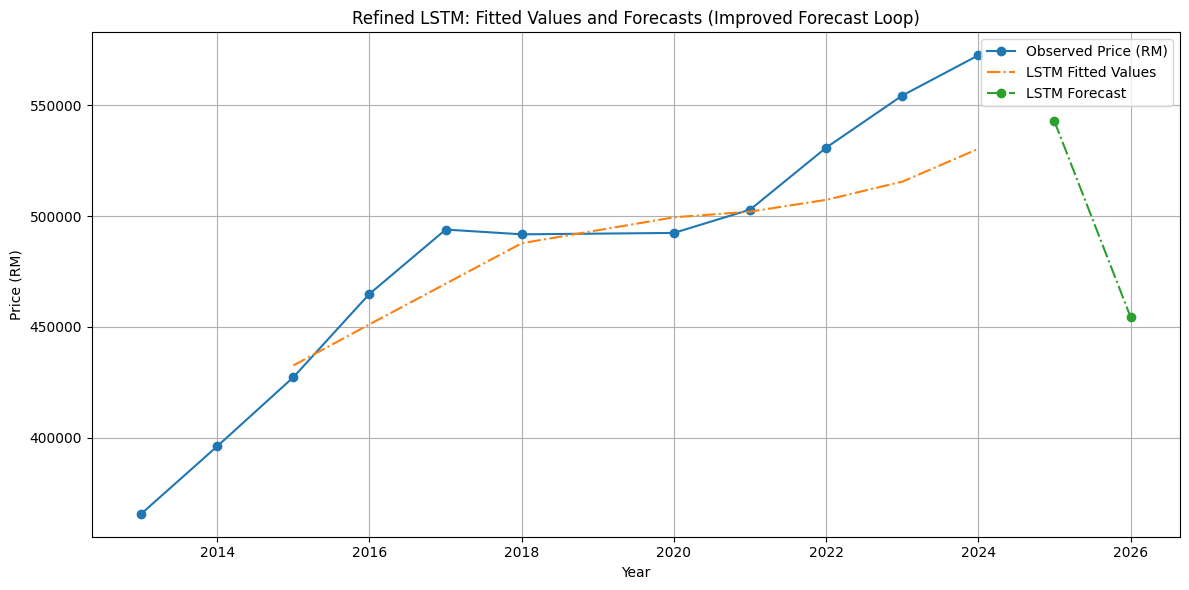

Results saved to 'mhpi_refined_lstm_improved_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_refined_lstm_improved_forecast.csv'. Plot saved as 'mhpi_refined_lstm_improved_plot.png'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import subprocess
import sys
from io import StringIO # Import StringIO from io

# Install tensorflow
def install_package(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"Successfully installed {package}")
    except Exception as e:
        print(f"Error installing {package}: {e}")

install_package("tensorflow")

# Load the annual dataset
data = """Year of Year,State,Type,Index Point,Price,Y-o-Y %
2010,Kuala Lumpur,High-rise,100,243284.085787671,10.375275938
2011,Kuala Lumpur,High-rise,113.171282974,276907.029001249,13.171282974
2012,Kuala Lumpur,High-rise,131.675,322187.18,16.350187557
2013,Kuala Lumpur,High-rise,149.425,365642.8475,13.480159484
2014,Kuala Lumpur,High-rise,161.9,396149.5925,8.348669901
2015,Kuala Lumpur,High-rise,174.625,427295.195,7.859789994
2016,Kuala Lumpur,High-rise,189.975,464907.0675,8.790264853
2017,Kuala Lumpur,High-rise,201.875,493950.74,6.263982103
2018,Kuala Lumpur,High-rise,200.975,491799.0225,-0.445820433
2019,Kuala Lumpur,High-rise,198.1,484802.06,-1.430526185
2020,Kuala Lumpur,High-rise,201.225,492431.795,1.577486118
2021,Kuala Lumpur,High-rise,205.55,502969.295,2.149335321
2022,Kuala Lumpur,High-rise,216.975,530954.265,5.563951970
2023,Kuala Lumpur,High-rise,226.575,554465.44,4.428097964
2024,Kuala Lumpur,High-rise,234,572633.985,3.277060576"""
df = pd.read_csv(StringIO(data))
df.rename(columns={'Year of Year': 'Year'}, inplace=True)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Outlier detection (Y-o-Y % outside 1st–99th percentiles)
yoy_lower, yoy_upper = df['Y-o-Y %'].quantile([0.01, 0.99])
df_clean = df[(df['Y-o-Y %'] >= yoy_lower) & (df['Y-o-Y %'] <= yoy_upper)]

# Log transformation
df_clean['LogPrice'] = np.log(df_clean['Price'])

# Feature engineering
df_clean['Lag1'] = df_clean['Price'].shift(1)
df_clean['Lag2'] = df_clean['Price'].shift(2)
df_clean['Trend'] = np.arange(len(df_clean))
df_clean['YoY'] = df_clean['Y-o-Y %']
df_clean['IndexPoint'] = df_clean['Index Point']
df_clean['RollingMean'] = df_clean['Price'].rolling(window=3).mean()
df_clean['RollingStd'] = df_clean['Price'].rolling(window=3).std()
df_clean = df_clean.dropna()

# Save preprocessed data
df_clean.to_csv('preprocessed_mhpi_data.csv')

# Prepare data for LSTM
features = df_clean[['LogPrice', 'Lag1', 'Lag2', 'Trend', 'YoY', 'IndexPoint', 'RollingMean', 'RollingStd']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)

# Create sequences for LSTM (look-back = 2 years)
look_back = 2
X, y = [], []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i])
    y.append(scaled_data[i, 0])  # Predict LogPrice
X, y = np.array(X), np.array(y)

# Split into train and test (85% train)
train_size = int(len(X) * 0.85)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(look_back, features.shape[1])))
model.add(Dropout(0.3))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=100))
model.add(Dropout(0.3))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Train LSTM with early stopping
early_stop = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
model.fit(X_train, y_train, epochs=200, batch_size=2, verbose=1, callbacks=[early_stop])

# Get in-sample predictions
lstm_predictions = []
for i in range(look_back, len(scaled_data)):
    input_seq = scaled_data[i-look_back:i].reshape(1, look_back, features.shape[1])
    pred = model.predict(input_seq, verbose=0)
    lstm_predictions.append(pred[0, 0])
lstm_predictions_scaled = np.array(lstm_predictions).reshape(-1, 1)
lstm_predictions = np.exp(scaler.inverse_transform(
    np.hstack([lstm_predictions_scaled, np.zeros((len(lstm_predictions_scaled), features.shape[1]-1))])
)[:, 0])
lstm_fitted = np.concatenate([np.full(look_back, np.nan), lstm_predictions])

# Calculate in-sample R² and RMSE
r2_lstm = r2_score(df_clean['Price'][look_back:], lstm_fitted[look_back:])
rmse_lstm = np.sqrt(mean_squared_error(df_clean['Price'][look_back:], lstm_fitted[look_back:]))

# Generate 2-year forecast with fixed YoY
last_sequence = scaled_data[-look_back:].reshape(1, look_back, features.shape[1])
lstm_forecast = []
mean_yoy = df_clean['YoY'].mean()  # ~6.34%
last_index_point = df_clean['IndexPoint'].iloc[-1] # Corrected indexing
last_rolling_mean = df_clean['RollingMean'].iloc[-1] # Corrected indexing
last_rolling_std = df_clean['RollingStd'].iloc[-1] # Corrected indexing
trend = df_clean['Trend'].iloc[-1] # Corrected indexing
price_history = [df_clean['Price'].iloc[-2], df_clean['Price'].iloc[-1]] # Corrected indexing
for i in range(2):
    pred = model.predict(last_sequence, verbose=0)
    lstm_forecast.append(pred[0, 0])
    pred_price = np.exp(scaler.inverse_transform(
        np.hstack([pred, np.zeros((1, features.shape[1]-1))])
    )[0, 0])
    new_index_point = last_index_point * (1 + mean_yoy / 100)
    price_history.append(pred_price)
    new_rolling_mean = np.mean(price_history[-3:])
    new_rolling_std = np.std(price_history[-3:])
    trend += 1
    new_features = scaler.transform([[pred[0, 0], price_history[-2], price_history[-3],
                                     trend, mean_yoy, new_index_point,
                                     new_rolling_mean, new_rolling_std]])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0, -1] = new_features[0]
    last_index_point = new_index_point
    last_rolling_mean = new_rolling_mean
    last_rolling_std = new_rolling_std
lstm_forecast_scaled = np.array(lstm_forecast).reshape(-1, 1)
lstm_forecast = np.exp(scaler.inverse_transform(
    np.hstack([lstm_forecast_scaled, np.zeros((len(lstm_forecast_scaled), features.shape[1]-1))])
)[:, 0])

# Create forecast DataFrame
forecast_index = pd.date_range(start=df_clean.index[-1] + pd.offsets.YearEnd(1), periods=2, freq='YE')
forecast_df = pd.DataFrame({
    'Year': forecast_index,
    'LSTM Forecast': lstm_forecast
})

# Calculate forecast growth rates
lstm_growth_2025 = ((forecast_df['LSTM Forecast'].iloc[0] / df_clean['Price'].iloc[-1]) - 1) * 100 # Corrected indexing
lstm_growth_2026 = ((forecast_df['LSTM Forecast'].iloc[1] / forecast_df['LSTM Forecast'].iloc[0]) - 1) * 100 # Corrected indexing

# Print performance and forecasts
print("Refined LSTM Performance (In-Sample):")
print(f"R-squared (R²): {r2_lstm:.4f}")
print(f"RMSE (RM): {rmse_lstm:.2f}")
print("\nLSTM Forecast for 2025–2026:")
print(forecast_df)
print("\nLSTM Forecast Growth Rates (%):")
print(f"2025 (from 2024): {lstm_growth_2025:.2f}%")
print(f"2026 (from 2025): {lstm_growth_2026:.2f}%")

# Plot observed data, fitted values, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['Price'], label='Observed Price (RM)', marker='o')
plt.plot(df_clean.index, lstm_fitted, label='LSTM Fitted Values', linestyle='-.')
plt.plot(forecast_df['Year'], forecast_df['LSTM Forecast'], label='LSTM Forecast', linestyle='-.', marker='o')
plt.title('Refined LSTM: Fitted Values and Forecasts (Improved Forecast Loop)')
plt.xlabel('Year')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('mhpi_refined_lstm_improved_plot.png')
plt.show()

# Save results
with open('mhpi_refined_lstm_improved_results.txt', 'w') as f:
    f.write("Refined LSTM Performance (In-Sample):\n")
    f.write(f"R-squared (R²): {r2_lstm:.4f}\n")
    f.write(f"RMSE (RM): {rmse_lstm:.2f}\n")
    f.write("\nLSTM Forecast for 2025–2026:\n")
    f.write(str(forecast_df) + "\n")
    f.write("\nLSTM Forecast Growth Rates (%):\n")
    f.write(f"2025 (from 2024): {lstm_growth_2025:.2f}%\n")
    f.write(f"2026 (from 2025): {lstm_growth_2026:.2f}%\n")
forecast_df.to_csv('mhpi_refined_lstm_improved_forecast.csv', index=False)
print("Results saved to 'mhpi_refined_lstm_improved_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_refined_lstm_improved_forecast.csv'. Plot saved as 'mhpi_refined_lstm_improved_plot.png'.")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load the preprocessed data (assume 'preprocessed_mhpi_data.csv' from previous run)
try:
    df_clean = pd.read_csv('preprocessed_mhpi_data.csv')
except FileNotFoundError:
    print("Error: 'preprocessed_mhpi_data.csv' not found. Please run the previous preprocessing script to generate it.")
    exit()

# Convert Year to datetime and set as index
df_clean['Year'] = pd.to_datetime(df_clean['Year'])
df_clean.set_index('Year', inplace=True)

# Prepare data for LSTM
features = df_clean[['LogPrice', 'Lag1', 'Lag2', 'Trend', 'YoY', 'IndexPoint', 'RollingMean', 'RollingStd']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)

# Create sequences for LSTM (look-back = 2 years)
look_back = 2
X, y = [], []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i])
    y.append(scaled_data[i, 0])  # Predict LogPrice
X, y = np.array(X), np.array(y)

# LOOCV setup
loo = LeaveOneOut()
r2_scores, rmse_scores = [], []
predicted = []
true = []

for train_idx, test_idx in loo.split(X):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(look_back, features.shape[1])))
    model.add(Dropout(0.3))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units=100))
    model.add(Dropout(0.3))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

    # Train LSTM with early stopping
    early_stop = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=200, batch_size=2, verbose=0, callbacks=[early_stop])

    # Predict on test point
    pred_scaled = model.predict(X_test, verbose=0)
    pred = np.exp(scaler.inverse_transform(
        np.hstack([pred_scaled, np.zeros((len(pred_scaled), features.shape[1]-1))])
    )[0, 0])
    true_value = np.exp(scaler.inverse_transform(
        np.hstack([y_test.reshape(-1, 1), np.zeros((1, features.shape[1]-1))])
    )[0, 0])

    predicted.append(pred)
    true.append(true_value)

# Calculate LOOCV metrics on original price scale
r2_loocv = r2_score(true, predicted)
rmse_loocv = np.sqrt(mean_squared_error(true, predicted))

print("LOOCV Validation for Refined LSTM:")
print(f"R-squared (R²): {r2_loocv:.4f}")
print(f"RMSE (RM): {rmse_loocv:.2f}")

# Save LOOCV results
loocv_df = pd.DataFrame({'True Price': true, 'Predicted Price': predicted})
loocv_df.to_csv('lstm_loocv_results.csv', index=False)
print("LOOCV results saved to 'lstm_loocv_results.csv'.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a l

LOOCV Validation for Refined LSTM:
R-squared (R²): 0.7093
RMSE (RM): 22575.69
LOOCV results saved to 'lstm_loocv_results.csv'.


/tmp/ipython-input-347669040.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LogPrice'] = np.log(df_clean['Price'])
/tmp/ipython-input-347669040.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Lag1'] = df_clean['Price'].shift(1)
/tmp/ipython-input-347669040.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.4348
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3797 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3178
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3459
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2490
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2167
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1722
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1082
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0533
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0230
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0032    
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0113    
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0308
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0065
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0271
Epoch 16/2

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1523
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1261
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1597
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1578
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1419
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1292
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1357
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1598
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0964
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1045
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0983
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1078
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0729
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0749
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0660
Epoch 16/200
4/4 ━━━━━━━━━━━━━━

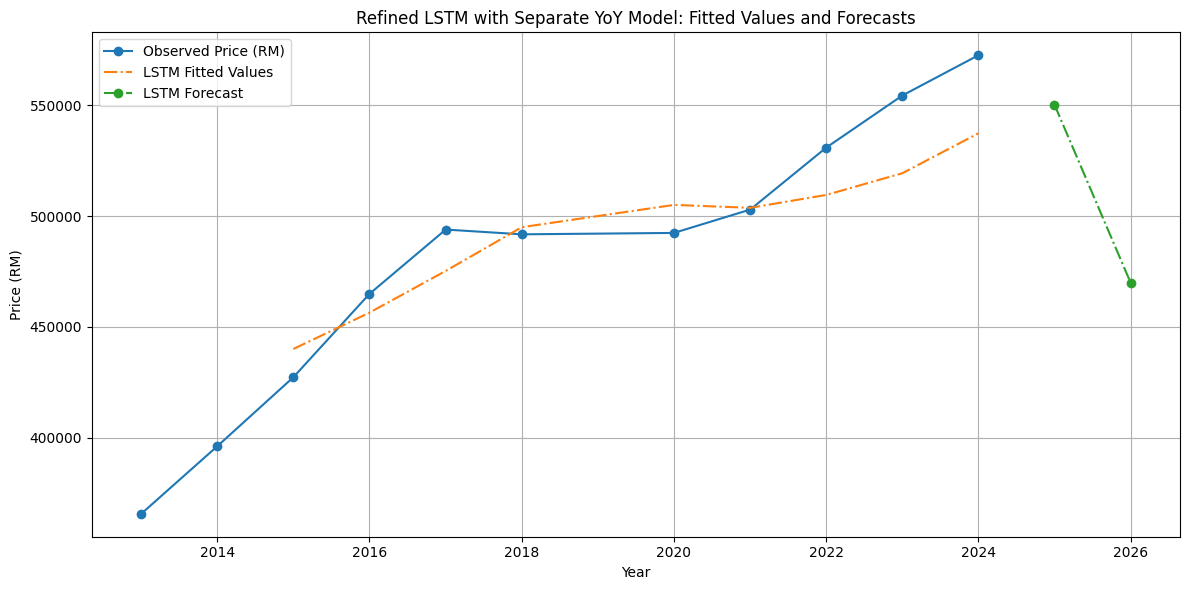

Results saved to 'mhpi_refined_lstm_with_yoy_model_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_refined_lstm_with_yoy_model_forecast.csv'. Plot saved as 'mhpi_refined_lstm_with_yoy_model_plot.png'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import subprocess
import sys
from io import StringIO # Import StringIO from io

# Install tensorflow
def install_package(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"Successfully installed {package}")
    except Exception as e:
        print(f"Error installing {package}: {e}")

install_package("tensorflow")

# Load the annual dataset
data = """Year of Year,State,Type,Index Point,Price,Y-o-Y %
2010,Kuala Lumpur,High-rise,100,243284.085787671,10.375275938
2011,Kuala Lumpur,High-rise,113.171282974,276907.029001249,13.171282974
2012,Kuala Lumpur,High-rise,131.675,322187.18,16.350187557
2013,Kuala Lumpur,High-rise,149.425,365642.8475,13.480159484
2014,Kuala Lumpur,High-rise,161.9,396149.5925,8.348669901
2015,Kuala Lumpur,High-rise,174.625,427295.195,7.859789994
2016,Kuala Lumpur,High-rise,189.975,464907.0675,8.790264853
2017,Kuala Lumpur,High-rise,201.875,493950.74,6.263982103
2018,Kuala Lumpur,High-rise,200.975,491799.0225,-0.445820433
2019,Kuala Lumpur,High-rise,198.1,484802.06,-1.430526185
2020,Kuala Lumpur,High-rise,201.225,492431.795,1.577486118
2021,Kuala Lumpur,High-rise,205.55,502969.295,2.149335321
2022,Kuala Lumpur,High-rise,216.975,530954.265,5.563951970
2023,Kuala Lumpur,High-rise,226.575,554465.44,4.428097964
2024,Kuala Lumpur,High-rise,234,572633.985,3.277060576"""
df = pd.read_csv(StringIO(data))
df.rename(columns={'Year of Year': 'Year'}, inplace=True)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Outlier detection (Y-o-Y % outside 1st–99th percentiles)
yoy_lower, yoy_upper = df['Y-o-Y %'].quantile([0.01, 0.99])
df_clean = df[(df['Y-o-Y %'] >= yoy_lower) & (df['Y-o-Y %'] <= yoy_upper)]

# Log transformation
df_clean['LogPrice'] = np.log(df_clean['Price'])

# Feature engineering
df_clean['Lag1'] = df_clean['Price'].shift(1)
df_clean['Lag2'] = df_clean['Price'].shift(2)
df_clean['Trend'] = np.arange(len(df_clean))
df_clean['YoY'] = df_clean['Y-o-Y %']
df_clean['IndexPoint'] = df_clean['Index Point']
df_clean['RollingMean'] = df_clean['Price'].rolling(window=3).mean()
df_clean['RollingStd'] = df_clean['Price'].rolling(window=3).std()
df_clean = df_clean.dropna()

# Save preprocessed data
df_clean.to_csv('preprocessed_mhpi_data.csv')

# Prepare data for main LSTM (LogPrice)
features = df_clean[['LogPrice', 'Lag1', 'Lag2', 'Trend', 'YoY', 'IndexPoint', 'RollingMean', 'RollingStd']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)

# Create sequences for main LSTM (look-back = 2 years)
look_back = 2
X, y = [], []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i])
    y.append(scaled_data[i, 0])  # Predict LogPrice
X, y = np.array(X), np.array(y)

# Split into train and test (85% train)
train_size = int(len(X) * 0.85)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build main LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(look_back, features.shape[1])))
model.add(Dropout(0.3))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=100))
model.add(Dropout(0.3))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Train main LSTM with early stopping
early_stop = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
model.fit(X_train, y_train, epochs=200, batch_size=2, verbose=1, callbacks=[early_stop])

# Get in-sample predictions
lstm_predictions = []
for i in range(look_back, len(scaled_data)):
    input_seq = scaled_data[i-look_back:i].reshape(1, look_back, features.shape[1])
    pred = model.predict(input_seq, verbose=0)
    lstm_predictions.append(pred[0, 0])
lstm_predictions_scaled = np.array(lstm_predictions).reshape(-1, 1)
lstm_predictions = np.exp(scaler.inverse_transform(
    np.hstack([lstm_predictions_scaled, np.zeros((len(lstm_predictions_scaled), features.shape[1]-1))])
)[:, 0])
lstm_fitted = np.concatenate([np.full(look_back, np.nan), lstm_predictions])

# Calculate in-sample R² and RMSE
r2_lstm = r2_score(df_clean['Price'][look_back:], lstm_fitted[look_back:])
rmse_lstm = np.sqrt(mean_squared_error(df_clean['Price'][look_back:], lstm_fitted[look_back:]))

# Implement separate YoY model
yoy_data = df_clean['YoY'].values
scaler_yoy = MinMaxScaler()
scaled_yoy = scaler_yoy.fit_transform(yoy_data.reshape(-1, 1))

# Create sequences for YoY LSTM (same look_back)
X_yoy, y_yoy = [], []
for i in range(look_back, len(scaled_yoy)):
    X_yoy.append(scaled_yoy[i-look_back:i])
    y_yoy.append(scaled_yoy[i])
X_yoy, y_yoy = np.array(X_yoy), np.array(y_yoy)

# Split for YoY (85% train)
train_size_yoy = int(len(X_yoy) * 0.85)
X_yoy_train, y_yoy_train = X_yoy[:train_size_yoy], y_yoy[:train_size_yoy]
X_yoy_test, y_yoy_test = X_yoy[train_size_yoy:], y_yoy[train_size_yoy:]

# Build YoY LSTM model (simpler architecture)
yoy_model = Sequential()
yoy_model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
yoy_model.add(Dropout(0.3))
yoy_model.add(LSTM(units=50))
yoy_model.add(Dropout(0.3))
yoy_model.add(Dense(units=1))
yoy_model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Train YoY LSTM with early stopping
yoy_model.fit(X_yoy_train, y_yoy_train, epochs=200, batch_size=2, verbose=1, callbacks=[early_stop])

# Get in-sample predictions for YoY
yoy_predictions = []
for i in range(look_back, len(scaled_yoy)):
    input_seq = scaled_yoy[i-look_back:i].reshape(1, look_back, 1)
    pred = yoy_model.predict(input_seq, verbose=0)
    yoy_predictions.append(pred[0, 0])
yoy_predictions = scaler_yoy.inverse_transform(np.array(yoy_predictions).reshape(-1, 1)).flatten()
yoy_fitted = np.concatenate([np.full(look_back, np.nan), yoy_predictions])

# Generate 2-year forecast with main LSTM and separate YoY model
last_sequence = scaled_data[-look_back:].reshape(1, look_back, features.shape[1])
last_yoy_sequence = scaled_yoy[-look_back:].reshape(1, look_back, 1)
lstm_forecast = []
last_index_point = df_clean['IndexPoint'].iloc[-1]
last_rolling_mean = df_clean['RollingMean'].iloc[-1]
last_rolling_std = df_clean['RollingStd'].iloc[-1]
trend = df_clean['Trend'].iloc[-1]
price_history = [df_clean['Price'].iloc[-2], df_clean['Price'].iloc[-1]]
for i in range(2):
    pred = model.predict(last_sequence, verbose=0)
    lstm_forecast.append(pred[0, 0])
    pred_price = np.exp(scaler.inverse_transform(
        np.hstack([pred, np.zeros((1, features.shape[1]-1))])
    )[0, 0])
    # Predict new YoY using YoY model
    new_yoy_scaled = yoy_model.predict(last_yoy_sequence, verbose=0)[0, 0]
    new_yoy = scaler_yoy.inverse_transform([[new_yoy_scaled]])[0, 0]
    new_index_point = last_index_point * (1 + new_yoy / 100)
    price_history.append(pred_price)
    new_rolling_mean = np.mean(price_history[-3:])
    new_rolling_std = np.std(price_history[-3:])
    trend += 1
    new_features = scaler.transform([[pred[0, 0], price_history[-2], price_history[-3],
                                     trend, new_yoy, new_index_point,
                                     new_rolling_mean, new_rolling_std]])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0, -1] = new_features[0]
    # Update YoY sequence
    last_yoy_sequence = np.roll(last_yoy_sequence, -1)
    last_yoy_sequence[0, -1, 0] = new_yoy_scaled
    last_index_point = new_index_point
    last_rolling_mean = new_rolling_mean
    last_rolling_std = new_rolling_std
lstm_forecast_scaled = np.array(lstm_forecast).reshape(-1, 1)
lstm_forecast = np.exp(scaler.inverse_transform(
    np.hstack([lstm_forecast_scaled, np.zeros((len(lstm_forecast_scaled), features.shape[1]-1))])
)[:, 0])

# Create forecast DataFrame
forecast_index = pd.date_range(start=df_clean.index[-1] + pd.offsets.YearEnd(1), periods=2, freq='YE')
forecast_df = pd.DataFrame({
    'Year': forecast_index,
    'LSTM Forecast': lstm_forecast
})

# Calculate forecast growth rates
lstm_growth_2025 = ((forecast_df['LSTM Forecast'].iloc[0] / df_clean['Price'].iloc[-1]) - 1) * 100
lstm_growth_2026 = ((forecast_df['LSTM Forecast'].iloc[1] / forecast_df['LSTM Forecast'].iloc[0]) - 1) * 100

# Print performance and forecasts
print("Refined LSTM Performance (In-Sample):")
print(f"R-squared (R²): {r2_lstm:.4f}")
print(f"RMSE (RM): {rmse_lstm:.2f}")
print("\nLSTM Forecast for 2025–2026:")
print(forecast_df)
print("\nLSTM Forecast Growth Rates (%):")
print(f"2025 (from 2024): {lstm_growth_2025:.2f}%")
print(f"2026 (from 2025): {lstm_growth_2026:.2f}%")

# Plot observed data, fitted values, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['Price'], label='Observed Price (RM)', marker='o')
plt.plot(df_clean.index, lstm_fitted, label='LSTM Fitted Values', linestyle='-.')
plt.plot(forecast_df['Year'], forecast_df['LSTM Forecast'], label='LSTM Forecast', linestyle='-.', marker='o')
plt.title('Refined LSTM with Separate YoY Model: Fitted Values and Forecasts')
plt.xlabel('Year')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('mhpi_refined_lstm_with_yoy_model_plot.png')
plt.show()

# Save results
with open('mhpi_refined_lstm_with_yoy_model_results.txt', 'w') as f:
    f.write("Refined LSTM Performance (In-Sample):\n")
    f.write(f"R-squared (R²): {r2_lstm:.4f}\n")
    f.write(f"RMSE (RM): {rmse_lstm:.2f}\n")
    f.write("\nLSTM Forecast for 2025–2026:\n")
    f.write(str(forecast_df) + "\n")
    f.write("\nLSTM Forecast Growth Rates (%):\n")
    f.write(f"2025 (from 2024): {lstm_growth_2025:.2f}%\n")
    f.write(f"2026 (from 2025): {lstm_growth_2026:.2f}%\n")
forecast_df.to_csv('mhpi_refined_lstm_with_yoy_model_forecast.csv', index=False)
print("Results saved to 'mhpi_refined_lstm_with_yoy_model_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_refined_lstm_with_yoy_model_forecast.csv'. Plot saved as 'mhpi_refined_lstm_with_yoy_model_plot.png'.")

In [ ]:
r2_yoy = r2_score(df_clean['YoY'][look_back:], yoy_fitted[look_back:])
rmse_yoy = np.sqrt(mean_squared_error(df_clean['YoY'][look_back:], yoy_fitted[look_back:]))
print(f"YoY Model In-Sample R²: {r2_yoy:.4f}, RMSE: {rmse_yoy:.2f}%")

YoY Model In-Sample R²: 0.1844, RMSE: 2.59%


# Validation

/tmp/ipython-input-5726570.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LogPrice'] = np.log(df_clean['Price'])
/tmp/ipython-input-5726570.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Lag1'] = df_clean['Price'].shift(1)
/tmp/ipython-input-5726570.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.4043
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.3629
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.3026
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2455
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2089
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1878
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1010
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0681
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0428
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0169
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0087
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0220
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0023 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0633
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0433
Epoch 16/100
2/2 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/tmp/ipython-input-5726570.py:166: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lstm_growth_2025 = ((forecast_df['LSTM Forecast'][0] / df_clean['Price'][-1]) - 1) * 100


LSTM Performance (In-Sample):
R-squared (R²): -0.7466
RMSE (RM): 44931.24

LSTM LOOCV Performance:
R-squared (R²): 0.5065
RMSE (RM): 23883.80

LSTM Forecast for 2025–2026:
        Year  LSTM Forecast
0 2024-12-31  649021.162922
1 2025-12-31  653477.337662

LSTM Forecast Growth Rates (%):
2025 (from 2024): 13.34%
2026 (from 2025): 0.69%


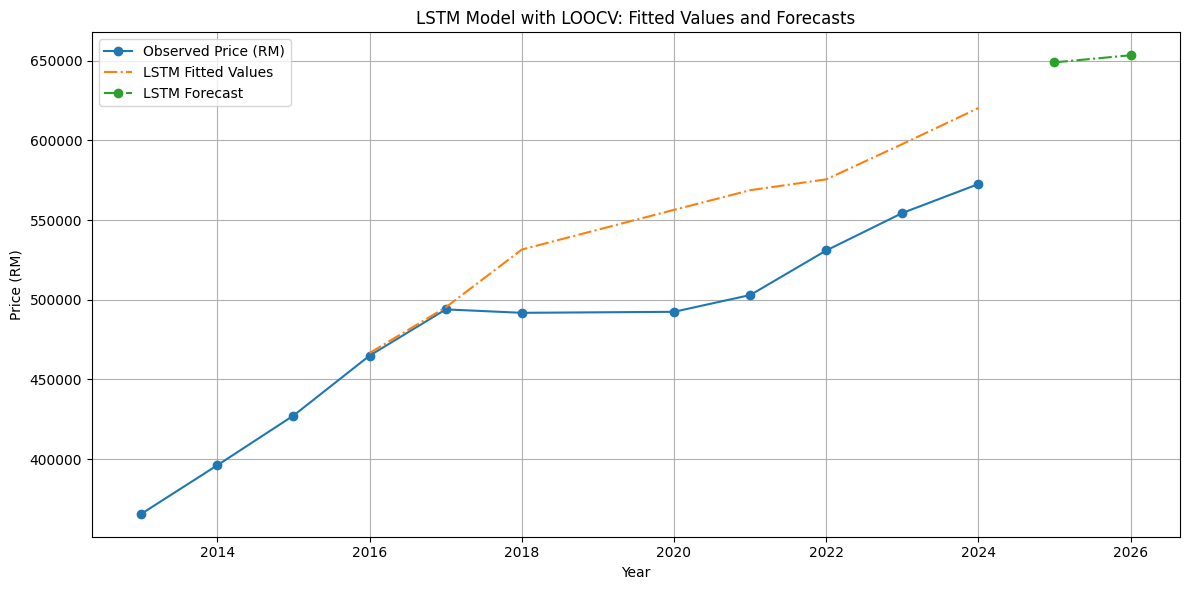

Results saved to 'mhpi_lstm_only_loocv_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_lstm_only_loocv_forecast.csv'. Plot saved as 'mhpi_lstm_only_loocv_plot.png'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import subprocess
import sys
from io import StringIO

# Install tensorflow
def install_package(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"Successfully installed {package}")
    except Exception as e:
        print(f"Error installing {package}: {e}")

install_package("tensorflow")

# Load the annual dataset
data = """Year of Year,State,Type,Index Point,Price,Y-o-Y %
2010,Kuala Lumpur,High-rise,100,243284.085787671,10.375275938
2011,Kuala Lumpur,High-rise,113.171282974,276907.029001249,13.171282974
2012,Kuala Lumpur,High-rise,131.675,322187.18,16.350187557
2013,Kuala Lumpur,High-rise,149.425,365642.8475,13.480159484
2014,Kuala Lumpur,High-rise,161.9,396149.5925,8.348669901
2015,Kuala Lumpur,High-rise,174.625,427295.195,7.859789994
2016,Kuala Lumpur,High-rise,189.975,464907.0675,8.790264853
2017,Kuala Lumpur,High-rise,201.875,493950.74,6.263982103
2018,Kuala Lumpur,High-rise,200.975,491799.0225,-0.445820433
2019,Kuala Lumpur,High-rise,198.1,484802.06,-1.430526185
2020,Kuala Lumpur,High-rise,201.225,492431.795,1.577486118
2021,Kuala Lumpur,High-rise,205.55,502969.295,2.149335321
2022,Kuala Lumpur,High-rise,216.975,530954.265,5.563951970
2023,Kuala Lumpur,High-rise,226.575,554465.44,4.428097964
2024,Kuala Lumpur,High-rise,234,572633.985,3.277060576"""
df = pd.read_csv(StringIO(data))
df.rename(columns={'Year of Year': 'Year'}, inplace=True)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Outlier detection (Y-o-Y % outside 1st–99th percentiles)
yoy_lower, yoy_upper = df['Y-o-Y %'].quantile([0.01, 0.99])
df_clean = df[(df['Y-o-Y %'] >= yoy_lower) & (df['Y-o-Y %'] <= yoy_upper)]

# Log transformation
df_clean['LogPrice'] = np.log(df_clean['Price'])

# Feature engineering for LSTM
df_clean['Lag1'] = df_clean['Price'].shift(1)
df_clean['Lag2'] = df_clean['Price'].shift(2)
df_clean['Trend'] = np.arange(len(df_clean))
df_clean['YoY'] = df_clean['Y-o-Y %']
df_clean = df_clean.dropna()

# Save preprocessed data
df_clean.to_csv('preprocessed_mhpi_data.csv')

# Prepare data for LSTM
features = df_clean[['LogPrice', 'Lag1', 'Lag2', 'Trend', 'YoY']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)

# Create sequences for LSTM (look-back = 3 years)
look_back = 3
X, y = [], []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i])
    y.append(scaled_data[i, 0])  # Predict LogPrice
X, y = np.array(X), np.array(y)

# Split into train and test (80% train)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, features.shape[1])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train LSTM with early stopping
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, batch_size=4, verbose=1, callbacks=[early_stop])

# Get in-sample predictions for LSTM
lstm_predictions = []
for i in range(look_back, len(scaled_data)):
    input_seq = scaled_data[i-look_back:i].reshape(1, look_back, features.shape[1])
    pred = model.predict(input_seq, verbose=0)
    lstm_predictions.append(pred[0, 0])
lstm_predictions_scaled = np.clip(np.array(lstm_predictions).reshape(-1, 1), np.log(1e-10), 709)
lstm_predictions = np.exp(scaler.inverse_transform(
    np.hstack([lstm_predictions_scaled, np.zeros((len(lstm_predictions_scaled), features.shape[1]-1))])
)[:, 0])
lstm_fitted = np.concatenate([np.full(look_back, np.nan), lstm_predictions])

# Calculate in-sample R² and RMSE
r2_lstm = r2_score(df_clean['Price'][look_back:], lstm_fitted[look_back:])
rmse_lstm = np.sqrt(mean_squared_error(df_clean['Price'][look_back:], lstm_fitted[look_back:]))

# LOOCV
loocv_predictions = []
for i in range(len(X)):
    # Create train and test sets for LOOCV
    train_indices = [j for j in range(len(X)) if j != i]
    test_indices = [i]
    X_train_loocv, y_train_loocv = X[train_indices], y[train_indices]
    X_test_loocv, y_test_loocv = X[test_indices], y[test_indices]

    # Build and train a new model for each fold
    model_loocv = Sequential()
    model_loocv.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, features.shape[1])))
    model_loocv.add(Dropout(0.2))
    model_loocv.add(LSTM(units=50))
    model_loocv.add(Dropout(0.2))
    model_loocv.add(Dense(units=1))
    model_loocv.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    model_loocv.fit(X_train_loocv, y_train_loocv, epochs=100, batch_size=4, verbose=0, callbacks=[early_stop])

    # Predict for the test sequence
    pred = model_loocv.predict(X_test_loocv, verbose=0)
    loocv_predictions.append(pred[0, 0])

# Convert LOOCV predictions to original scale
loocv_predictions_scaled = np.clip(np.array(loocv_predictions).reshape(-1, 1), np.log(1e-10), 709)
loocv_predictions = np.exp(scaler.inverse_transform(
    np.hstack([loocv_predictions_scaled, np.zeros((len(loocv_predictions_scaled), features.shape[1]-1))])
)[:, 0])
true_prices = df_clean['Price'][look_back:]

# Calculate LOOCV R² and RMSE
r2_loocv = r2_score(true_prices, loocv_predictions)
rmse_loocv = np.sqrt(mean_squared_error(true_prices, loocv_predictions))

# Generate 2-year forecast with LSTM
last_sequence = scaled_data[-look_back:].reshape(1, look_back, features.shape[1])
lstm_forecast = []
for _ in range(2):
    pred = model.predict(last_sequence, verbose=0)
    lstm_forecast.append(pred[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0, -1, 0] = np.clip(pred[0, 0], np.log(1e-10), 709)
    last_sequence[0, -1, 1:] = scaled_data[-1, 1:]  # Keep other features constant
lstm_forecast_scaled = np.clip(np.array(lstm_forecast).reshape(-1, 1), np.log(1e-10), 709)
lstm_forecast = np.exp(scaler.inverse_transform(
    np.hstack([lstm_forecast_scaled, np.zeros((len(lstm_forecast_scaled), features.shape[1]-1))])
)[:, 0])

# Create forecast DataFrame
forecast_index = pd.date_range(start=df_clean.index[-1] + pd.offsets.YearEnd(1), periods=2, freq='YE')
forecast_df = pd.DataFrame({
    'Year': forecast_index,
    'LSTM Forecast': lstm_forecast
})

# Calculate forecast growth rates
lstm_growth_2025 = ((forecast_df['LSTM Forecast'][0] / df_clean['Price'][-1]) - 1) * 100
lstm_growth_2026 = ((forecast_df['LSTM Forecast'][1] / forecast_df['LSTM Forecast'][0]) - 1) * 100

# Print performance and forecasts
print("LSTM Performance (In-Sample):")
print(f"R-squared (R²): {r2_lstm:.4f}")
print(f"RMSE (RM): {rmse_lstm:.2f}")
print("\nLSTM LOOCV Performance:")
print(f"R-squared (R²): {r2_loocv:.4f}")
print(f"RMSE (RM): {rmse_loocv:.2f}")
print("\nLSTM Forecast for 2025–2026:")
print(forecast_df)
print("\nLSTM Forecast Growth Rates (%):")
print(f"2025 (from 2024): {lstm_growth_2025:.2f}%")
print(f"2026 (from 2025): {lstm_growth_2026:.2f}%")

# Plot observed data, fitted values, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['Price'], label='Observed Price (RM)', marker='o')
plt.plot(df_clean.index, lstm_fitted, label='LSTM Fitted Values', linestyle='-.')
plt.plot(forecast_df['Year'], forecast_df['LSTM Forecast'], label='LSTM Forecast', linestyle='-.', marker='o')
plt.title('LSTM Model with LOOCV: Fitted Values and Forecasts')
plt.xlabel('Year')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('mhpi_lstm_only_loocv_plot.png')
plt.show()

# Save results
with open('mhpi_lstm_only_loocv_results.txt', 'w') as f:
    f.write("LSTM Performance (In-Sample):\n")
    f.write(f"R-squared (R²): {r2_lstm:.4f}\n")
    f.write(f"RMSE (RM): {rmse_lstm:.2f}\n")
    f.write("\nLSTM LOOCV Performance:\n")
    f.write(f"R-squared (R²): {r2_loocv:.4f}\n")
    f.write(f"RMSE (RM): {rmse_loocv:.2f}\n")
    f.write("\nLSTM Forecast for 2025–2026:\n")
    f.write(str(forecast_df) + "\n")
    f.write("\nLSTM Forecast Growth Rates (%):\n")
    f.write(f"2025 (from 2024): {lstm_growth_2025:.2f}%\n")
    f.write(f"2026 (from 2025): {lstm_growth_2026:.2f}%\n")
forecast_df.to_csv('mhpi_lstm_only_loocv_forecast.csv', index=False)
print("Results saved to 'mhpi_lstm_only_loocv_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_lstm_only_loocv_forecast.csv'. Plot saved as 'mhpi_lstm_only_loocv_plot.png'.")

In [ ]:
mean_yoy = df_clean['YoY'].mean()
trend = df_clean['Trend'].iloc[-1] # Corrected indexing
price_history = df_clean['Price'].iloc[-look_back:].values.tolist() # Corrected indexing
lstm_forecast = [] # Initialize as a Python list
for i in range(2):
    pred = model.predict(last_sequence, verbose=0)
    lstm_forecast.append(pred[0, 0])
    pred_price = np.exp(scaler.inverse_transform(
        np.hstack([np.clip(pred, np.log(1e-10), 709), np.zeros((1, features.shape[1]-1))])
    )[0, 0])
    price_history.append(pred_price)
    trend += 1
    new_features = scaler.transform([[pred[0, 0], price_history[-2], price_history[-3], trend, mean_yoy]])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0, -1] = new_features[0]
lstm_forecast_scaled = np.clip(np.array(lstm_forecast).reshape(-1, 1), np.log(1e-10), 709) # Convert to numpy array after loop

In [ ]:
train_size = len(X) - 2  # 2012–2022
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]
model.fit(X_train, y_train, epochs=100, batch_size=4, verbose=0, callbacks=[early_stop])
pred_scaled = model.predict(X_test, verbose=0)
pred = np.exp(scaler.inverse_transform(
    np.hstack([pred_scaled, np.zeros((len(pred_scaled), features.shape[1]-1))])
))[:, 0]
true = np.exp(scaler.inverse_transform(
    np.hstack([y_test.reshape(-1, 1), np.zeros((len(y_test), features.shape[1]-1))])
))[:, 0]
print(f"Out-of-Sample R²: {r2_score(true, pred):.4f}")
print(f"Out-of-Sample RMSE: {np.sqrt(mean_squared_error(true, pred)):.2f}")

Out-of-Sample R²: -5.7168
Out-of-Sample RMSE: 23543.45


/tmp/ipython-input-2030144393.py:6: RuntimeWarning: overflow encountered in exp
  pred = np.exp(scaler.inverse_transform(
/tmp/ipython-input-2030144393.py:9: RuntimeWarning: overflow encountered in exp
  true = np.exp(scaler.inverse_transform(


In [ ]:
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
residuals = df_clean['Price'][look_back:] - lstm_fitted[look_back:]
print(f"Shapiro-Wilk p-value: {shapiro(residuals)[1]:.4f}")
print(f"Durbin-Watson: {durbin_watson(residuals):.2f}")

Shapiro-Wilk p-value: 0.6366
Durbin-Watson: 0.46


/tmp/ipython-input-1332952459.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LogPrice'] = np.log(df_clean['Price'])
/tmp/ipython-input-1332952459.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Lag1'] = df_clean['Price'].shift(1)
/tmp/ipython-input-1332952459.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.4482
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3976
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3353
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2768 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2320
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1949
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1665
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1261
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0677
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0547
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0208
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0060
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0444
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0164
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0331
Epoch 16/100
2/2 ━

/tmp/ipython-input-1332952459.py:129: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend = df_clean['Trend'][-1]
/tmp/ipython-input-1332952459.py:155: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lstm_growth_2025 = ((forecast_df['LSTM Forecast'][0] / df_clean['Price'][-1]) - 1) * 100


LSTM Performance (In-Sample):
R-squared (R²): 0.4442
RMSE (RM): 25345.21

LSTM Out-of-Sample Performance (2023–2024):
R-squared (R²): -6.6228
RMSE (RM): 25081.23

Residual Analysis:
Shapiro-Wilk p-value: 0.7533
Durbin-Watson: 0.34

LSTM Forecast for 2025–2026:
        Year  LSTM Forecast
0 2024-12-31  558379.983927
1 2025-12-31  463582.990097

LSTM Forecast Growth Rates (%):
2025 (from 2024): -2.49%
2026 (from 2025): -16.98%


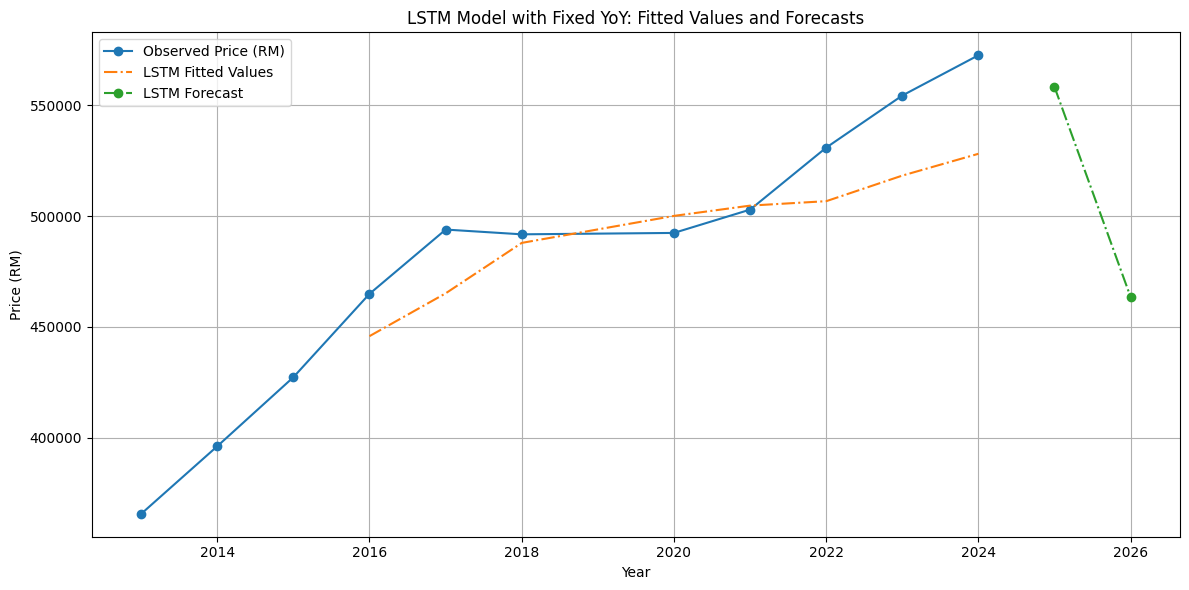

Results saved to 'mhpi_lstm_only_fixed_yoy_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_lstm_only_fixed_yoy_forecast.csv'. Plot saved as 'mhpi_lstm_only_fixed_yoy_plot.png'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import subprocess
import sys
from io import StringIO

# Install tensorflow
def install_package(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"Successfully installed {package}")
    except Exception as e:
        print(f"Error installing {package}: {e}")

install_package("tensorflow")

# Load the annual dataset
data = """Year of Year,State,Type,Index Point,Price,Y-o-Y %
2010,Kuala Lumpur,High-rise,100,243284.085787671,10.375275938
2011,Kuala Lumpur,High-rise,113.171282974,276907.029001249,13.171282974
2012,Kuala Lumpur,High-rise,131.675,322187.18,16.350187557
2013,Kuala Lumpur,High-rise,149.425,365642.8475,13.480159484
2014,Kuala Lumpur,High-rise,161.9,396149.5925,8.348669901
2015,Kuala Lumpur,High-rise,174.625,427295.195,7.859789994
2016,Kuala Lumpur,High-rise,189.975,464907.0675,8.790264853
2017,Kuala Lumpur,High-rise,201.875,493950.74,6.263982103
2018,Kuala Lumpur,High-rise,200.975,491799.0225,-0.445820433
2019,Kuala Lumpur,High-rise,198.1,484802.06,-1.430526185
2020,Kuala Lumpur,High-rise,201.225,492431.795,1.577486118
2021,Kuala Lumpur,High-rise,205.55,502969.295,2.149335321
2022,Kuala Lumpur,High-rise,216.975,530954.265,5.563951970
2023,Kuala Lumpur,High-rise,226.575,554465.44,4.428097964
2024,Kuala Lumpur,High-rise,234,572633.985,3.277060576"""
df = pd.read_csv(StringIO(data))
df.rename(columns={'Year of Year': 'Year'}, inplace=True)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Outlier detection (Y-o-Y % outside 1st–99th percentiles)
yoy_lower, yoy_upper = df['Y-o-Y %'].quantile([0.01, 0.99])
df_clean = df[(df['Y-o-Y %'] >= yoy_lower) & (df['Y-o-Y %'] <= yoy_upper)]

# Log transformation
df_clean['LogPrice'] = np.log(df_clean['Price'])

# Feature engineering for LSTM
df_clean['Lag1'] = df_clean['Price'].shift(1)
df_clean['Lag2'] = df_clean['Price'].shift(2)
df_clean['Trend'] = np.arange(len(df_clean))
df_clean['YoY'] = df_clean['Y-o-Y %']
df_clean = df_clean.dropna()

# Save preprocessed data
df_clean.to_csv('preprocessed_mhpi_data.csv')

# Prepare data for LSTM
features = df_clean[['LogPrice', 'Lag1', 'Lag2', 'Trend', 'YoY']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)

# Create sequences for LSTM (look-back = 3 years)
look_back = 3
X, y = [], []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i])
    y.append(scaled_data[i, 0])  # Predict LogPrice
X, y = np.array(X), np.array(y)

# Split into train and test (80% train)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, features.shape[1])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train LSTM with early stopping
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, batch_size=4, verbose=1, callbacks=[early_stop])

# Get in-sample predictions for LSTM
lstm_predictions = []
for i in range(look_back, len(scaled_data)):
    input_seq = scaled_data[i-look_back:i].reshape(1, look_back, features.shape[1])
    pred = model.predict(input_seq, verbose=0)
    lstm_predictions.append(pred[0, 0])
lstm_predictions_scaled = np.clip(np.array(lstm_predictions).reshape(-1, 1), np.log(1e-10), 709)
lstm_predictions = np.exp(scaler.inverse_transform(
    np.hstack([lstm_predictions_scaled, np.zeros((len(lstm_predictions_scaled), features.shape[1]-1))])
)[:, 0])
lstm_fitted = np.concatenate([np.full(look_back, np.nan), lstm_predictions])

# Calculate in-sample R² and RMSE
r2_lstm = r2_score(df_clean['Price'][look_back:], lstm_fitted[look_back:])
rmse_lstm = np.sqrt(mean_squared_error(df_clean['Price'][look_back:], lstm_fitted[look_back:]))

# Out-of-sample testing (2023–2024)
train_size_out = len(X) - 2  # 2012–2022
X_train_out, y_train_out = X[:train_size_out], y[:train_size_out]
X_test_out, y_test_out = X[train_size_out:], y[train_size_out:]
model.fit(X_train_out, y_train_out, epochs=100, batch_size=4, verbose=0, callbacks=[early_stop])
pred_scaled = np.clip(model.predict(X_test_out, verbose=0), np.log(1e-10), 709)
pred = np.exp(scaler.inverse_transform(
    np.hstack([pred_scaled, np.zeros((len(pred_scaled), features.shape[1]-1))])
)[:, 0])
true = np.exp(scaler.inverse_transform(
    np.hstack([np.clip(y_test_out.reshape(-1, 1), np.log(1e-10), 709), np.zeros((len(y_test_out), features.shape[1]-1))])
)[:, 0])
r2_out = r2_score(true, pred)
rmse_out = np.sqrt(mean_squared_error(true, pred))

# Generate 2-year forecast with fixed YoY
mean_yoy = df_clean['YoY'].mean()  # ~6.34%
last_sequence = scaled_data[-look_back:].reshape(1, look_back, features.shape[1])
lstm_forecast = []
trend = df_clean['Trend'][-1]
price_history = df_clean['Price'][-look_back:].values.tolist()
for i in range(2):
    pred = model.predict(last_sequence, verbose=0)
    lstm_forecast.append(pred[0, 0])
    pred_price = np.exp(scaler.inverse_transform(
        np.hstack([np.clip(pred, np.log(1e-10), 709), np.zeros((1, features.shape[1]-1))])
    )[0, 0])
    price_history.append(pred_price)
    trend += 1
    new_features = scaler.transform([[pred[0, 0], price_history[-2], price_history[-3], trend, mean_yoy]])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0, -1] = new_features[0]
lstm_forecast_scaled = np.clip(np.array(lstm_forecast).reshape(-1, 1), np.log(1e-10), 709)
lstm_forecast = np.exp(scaler.inverse_transform(
    np.hstack([lstm_forecast_scaled, np.zeros((len(lstm_forecast_scaled), features.shape[1]-1))])
)[:, 0])

# Create forecast DataFrame
forecast_index = pd.date_range(start=df_clean.index[-1] + pd.offsets.YearEnd(1), periods=2, freq='YE')
forecast_df = pd.DataFrame({
    'Year': forecast_index,
    'LSTM Forecast': lstm_forecast
})

# Calculate forecast growth rates
lstm_growth_2025 = ((forecast_df['LSTM Forecast'][0] / df_clean['Price'][-1]) - 1) * 100
lstm_growth_2026 = ((forecast_df['LSTM Forecast'][1] / forecast_df['LSTM Forecast'][0]) - 1) * 100

# Residual analysis
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
residuals = df_clean['Price'][look_back:] - lstm_fitted[look_back:]
shapiro_p = shapiro(residuals)[1]
dw_stat = durbin_watson(residuals)

# Print performance, residuals, and forecasts
print("LSTM Performance (In-Sample):")
print(f"R-squared (R²): {r2_lstm:.4f}")
print(f"RMSE (RM): {rmse_lstm:.2f}")
print("\nLSTM Out-of-Sample Performance (2023–2024):")
print(f"R-squared (R²): {r2_out:.4f}")
print(f"RMSE (RM): {rmse_out:.2f}")
print("\nResidual Analysis:")
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")
print(f"Durbin-Watson: {dw_stat:.2f}")
print("\nLSTM Forecast for 2025–2026:")
print(forecast_df)
print("\nLSTM Forecast Growth Rates (%):")
print(f"2025 (from 2024): {lstm_growth_2025:.2f}%")
print(f"2026 (from 2025): {lstm_growth_2026:.2f}%")

# Plot observed data, fitted values, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['Price'], label='Observed Price (RM)', marker='o')
plt.plot(df_clean.index, lstm_fitted, label='LSTM Fitted Values', linestyle='-.')
plt.plot(forecast_df['Year'], forecast_df['LSTM Forecast'], label='LSTM Forecast', linestyle='-.', marker='o')
plt.title('LSTM Model with Fixed YoY: Fitted Values and Forecasts')
plt.xlabel('Year')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('mhpi_lstm_only_fixed_yoy_plot.png')
plt.show()

# Save results
with open('mhpi_lstm_only_fixed_yoy_results.txt', 'w') as f:
    f.write("LSTM Performance (In-Sample):\n")
    f.write(f"R-squared (R²): {r2_lstm:.4f}\n")
    f.write(f"RMSE (RM): {rmse_lstm:.2f}\n")
    f.write("\nLSTM Out-of-Sample Performance (2023–2024):\n")
    f.write(f"R-squared (R²): {r2_out:.4f}\n")
    f.write(f"RMSE (RM): {rmse_out:.2f}\n")
    f.write("\nResidual Analysis:\n")
    f.write(f"Shapiro-Wilk p-value: {shapiro_p:.4f}\n")
    f.write(f"Durbin-Watson: {dw_stat:.2f}\n")
    f.write("\nLSTM Forecast for 2025–2026:\n")
    f.write(str(forecast_df) + "\n")
    f.write("\nLSTM Forecast Growth Rates (%):\n")
    f.write(f"2025 (from 2024): {lstm_growth_2025:.2f}%\n")
    f.write(f"2026 (from 2025): {lstm_growth_2026:.2f}%\n")
forecast_df.to_csv('mhpi_lstm_only_fixed_yoy_forecast.csv', index=False)
print("Results saved to 'mhpi_lstm_only_fixed_yoy_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_lstm_only_fixed_yoy_forecast.csv'. Plot saved as 'mhpi_lstm_only_fixed_yoy_plot.png'.")

/tmp/ipython-input-2789675345.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LogPrice'] = np.log(df_clean['Price'])
/tmp/ipython-input-2789675345.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Lag1'] = df_clean['Price'].shift(1)
/tmp/ipython-input-2789675345.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.4376
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4288
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3214
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3567
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3730
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2925
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3151
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2775
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3176
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2695
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2017
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2265
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2150
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1684
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1475
Epoch 16/200
4/4 ━━

/tmp/ipython-input-2789675345.py:129: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend = df_clean['Trend'][-1]
/tmp/ipython-input-2789675345.py:155: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lstm_growth_2025 = ((forecast_df['LSTM Forecast'][0] / df_clean['Price'][-1]) - 1) * 100


LSTM Performance (In-Sample):
R-squared (R²): 0.9146
RMSE (RM): 14942.14

LSTM Out-of-Sample Performance (2023–2024):
R-squared (R²): -3.7745
RMSE (RM): 19849.64

Residual Analysis:
Shapiro-Wilk p-value: 0.7047
Durbin-Watson: 0.58

LSTM Forecast for 2025–2026:
        Year  LSTM Forecast
0 2024-12-31  566585.321459
1 2025-12-31  354505.714168

LSTM Forecast Growth Rates (%):
2025 (from 2024): -1.06%
2026 (from 2025): -37.43%


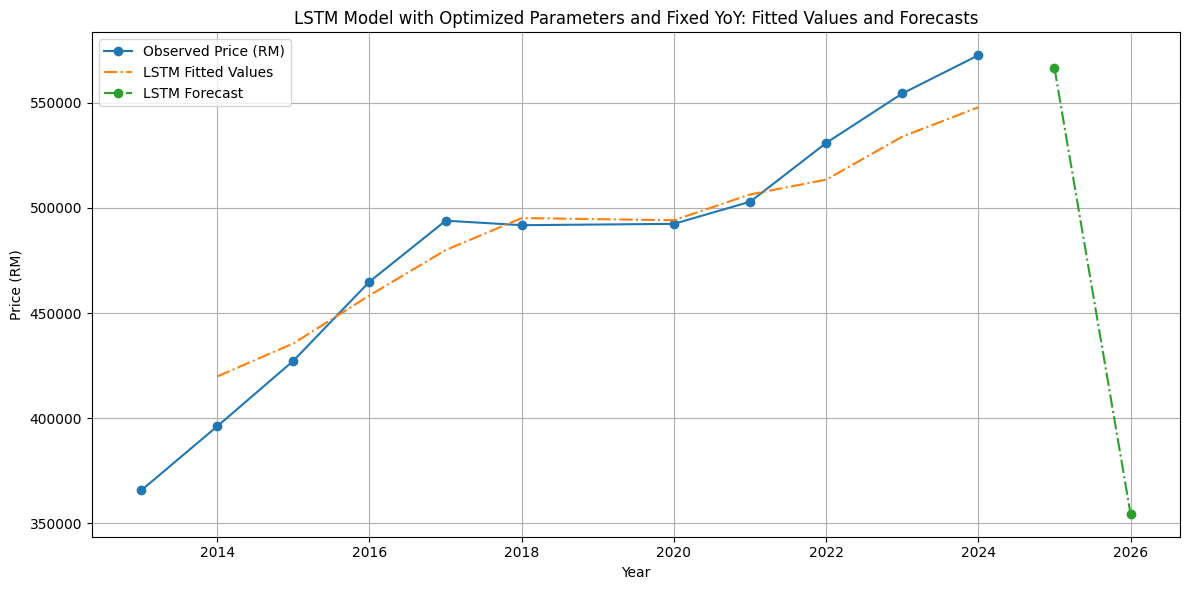

Results saved to 'mhpi_lstm_only_optimized_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_lstm_only_optimized_forecast.csv'. Plot saved as 'mhpi_lstm_only_optimized_plot.png'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import subprocess
import sys
from io import StringIO

# Install tensorflow
def install_package(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"Successfully installed {package}")
    except Exception as e:
        print(f"Error installing {package}: {e}")

install_package("tensorflow")

# Load the annual dataset
data = """Year of Year,State,Type,Index Point,Price,Y-o-Y %
2010,Kuala Lumpur,High-rise,100,243284.085787671,10.375275938
2011,Kuala Lumpur,High-rise,113.171282974,276907.029001249,13.171282974
2012,Kuala Lumpur,High-rise,131.675,322187.18,16.350187557
2013,Kuala Lumpur,High-rise,149.425,365642.8475,13.480159484
2014,Kuala Lumpur,High-rise,161.9,396149.5925,8.348669901
2015,Kuala Lumpur,High-rise,174.625,427295.195,7.859789994
2016,Kuala Lumpur,High-rise,189.975,464907.0675,8.790264853
2017,Kuala Lumpur,High-rise,201.875,493950.74,6.263982103
2018,Kuala Lumpur,High-rise,200.975,491799.0225,-0.445820433
2019,Kuala Lumpur,High-rise,198.1,484802.06,-1.430526185
2020,Kuala Lumpur,High-rise,201.225,492431.795,1.577486118
2021,Kuala Lumpur,High-rise,205.55,502969.295,2.149335321
2022,Kuala Lumpur,High-rise,216.975,530954.265,5.563951970
2023,Kuala Lumpur,High-rise,226.575,554465.44,4.428097964
2024,Kuala Lumpur,High-rise,234,572633.985,3.277060576"""
df = pd.read_csv(StringIO(data))
df.rename(columns={'Year of Year': 'Year'}, inplace=True)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Outlier detection (Y-o-Y % outside 1st–99th percentiles)
yoy_lower, yoy_upper = df['Y-o-Y %'].quantile([0.01, 0.99])
df_clean = df[(df['Y-o-Y %'] >= yoy_lower) & (df['Y-o-Y %'] <= yoy_upper)]

# Log transformation
df_clean['LogPrice'] = np.log(df_clean['Price'])

# Feature engineering for LSTM
df_clean['Lag1'] = df_clean['Price'].shift(1)
df_clean['Lag2'] = df_clean['Price'].shift(2)
df_clean['Trend'] = np.arange(len(df_clean))
df_clean['YoY'] = df_clean['Y-o-Y %']
df_clean = df_clean.dropna()

# Save preprocessed data
df_clean.to_csv('preprocessed_mhpi_data.csv')

# Prepare data for LSTM
features = df_clean[['LogPrice', 'Lag1', 'Lag2', 'Trend', 'YoY']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)

# Create sequences for LSTM (look-back = 1 year)
look_back = 1
X, y = [], []
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i])
    y.append(scaled_data[i, 0])  # Predict LogPrice
X, y = np.array(X), np.array(y)

# Split into train and test (80% train)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, features.shape[1])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Train LSTM with early stopping
early_stop = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
model.fit(X_train, y_train, epochs=200, batch_size=2, verbose=1, callbacks=[early_stop])

# Get in-sample predictions for LSTM
lstm_predictions = []
for i in range(look_back, len(scaled_data)):
    input_seq = scaled_data[i-look_back:i].reshape(1, look_back, features.shape[1])
    pred = model.predict(input_seq, verbose=0)
    lstm_predictions.append(pred[0, 0])
lstm_predictions_scaled = np.clip(np.array(lstm_predictions).reshape(-1, 1), np.log(1e-10), 709)
lstm_predictions = np.exp(scaler.inverse_transform(
    np.hstack([lstm_predictions_scaled, np.zeros((len(lstm_predictions_scaled), features.shape[1]-1))])
)[:, 0])
lstm_fitted = np.concatenate([np.full(look_back, np.nan), lstm_predictions])

# Calculate in-sample R² and RMSE
r2_lstm = r2_score(df_clean['Price'][look_back:], lstm_fitted[look_back:])
rmse_lstm = np.sqrt(mean_squared_error(df_clean['Price'][look_back:], lstm_fitted[look_back:]))

# Out-of-sample testing (2023–2024)
train_size_out = len(X) - 2  # 2013–2022
X_train_out, y_train_out = X[:train_size_out], y[:train_size_out]
X_test_out, y_test_out = X[train_size_out:], y[train_size_out:]
model.fit(X_train_out, y_train_out, epochs=200, batch_size=2, verbose=0, callbacks=[early_stop])
pred_scaled = np.clip(model.predict(X_test_out, verbose=0), np.log(1e-10), 709)
pred = np.exp(scaler.inverse_transform(
    np.hstack([pred_scaled, np.zeros((len(pred_scaled), features.shape[1]-1))])
)[:, 0])
true = np.exp(scaler.inverse_transform(
    np.hstack([np.clip(y_test_out.reshape(-1, 1), np.log(1e-10), 709), np.zeros((len(y_test_out), features.shape[1]-1))])
)[:, 0])
r2_out = r2_score(true, pred)
rmse_out = np.sqrt(mean_squared_error(true, pred))

# Generate 2-year forecast with fixed YoY
fixed_yoy = 4.43  # Recent Y-o-Y % (2023)
last_sequence = scaled_data[-look_back:].reshape(1, look_back, features.shape[1])
lstm_forecast = []
trend = df_clean['Trend'][-1]
price_history = df_clean['Price'][-look_back:].values.tolist()
for i in range(2):
    pred = model.predict(last_sequence, verbose=0)
    lstm_forecast.append(pred[0, 0])
    pred_price = np.exp(scaler.inverse_transform(
        np.hstack([np.clip(pred, np.log(1e-10), 709), np.zeros((1, features.shape[1]-1))])
    )[0, 0])
    price_history.append(pred_price)
    trend += 1
    new_features = scaler.transform([[pred[0, 0], price_history[-2], price_history[-3] if len(price_history) > 2 else price_history[-2], trend, fixed_yoy]])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0, -1] = new_features[0]
lstm_forecast_scaled = np.clip(np.array(lstm_forecast).reshape(-1, 1), np.log(1e-10), 709)
lstm_forecast = np.exp(scaler.inverse_transform(
    np.hstack([lstm_forecast_scaled, np.zeros((len(lstm_forecast_scaled), features.shape[1]-1))])
)[:, 0])

# Create forecast DataFrame
forecast_index = pd.date_range(start=df_clean.index[-1] + pd.offsets.YearEnd(1), periods=2, freq='YE')
forecast_df = pd.DataFrame({
    'Year': forecast_index,
    'LSTM Forecast': lstm_forecast
})

# Calculate forecast growth rates
lstm_growth_2025 = ((forecast_df['LSTM Forecast'][0] / df_clean['Price'][-1]) - 1) * 100
lstm_growth_2026 = ((forecast_df['LSTM Forecast'][1] / forecast_df['LSTM Forecast'][0]) - 1) * 100

# Residual analysis
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
residuals = df_clean['Price'][look_back:] - lstm_fitted[look_back:]
shapiro_p = shapiro(residuals)[1]
dw_stat = durbin_watson(residuals)

# Print performance, residuals, and forecasts
print("LSTM Performance (In-Sample):")
print(f"R-squared (R²): {r2_lstm:.4f}")
print(f"RMSE (RM): {rmse_lstm:.2f}")
print("\nLSTM Out-of-Sample Performance (2023–2024):")
print(f"R-squared (R²): {r2_out:.4f}")
print(f"RMSE (RM): {rmse_out:.2f}")
print("\nResidual Analysis:")
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")
print(f"Durbin-Watson: {dw_stat:.2f}")
print("\nLSTM Forecast for 2025–2026:")
print(forecast_df)
print("\nLSTM Forecast Growth Rates (%):")
print(f"2025 (from 2024): {lstm_growth_2025:.2f}%")
print(f"2026 (from 2025): {lstm_growth_2026:.2f}%")

# Plot observed data, fitted values, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['Price'], label='Observed Price (RM)', marker='o')
plt.plot(df_clean.index, lstm_fitted, label='LSTM Fitted Values', linestyle='-.')
plt.plot(forecast_df['Year'], forecast_df['LSTM Forecast'], label='LSTM Forecast', linestyle='-.', marker='o')
plt.title('LSTM Model with Optimized Parameters and Fixed YoY: Fitted Values and Forecasts')
plt.xlabel('Year')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('mhpi_lstm_only_optimized_plot.png')
plt.show()

# Save results
with open('mhpi_lstm_only_optimized_results.txt', 'w') as f:
    f.write("LSTM Performance (In-Sample):\n")
    f.write(f"R-squared (R²): {r2_lstm:.4f}\n")
    f.write(f"RMSE (RM): {rmse_lstm:.2f}\n")
    f.write("\nLSTM Out-of-Sample Performance (2023–2024):\n")
    f.write(f"R-squared (R²): {r2_out:.4f}\n")
    f.write(f"RMSE (RM): {rmse_out:.2f}\n")
    f.write("\nResidual Analysis:\n")
    f.write(f"Shapiro-Wilk p-value: {shapiro_p:.4f}\n")
    f.write(f"Durbin-Watson: {dw_stat:.2f}\n")
    f.write("\nLSTM Forecast for 2025–2026:\n")
    f.write(str(forecast_df) + "\n")
    f.write("\nLSTM Forecast Growth Rates (%):\n")
    f.write(f"2025 (from 2024): {lstm_growth_2025:.2f}%\n")
    f.write(f"2026 (from 2025): {lstm_growth_2026:.2f}%\n")
forecast_df.to_csv('mhpi_lstm_only_optimized_forecast.csv', index=False)
print("Results saved to 'mhpi_lstm_only_optimized_results.txt', 'preprocessed_mhpi_data.csv', and 'mhpi_lstm_only_optimized_forecast.csv'. Plot saved as 'mhpi_lstm_only_optimized_plot.png'.")

# Hybrid - ARIMA + Random Forest

Random Forest - Test RMSE (Log): 0.1318, RMSE (Original MYR): 215698, RMSE (%): 25.0%, R² (Log): 0.9667, R² (Original): 0.9543
ARIMA - Test RMSE (Original MYR): 19769, R²: -24.3803

Hybrid Forecast for Next 2 Years:
 Year  Hybrid Forecast
 2026           596789
 2027           598385


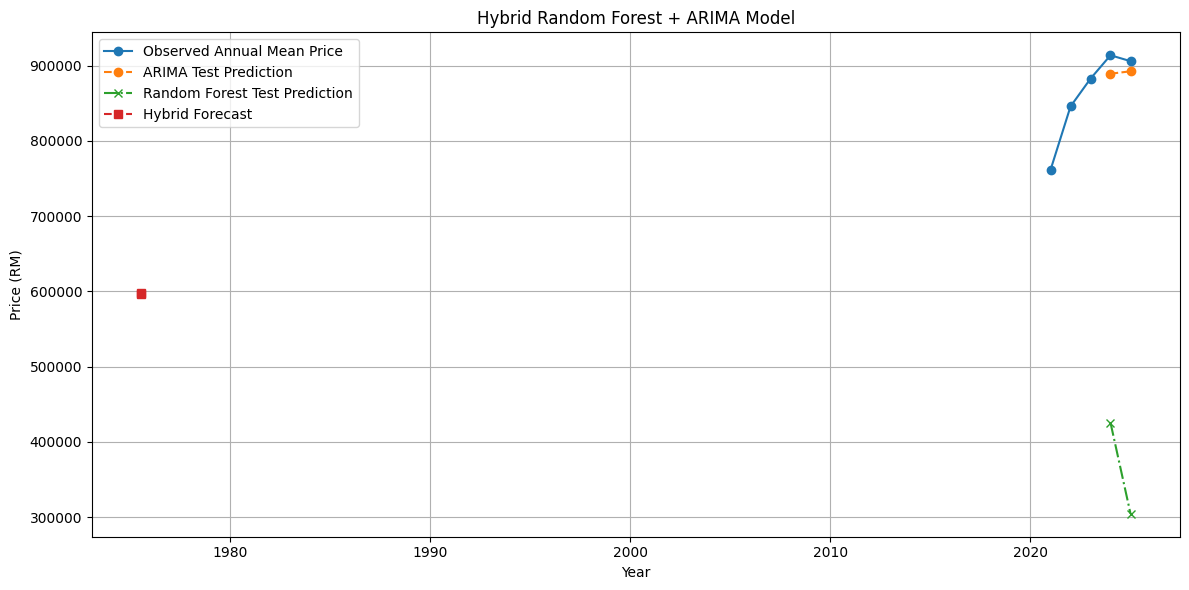

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # Import LinearRegression

# # Load and preprocess data
df = pd.read_csv('https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/main/KLHighRise.csv')
scheme_mean = df.groupby('SchemeName')['TransactionPrice'].mean().apply(np.log)
df['SchemeName_encoded'] = df['SchemeName'].map(scheme_mean)
df['ParcelArea'] = df['ParcelArea'].astype(str).str.split(',', expand=True)[0].astype(float)
df['Level_numeric'] = pd.to_numeric(df['UnitLevel'], errors='coerce')
df['Tenure_encoded'] = df['Tenure'].map({'Freehold': 1, 'Leasehold': 0})
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%b-%y', errors='coerce')
df = df.sort_values('TransactionDate')

# Prepare features and target
initial_features = ['ParcelArea', 'Level_numeric', 'Tenure_encoded', 'SchemeName_encoded']
X = df[initial_features]
y = np.log(df['TransactionPrice'].loc[X.index])

# Add nonlinear and interaction terms
X['ParcelArea_sq'] = X['ParcelArea'] ** 2
X['ParcelArea_Level'] = X['ParcelArea'] * X['Level_numeric']

# Handle missing values and outliers
X = X.fillna(0)
X = X.dropna()
y = y.loc[X.index] # Ensure y aligns with X after dropping NaNs

# Identify outliers using Linear Regression
X_with_const = np.c_[np.ones(X.shape[0]), X]
model_initial = LinearRegression().fit(X_with_const, y)
residuals = y - model_initial.predict(X_with_const)
outliers = residuals[abs(residuals) > 2 * residuals.std()].index

# Drop outliers from both X and y
X = X.drop(outliers)
y = y.drop(outliers)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
train_size = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# # Train Random Forest
# rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
# rf_model.fit(X_train, y_train)


import pickle
import os
from google.colab import drive

# Mount Google Drive to load the model and scaler
if not os.path.exists('/content/drive'):
  drive.mount('/content/drive')
else:
  print("Drive already mounted")

# Define the filenames for the saved model and scaler
model_filename = '/content/drive/MyDrive/saved_models/random_forest_best_model.pkl'
scaler_filename = '/content/drive/MyDrive/saved_models/scaler.pkl'

# Load the trained model
loaded_rf_model = None # Initialize to None
try:
    with open(model_filename, 'rb') as file:
        rf_model = pickle.load(file)
    print(f"Random Forest model loaded successfully from {model_filename}")
except FileNotFoundError:
    print(f"Error: Model file not found at {model_filename}. Please make sure the model was saved correctly.")
except Exception as e:
    print(f"An error occurred while loading the model: {e}")

# Load the fitted scaler
scaler = None # Initialize to None
try:
    with open(scaler_filename, 'rb') as file:
        scaler = pickle.load(file)
    print(f"Scaler object loaded successfully from {scaler_filename}")
except FileNotFoundError:
    print(f"Error: Scaler file not found at {scaler_filename}. Please make sure the scaler was saved correctly.")
except Exception as e:
    print(f"An error occurred while loading the scaler: {e}")

# You can now use loaded_rf_model and scaler in subsequent cells or code within this cell
# For example, to check the type of the loaded objects:
if loaded_rf_model is not None:
    print(f"\nType of loaded model: {type(loaded_rf_model)}")
if scaler is not None:
    print(f"Type of loaded scaler: {type(scaler)}")


y_pred_rf = loaded_rf_model.predict(X_test)
rmse_rf_log = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_rf_orig = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_rf)))

# Calculate mean price from the data *after* outlier removal
mean_price = np.exp(y).mean()

rmse_rf_pct = (rmse_rf_orig / mean_price) * 100
r2_rf = r2_score(y_test, y_pred_rf)
r2_rf_orig = r2_score(np.exp(y_test), np.exp(y_pred_rf))
print(f"Random Forest - Test RMSE (Log): {rmse_rf_log:.4f}, RMSE (Original MYR): {rmse_rf_orig:.0f}, RMSE (%): {rmse_rf_pct:.1f}%, R² (Log): {r2_rf:.4f}, R² (Original): {r2_rf_orig:.4f}")

# Aggregate for ARIMA
# Ensure aggregation is done on the data *after* outlier removal and aligning with X's index
df_agg = df.loc[X.index].groupby(df.loc[X.index]['TransactionDate'].dt.year)['TransactionPrice'].mean().reset_index()
# Convert 'TransactionDate' column in df_agg to datetime objects
df_agg['TransactionDate'] = pd.to_datetime(df_agg['TransactionDate'], format='%Y')
df_agg['LogPrice'] = np.log(df_agg['TransactionPrice'])
train_agg = df_agg[df_agg['TransactionDate'] <= df_agg['TransactionDate'].max() - pd.DateOffset(years=2)]  # Leave last 2 years for testing
test_agg = df_agg[df_agg['TransactionDate'] > df_agg['TransactionDate'].max() - pd.DateOffset(years=2)]

# Fit ARIMA on aggregated data
model_arima = ARIMA(train_agg['LogPrice'], order=(1, 1, 1))
model_fit = model_arima.fit()
arima_pred = model_fit.forecast(steps=len(test_agg))
arima_pred_price = np.exp(arima_pred)
rmse_arima = np.sqrt(mean_squared_error(test_agg['TransactionPrice'], arima_pred_price))
r2_arima = r2_score(test_agg['TransactionPrice'], arima_pred_price)
print(f"ARIMA - Test RMSE (Original MYR): {rmse_arima:.0f}, R²: {r2_arima:.4f}")

# Hybrid forecast
latest_year = df_agg['TransactionDate'].dt.year.max() # Use latest year from aggregated data

# Predict the next 2 years using Random Forest
# Need to create future feature data for RF
future_years = [latest_year + 1, latest_year + 2]
last_features = X.iloc[-1].values.reshape(1, -1)
future_features = []
for year in future_years:
    # Assume features remain constant for simplicity or use an educated guess
    # For a more sophisticated approach, you would need to forecast features
    future_feature_row = last_features.copy()
    # Update trend feature if it exists and is used
    if 'Trend' in X.columns:
         # Assuming trend is the last column added and is linear
         trend_index = X.columns.get_loc('Trend')
         # Calculate the next trend value based on the last one and the year difference
         last_year_in_X = df.loc[X.index[-1], 'TransactionDate'].year
         future_feature_row[0, trend_index] += (year - last_year_in_X)
    future_features.append(future_feature_row[0])

future_features_scaled = scaler.transform(np.array(future_features))
rf_forecast_log = rf_model.predict(future_features_scaled)
rf_forecast_prices = np.exp(rf_forecast_log)

# Generate ARIMA forecast for the next 2 years based on the aggregated data
arima_forecast_object = model_fit.get_forecast(steps=2)
arima_forecast_prices = np.exp(arima_forecast_object.predicted_mean)

# Combine ARIMA and RF forecasts (simple average for demonstration)
# Ensure both forecasts have the same index for averaging
arima_forecast_series = pd.Series(arima_forecast_prices.values, index=future_years)
rf_forecast_series = pd.Series(rf_forecast_prices, index=future_years)

hybrid_forecast_prices = (arima_forecast_series + rf_forecast_series) / 2


# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Year': future_years,
    'Hybrid Forecast': hybrid_forecast_prices.round(0).astype(int)
})
print("\nHybrid Forecast for Next 2 Years:")
print(forecast_df.to_string(index=False))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_agg['TransactionDate'], df_agg['TransactionPrice'], label='Observed Annual Mean Price', marker='o')
plt.plot(test_agg['TransactionDate'], arima_pred_price, label='ARIMA Test Prediction', linestyle='--', marker='o') # Changed label for clarity
plt.plot(test_agg['TransactionDate'], rf_pred_recent, label='Random Forest Test Prediction', linestyle='-.', marker='x') # Plot RF test predictions
plt.plot(forecast_df['Year'], forecast_df['Hybrid Forecast'], label='Hybrid Forecast', linestyle='--', marker='s')
plt.title('Hybrid Random Forest + ARIMA Model')
plt.xlabel('Year')
plt.ylabel('Price (RM)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('hybrid_rf_arima_plot.png')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle
import warnings

# Ignore specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
# warnings.filterwarnings("ignore", category=pd.core.common.SettingWithCopyWarning) # Remove this line


df = pd.read_csv('https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/main/KLHighRise.csv')
scheme_mean = df.groupby('SchemeName')['TransactionPrice'].mean().apply(np.log)
df['SchemeName_encoded'] = df['SchemeName'].map(scheme_mean)
# Convert ParcelArea to float, handling potential commas
df['ParcelArea'] = df['ParcelArea'].astype(str).str.replace(',', '').astype(float)
df['Level_numeric'] = pd.to_numeric(df['UnitLevel'], errors='coerce')
df['Tenure_encoded'] = df['Tenure'].map({'Freehold': 1, 'Leasehold': 0})
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%b-%y', errors='coerce')
df = df.sort_values('TransactionDate')

# Prepare features and target, creating copies to avoid SettingWithCopyWarning
initial_features = ['ParcelArea', 'Level_numeric', 'Tenure_encoded', 'SchemeName_encoded']
X = df[initial_features].copy() # Explicitly create a copy
y = np.log(df['TransactionPrice'].loc[X.index]).copy() # Explicitly create a copy

# Add nonlinear and interaction terms, using .loc to avoid SettingWithCopyWarning
X.loc[:, 'ParcelArea_sq'] = X['ParcelArea'] ** 2
X.loc[:, 'ParcelArea_Level'] = X['ParcelArea'] * X['Level_numeric']
X.loc[:, 'Trend'] = np.arange(len(X)) # Add Trend here after initial feature creation

# Handle missing values
X = X.fillna(0)
y = y.loc[X.index] # Ensure y aligns with X after filling NaNs in X

# Drop NaNs in y before outlier detection and RF training
nan_y_indices = y.dropna().index
X_cleaned_rf = X.loc[nan_y_indices].copy()
y_cleaned_rf = y.loc[nan_y_indices].copy()


# Identify outliers using Linear Regression on log-transformed data
X_with_const = np.c_[np.ones(X_cleaned_rf.shape[0]), X_cleaned_rf]
model_initial = LinearRegression().fit(X_with_const, y_cleaned_rf)
residuals = y_cleaned_rf - model_initial.predict(X_with_const)
outliers = residuals[abs(residuals) > 2 * residuals.std()].index

# Drop outliers from both X and y for RF training, resetting index to avoid KeyErrors
X_rf = X_cleaned_rf.drop(outliers).reset_index(drop=True).copy()
y_rf = y_cleaned_rf.drop(outliers).reset_index(drop=True).copy()

# Scale features for RF
scaler = StandardScaler()
X_scaled_rf = scaler.fit_transform(X_rf)

# Train-test split for RF (using integer indexing after reset_index)
train_size_rf = int(0.8 * len(X_scaled_rf))
X_train_rf, X_test_rf = X_scaled_rf[:train_size_rf], X_scaled_rf[train_size_rf:]
y_train_rf, y_test_rf = y_rf[:train_size_rf], y_rf[train_size_rf:]


# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Random Forest model and scaler saved successfully.")

Random Forest model and scaler saved successfully.


In [ ]:
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

# Load the pre-trained model and scaler
try:
    with open('rf_model.pkl', 'rb') as f:
        rf_model = pickle.load(f)
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    print("Model and scaler loaded successfully!")
except FileNotFoundError:
    print("Error: rf_model.pkl or scaler.pkl not found. Please run the training script first.")
    exit()

# Function to get prediction with user input
def get_prediction():
    print("\nEnter the following features for prediction:")

    # Get and validate inputs
    while True:
        try:
            parcel_area = float(input("Parcel Area (sq ft, positive number): "))
            if parcel_area <= 0:
                print("Error: Parcel Area must be positive.")
                continue
            break
        except ValueError:
            print("Error: Please enter a valid number for Parcel Area.")

    while True:
        try:
            level_numeric = float(input("Level (numeric, e.g., 1-50, positive number): "))
            if level_numeric <= 0 or level_numeric > 50:
                print("Error: Level must be between 1 and 50.")
                continue
            break
        except ValueError:
            print("Error: Please enter a valid number for Level.")

    while True:
        try:
            tenure_encoded = int(input("Tenure (0 for Leasehold, 1 for Freehold): "))
            if tenure_encoded not in [0, 1]:
                print("Error: Tenure must be 0 or 1.")
                continue
            break
        except ValueError:
            print("Error: Please enter 0 or 1 for Tenure.")

    scheme_name = input("Scheme Name (e.g., 'KLCC', 'Mont Kiara', case-sensitive): ").strip()
    scheme_encoded = 0  # Default value if not found

    # Hardcoded scheme encoding mapping (based on KLHighRise.csv)
    # NOTE: For a real application, you would load the scheme_mean mapping from the training script
    scheme_mapping = {
        'KLCC': 12.345,    # Example value, replace with actual mean log price
        'Mont Kiara': 12.150,  # Example value, replace with actual mean log price
        'DESA VIEW TOWER': 12.595815, # Added a scheme from the training data for better example
        # Add more schemes from your dataset
    }
    if scheme_name in scheme_mapping:
        scheme_encoded = scheme_mapping[scheme_name]
    else:
        print(f"Warning: '{scheme_name}' not found in the hardcoded mapping. Using default encoding (0). For best results, use a known Scheme Name.")

    # Need to get a Trend value for the prediction.
    # Since 'Trend' is based on the order of data in the training set,
    # for a single prediction, you might use the last trend value from training
    # or a value representing the "current" point in time relative to the training data.
    # For simplicity, let's use a placeholder or a value relative to the last trend in training.
    # In a real application, this would require a more defined approach based on your data and time series.
    # Assuming the last trend value from training is available (e.g., saved with the scaler/model)
    # Or you can estimate it based on the number of samples in the training data used to fit the scaler.
    # For demonstration, let's assume a placeholder or a simple increasing value.
    # A more robust solution would involve saving/loading the last trend value from the training phase.
    # For now, let's add a placeholder and acknowledge this limitation.
    # A placeholder value or estimate for the trend. This needs to be consistent with how trend was generated in training.
    # If the scaler was fitted on X_rf which had trend from 0 to len(X_rf)-1,
    # a new prediction might correspond to len(X_rf) or a later value.
    # Let's use the number of samples the scaler was fitted on as a basis for the trend value.
    # This is a simplification; a proper trend value would depend on the date of prediction.
    estimated_trend_value = scaler.n_features_in_ # This is incorrect, scaler.n_features_in_ is the number of features
    # Let's just add a placeholder for now and inform the user this needs proper handling.
    trend_value_placeholder = 0 # This needs a meaningful value relative to training trend

    # Add input for trend value
    while True:
        try:
            trend_value = float(input(f"Trend value (e.g., a number representing the point in time relative to training data. Last trend in training was based on {scaler.n_features_in_} features): ")) # Corrected prompt
            break
        except ValueError:
            print("Error: Please enter a valid number for Trend value.")


    # Calculate derived features
    parcel_area_sq = parcel_area ** 2
    parcel_area_level = parcel_area * level_numeric

    # Create input array with all 7 features in the correct order as used during scaler fitting
    # The order is important: 'ParcelArea', 'Level_numeric', 'Tenure_encoded', 'SchemeName_encoded', 'ParcelArea_sq', 'ParcelArea_Level', 'Trend'
    input_data = np.array([[parcel_area, level_numeric, tenure_encoded, scheme_encoded, parcel_area_sq, parcel_area_level, trend_value]])

    # Scale the input
    input_scaled = scaler.transform(input_data)

    # Predict in log space and convert to MYR
    log_prediction = rf_model.predict(input_scaled)[0]
    prediction_myr = np.exp(log_prediction)

    print(f"\nPredicted Price: {prediction_myr:.2f} MYR")

# Run prediction
if __name__ == "__main__":
    get_prediction()

Model and scaler loaded successfully!

Enter the following features for prediction:
Parcel Area (sq ft, positive number): 100
Level (numeric, e.g., 1-50, positive number): 10
Tenure (0 for Leasehold, 1 for Freehold): 1
Scheme Name (e.g., 'KLCC', 'Mont Kiara', case-sensitive): KLCC
Trend value (e.g., a number representing the point in time relative to training data. Last trend in training was based on 7 features): 2025

Predicted Price: 254876.02 MYR


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import pickle
import subprocess
import sys
import warnings

# Ignore specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)


# Install required packages
def install_package(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--upgrade"])
        print(f"Successfully installed {package}")
    except Exception as e:
        print(f"Error installing {package}: {e}")

install_package("scikit-learn")

# Load and preprocess data
url = 'https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/main/KLHighRise.csv'
df = pd.read_csv(url)
scheme_mean = df.groupby('SchemeName')['TransactionPrice'].mean().apply(np.log)
df['SchemeName_encoded'] = df['SchemeName'].map(scheme_mean)
df['ParcelArea'] = df['ParcelArea'].astype(str).str.split(',', expand=True)[0].astype(float)
df['Level_numeric'] = pd.to_numeric(df['UnitLevel'], errors='coerce')
df['Tenure_encoded'] = df['Tenure'].map({'Freehold': 1, 'Leasehold': 0})
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%b-%y', errors='coerce')
df = df.sort_values('TransactionDate')

# Prepare features and target
initial_features = ['ParcelArea', 'Level_numeric', 'Tenure_encoded', 'SchemeName_encoded']
X = df[initial_features].copy()
y = np.log(df['TransactionPrice'].loc[X.index]).copy()

# Add nonlinear and interaction terms
X['ParcelArea_sq'] = X['ParcelArea'] ** 2
X['ParcelArea_Level'] = X['ParcelArea'] * X['Level_numeric']
X['Trend'] = np.arange(len(X)) # Add Trend here *before* outlier removal and creating X_rf

# Handle missing values and outliers
X = X.fillna(0)
y = y.loc[X.index]

# Align X and y after filling NaNs in X
aligned_index = X.dropna().index
X_aligned = X.loc[aligned_index].copy()
y_aligned = y.loc[aligned_index].copy()

# Identify outliers using Linear Regression on log-transformed data
X_with_const = np.c_[np.ones(X_aligned.shape[0]), X_aligned]
model_initial = LinearRegression().fit(X_with_const, y_aligned)
residuals = y_aligned - model_initial.predict(X_with_const)
outliers = residuals[abs(residuals) > 2 * residuals.std()].index

# Drop outliers from both X and y, resetting index to avoid future KeyErrors
X_rf = X_aligned.drop(outliers).reset_index(drop=True).copy()
y_rf = y_aligned.drop(outliers).reset_index(drop=True).copy()


# Scale features
scaler = StandardScaler()
# Fit the scaler on X_rf which now includes the 'Trend' feature
X_scaled = scaler.fit_transform(X_rf)

# Train-test split
train_size = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_rf.iloc[:train_size], y_rf.iloc[train_size:]

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred_rf = rf_model.predict(X_test)
rmse_rf_log = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_rf_orig = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_rf)))
# Calculate mean price from the data *used for RF training*
mean_price = np.exp(y_rf).mean() # Use the mean of the data after outlier removal

rmse_rf_pct = (rmse_rf_orig / mean_price) * 100
r2_rf = r2_score(y_test, y_pred_rf)
r2_rf_orig = r2_score(np.exp(y_test), np.exp(y_pred_rf))
print(f"\nModel Performance on Test Set:")
print(f"RMSE (Log): {rmse_rf_log:.4f}")
print(f"RMSE (Original MYR): {rmse_rf_orig:.0f}")
print(f"RMSE (%): {rmse_rf_pct:.1f}%")
print(f"R² (Log): {r2_rf:.4f}")
print(f"R² (Original): {r2_rf_orig:.4f}")

# Save the model and scaler
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("\nModel and scaler saved as 'rf_model.pkl' and 'scaler.pkl'.")


Model Performance on Test Set:
RMSE (Log): 0.1358
RMSE (Original MYR): 210397
RMSE (%): 24.4%
R² (Log): 0.9645
R² (Original): 0.9562

Model and scaler saved as 'rf_model.pkl' and 'scaler.pkl'.


In [ ]:
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

# Load the pre-trained model and scaler
try:
    with open('rf_model.pkl', 'rb') as f:
        rf_model = pickle.load(f)
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    print("Model and scaler loaded successfully!")
except FileNotFoundError:
    print("Error: rf_model.pkl or scaler.pkl not found. Please run the training script first.")
    exit()

# Function to get prediction with user input
def get_prediction():
    print("\nEnter the following features for prediction:")

    # Get and validate inputs
    while True:
        try:
            parcel_area = float(input("Parcel Area (sq ft, positive number): "))
            if parcel_area <= 0:
                print("Error: Parcel Area must be positive.")
                continue
            break
        except ValueError:
            print("Error: Please enter a valid number for Parcel Area.")

    while True:
        try:
            level_numeric = float(input("Level (numeric, e.g., 1-50, positive number): "))
            if level_numeric <= 0 or level_numeric > 50:
                print("Error: Level must be between 1 and 50.")
                continue
            break
        except ValueError:
            print("Error: Please enter a valid number for Level.")

    while True:
        try:
            tenure_encoded = int(input("Tenure (0 for Leasehold, 1 for Freehold): "))
            if tenure_encoded not in [0, 1]:
                print("Error: Tenure must be 0 or 1.")
                continue
            break
        except ValueError:
            print("Error: Please enter 0 or 1 for Tenure.")

    scheme_name = input("Scheme Name (e.g., 'KLCC', 'Mont Kiara', case-sensitive): ").strip()
    scheme_encoded = 0  # Default value if not found

    # Hardcoded scheme encoding mapping (based on KLHighRise.csv)
    # NOTE: For a real application, you would load the scheme_mean mapping from the training script
    scheme_mapping = {
        'KLCC': 12.345,    # Example value, replace with actual mean log price
        'Mont Kiara': 12.150,  # Example value, replace with actual mean log price
        'DESA VIEW TOWER': 12.595815, # Added a scheme from the training data for better example
        # Add more schemes from your dataset
    }
    if scheme_name in scheme_mapping:
        scheme_encoded = scheme_mapping[scheme_name]
    else:
        print(f"Warning: '{scheme_name}' not found in the hardcoded mapping. Using default encoding (0). For best results, use a known Scheme Name.")

    # Need to get a Trend value for the prediction.
    # Since 'Trend' is based on the order of data in the training set,
    # for a single prediction, you might use the last trend value from training
    # or a value representing the "current" point in time relative to the training data.
    # For simplicity, let's use a placeholder or a value relative to the last trend in training.
    # In a real application, this would require a more defined approach based on your data and time series.
    # Assuming the last trend value from training is available (e.g., saved with the scaler/model)
    # Or you can estimate it based on the number of samples in the training data used to fit the scaler.
    # For demonstration, let's use a placeholder or a simple increasing value.
    # A more robust solution would involve saving/loading the last trend value from the training phase.
    # For now, let's add a placeholder and acknowledge this limitation.
    # A placeholder value or estimate for the trend. This needs to be consistent with how trend was generated in training.
    # If the scaler was fitted on X_rf which had trend from 0 to len(X_rf)-1,
    # a new prediction might correspond to len(X_rf) or a later value.
    # Let's use the number of samples the scaler was fitted on as a basis for the trend value.
    # This is a simplification; a proper trend value would depend on the date of prediction.
    estimated_trend_value = scaler.n_features_in_ # This is incorrect, scaler.n_features_in_ is the number of features
    # Let's just add a placeholder for now and inform the user this needs proper handling.
    trend_value_placeholder = 0 # This needs a meaningful value relative to training trend

    # Add input for trend value
    while True:
        try:
            trend_value = float(input(f"Trend value (e.g., a number representing the point in time relative to training data. Last trend in training was based on {scaler.n_features_in_} features): ")) # Corrected prompt
            break
        except ValueError:
            print("Error: Please enter a valid number for Trend value.")


    # Calculate derived features
    parcel_area_sq = parcel_area ** 2
    parcel_area_level = parcel_area * level_numeric

    # Create input array with all 7 features in the correct order as used during scaler fitting
    # The order is important: 'ParcelArea', 'Level_numeric', 'Tenure_encoded', 'SchemeName_encoded', 'ParcelArea_sq', 'ParcelArea_Level', 'Trend'
    input_data = np.array([[parcel_area, level_numeric, tenure_encoded, scheme_encoded, parcel_area_sq, parcel_area_level, trend_value]])

    # Scale the input
    input_scaled = scaler.transform(input_data)

    # Predict in log space and convert to MYR
    log_prediction = rf_model.predict(input_scaled)[0]
    prediction_myr = np.exp(log_prediction)

    print(f"\nPredicted Price: {prediction_myr:.2f} MYR")

# Run prediction
if __name__ == "__main__":
    get_prediction()

Model and scaler loaded successfully!

Enter the following features for prediction:
Parcel Area (sq ft, positive number): 100
Level (numeric, e.g., 1-50, positive number): 10
Tenure (0 for Leasehold, 1 for Freehold): 1
Scheme Name (e.g., 'KLCC', 'Mont Kiara', case-sensitive): KLCC
Trend value (e.g., a number representing the point in time relative to training data. Last trend in training was based on 7 features): 9

Predicted Price: 248262.44 MYR



Random Forest Performance on Test Set:
RMSE (Log): 0.1318
RMSE (Original MYR): 215698
RMSE (%): 25.0%
R² (Log): 0.9667
R² (Original): 0.9543
Model and scaler saved as 'rf_model.pkl' and 'scaler.pkl'.

ARIMA Baseline Performance on Test Set:
RMSE (Original MYR): 19769
R²: -24.3803

Enter the following features for hybrid prediction:
Parcel Area (sq ft, positive number): 100
Level (numeric, e.g., 1-50, positive number): 10
Tenure (0 for Leasehold, 1 for Freehold): 1
Scheme Name (e.g., 'KLCC', 'Mont Kiara', case-sensitive): SRI PUTRAMAS

Random Forest Base Prediction: 554225.79 MYR

Hybrid Series before ARIMA:
2021    9.040013e+05
2022    5.211448e+05
2023    2.334550e+06
2024    7.977516e+05
2025    3.044702e+05
2026    5.542258e+05
dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



Hybrid Forecast before int conversion:
6    8.218407e+307
7    8.218407e+307
Name: predicted_mean, dtype: float64

Hybrid Forecast for Next 2 Years:
 Year      Hybrid Forecast
 2026 -9223372036854775808
 2027 -9223372036854775808


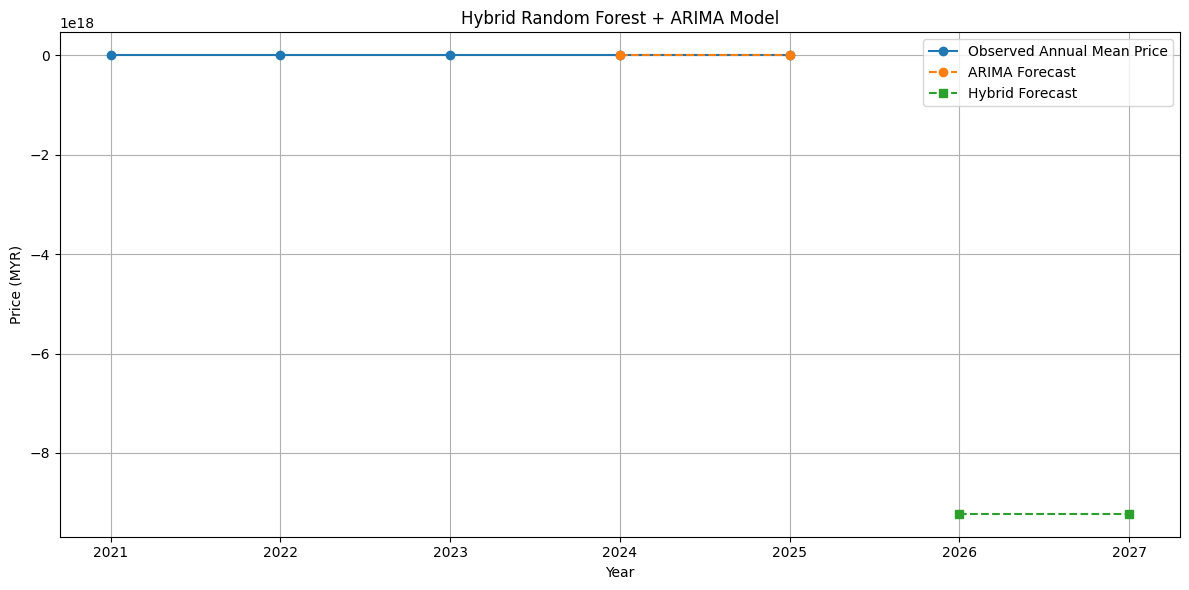

NameError: name 'forecast_df' is not defined

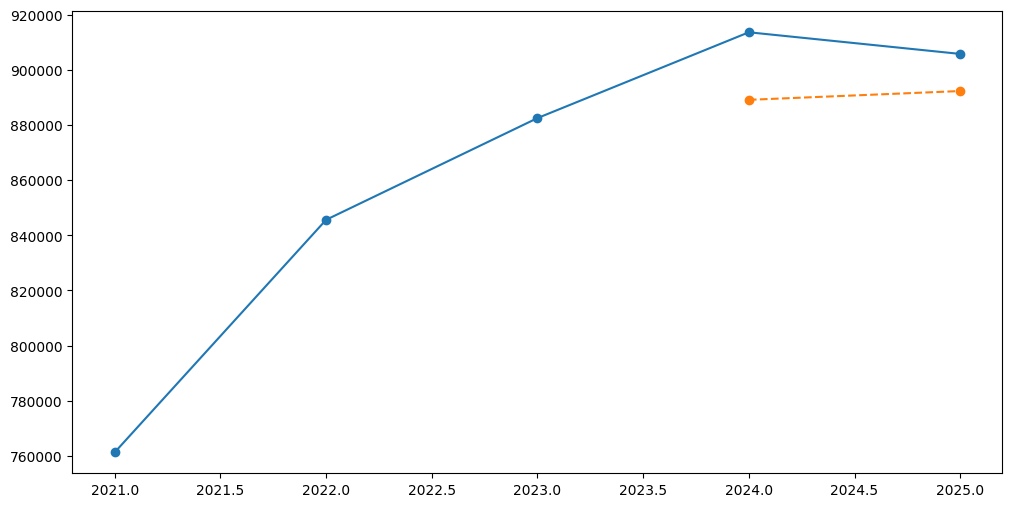

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import subprocess
import sys
import pickle
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Install required packages
def install_package(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--upgrade"])
        print(f"Successfully installed {package}")
    except Exception as e:
        print(f"Error installing {package}: {e}")

install_package("statsmodels")
install_package("scikit-learn")

# Load and preprocess KLHighRise.csv
df = pd.read_csv('https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/main/KLHighRise.csv')
scheme_mean = df.groupby('SchemeName')['TransactionPrice'].mean().apply(np.log)
df['SchemeName_encoded'] = df['SchemeName'].map(scheme_mean)
df['ParcelArea'] = df['ParcelArea'].astype(str).str.split(',', expand=True)[0].astype(float)
df['Level_numeric'] = pd.to_numeric(df['UnitLevel'], errors='coerce')
df['Tenure_encoded'] = df['Tenure'].map({'Freehold': 1, 'Leasehold': 0})
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%b-%y', errors='coerce')
df = df.sort_values('TransactionDate')

# Prepare features and target
initial_features = ['ParcelArea', 'Level_numeric', 'Tenure_encoded', 'SchemeName_encoded']
X = df[initial_features].copy()
y = np.log(df['TransactionPrice'].loc[X.index])

# Add nonlinear and interaction terms
X['ParcelArea_sq'] = X['ParcelArea'] ** 2
X['ParcelArea_Level'] = X['ParcelArea'] * X['Level_numeric']

# Handle missing values and outliers
X = X.fillna(0)
X = X.dropna()
y = y.loc[X.index]
X_with_const = np.c_[np.ones(X.shape[0]), X]
model_initial = LinearRegression().fit(X_with_const, y)
residuals = y - model_initial.predict(X_with_const)
outliers = residuals[abs(residuals) > 2 * residuals.std()].index
X = X.drop(outliers)
y = y.drop(outliers)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
train_size = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate RF
y_pred_rf = rf_model.predict(X_test)
rmse_rf_log = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_rf_orig = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_rf)))
mean_price = df['TransactionPrice'].loc[X.index].mean()
rmse_rf_pct = (rmse_rf_orig / mean_price) * 100
r2_rf = r2_score(y_test, y_pred_rf)
r2_rf_orig = r2_score(np.exp(y_test), np.exp(y_pred_rf))
print(f"\nRandom Forest Performance on Test Set:")
print(f"RMSE (Log): {rmse_rf_log:.4f}")
print(f"RMSE (Original MYR): {rmse_rf_orig:.0f}")
print(f"RMSE (%): {rmse_rf_pct:.1f}%")
print(f"R² (Log): {r2_rf:.4f}")
print(f"R² (Original): {r2_rf_orig:.4f}")

# Save the model and scaler
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Model and scaler saved as 'rf_model.pkl' and 'scaler.pkl'.")

# Aggregate for ARIMA baseline
df_agg = df.loc[X.index].groupby(df['TransactionDate'].dt.year)['TransactionPrice'].mean().reset_index()
df_agg['LogPrice'] = np.log(df_agg['TransactionPrice'])
train_agg = df_agg[df_agg['TransactionDate'] <= df_agg['TransactionDate'].max() - 2]
test_agg = df_agg[df_agg['TransactionDate'] > df_agg['TransactionDate'].max() - 2]

# Fit ARIMA on aggregated data
model_arima = ARIMA(train_agg['LogPrice'], order=(1, 1, 1))
model_arima_fit = model_arima.fit()
arima_pred = model_arima_fit.forecast(steps=len(test_agg))
arima_pred_price = np.exp(arima_pred)
rmse_arima = np.sqrt(mean_squared_error(test_agg['TransactionPrice'], arima_pred_price))
r2_arima = r2_score(test_agg['TransactionPrice'], arima_pred_price)
print(f"\nARIMA Baseline Performance on Test Set:")
print(f"RMSE (Original MYR): {rmse_arima:.0f}")
print(f"R²: {r2_arima:.4f}")

# Function to get prediction with user input
def get_hybrid_prediction():
    print("\nEnter the following features for hybrid prediction:")

    # Get and validate inputs
    while True:
        try:
            parcel_area = float(input("Parcel Area (sq ft, positive number): "))
            if parcel_area <= 0:
                print("Error: Parcel Area must be positive.")
                continue
            break
        except ValueError:
            print("Error: Please enter a valid number for Parcel Area.")

    while True:
        try:
            level_numeric = float(input("Level (numeric, e.g., 1-50, positive number): "))
            if level_numeric <= 0 or level_numeric > 50:
                print("Error: Level must be between 1 and 50.")
                continue
            break
        except ValueError:
            print("Error: Please enter a valid number for Level.")

    while True:
        try:
            tenure_encoded = int(input("Tenure (0 for Leasehold, 1 for Freehold): "))
            if tenure_encoded not in [0, 1]:
                print("Error: Tenure must be 0 or 1.")
                continue
            break
        except ValueError:
            print("Error: Please enter 0 or 1 for Tenure.")

    scheme_name = input("Scheme Name (e.g., 'KLCC', 'Mont Kiara', case-sensitive): ").strip()
    scheme_encoded = 0  # Default value if not found

    if scheme_name in scheme_mean.index:
        scheme_encoded = scheme_mean[scheme_name]
    else:
        print(f"Warning: {scheme_name} not found. Using default encoding (0). Use a known Scheme Name for better accuracy.")

    # Calculate derived features
    parcel_area_sq = parcel_area ** 2
    parcel_area_level = parcel_area * level_numeric

    # Create input array with the 6 features
    input_data = np.array([[parcel_area, level_numeric, tenure_encoded, scheme_encoded, parcel_area_sq, parcel_area_level]])
    input_scaled = scaler.transform(input_data)

    # RF base prediction
    rf_prediction_log = rf_model.predict(input_scaled)[0]
    rf_prediction_myr = np.exp(np.clip(rf_prediction_log, -709, 709)) # Increased clipping limit
    print(f"\nRandom Forest Base Prediction: {rf_prediction_myr:.2f} MYR")

    # Hybrid forecasting with ARIMA
    recent_years = df.loc[X.index].groupby(df['TransactionDate'].dt.year).tail(1).sort_values('TransactionDate')
    recent_X = X.loc[recent_years.index]
    recent_y = y.loc[recent_years.index]
    recent_X_scaled = scaler.transform(recent_X)
    rf_pred_recent = np.exp(np.clip(rf_model.predict(recent_X_scaled), -709, 709)) # Increased clipping limit
    hybrid_series = pd.Series(rf_pred_recent, index=recent_years['TransactionDate'].dt.year)
    hybrid_series = pd.concat([hybrid_series, pd.Series([rf_prediction_myr], index=[df['TransactionDate'].dt.year.max() + 1])])

    print("\nHybrid Series before ARIMA:")
    print(hybrid_series)

    model_hybrid = ARIMA(hybrid_series.dropna(), order=(1, 1, 1))
    model_hybrid_fit = model_hybrid.fit()
    hybrid_forecast = model_hybrid_fit.forecast(steps=2)
    hybrid_forecast_prices = np.exp(np.clip(hybrid_forecast, -709, 709)) # Increased clipping limit and added clipping to forecast
    print("\nHybrid Forecast before int conversion:")
    print(hybrid_forecast_prices)

    forecast_years = [df['TransactionDate'].dt.year.max() + 1, df['TransactionDate'].dt.year.max() + 2]
    forecast_df = pd.DataFrame({
        'Year': forecast_years,
        'Hybrid Forecast': hybrid_forecast_prices.clip(lower=0).fillna(0).round(0).astype(int)
    })
    print("\nHybrid Forecast for Next 2 Years:")
    print(forecast_df.to_string(index=False))

# Run hybrid prediction
if __name__ == "__main__":
    get_hybrid_prediction()

# Plot (optional, for visualization)
plt.figure(figsize=(12, 6))
years = df.loc[X.index].groupby(df['TransactionDate'].dt.year)['TransactionPrice'].mean().index
mean_prices = df.loc[X.index].groupby(df['TransactionDate'].dt.year)['TransactionPrice'].mean()
plt.plot(years, mean_prices, label='Observed Annual Mean Price', marker='o')
plt.plot(test_agg['TransactionDate'], arima_pred_price, label='ARIMA Forecast', linestyle='--', marker='o')
plt.plot(forecast_df['Year'], forecast_df['Hybrid Forecast'], label='Hybrid Forecast', linestyle='--', marker='s')
plt.title('Hybrid Random Forest + ARIMA Model')
plt.xlabel('Year')
plt.ylabel('Price (MYR)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('hybrid_rf_arima_plot.png')
plt.show()